# Causal Inference
> Concepts of causal inferencing with code

- toc: true
- badges: true
- comments: true
- categories: [Causal]
- image:

#### Introduction

To tackle such questions, we will introduce the key ingredient that causal analysis depends on---counterfactual reasoning---and describe the two most popular frameworks based on Bayesian graphical models and potential outcomes. Intuitively, the counterfactual framework measures causal effects by comparing measured outcomes in two almost-identical worlds---imagine two parallel universes, identical in every way up until the point where a some "treatment" occurs in one world but not the other. 

Building upon the counterfactual framework, we introduce causal graphs, which are a tool for formalizing implicit assumptions about causal mechanisms (e.g., encoding domain knowledge about causal mechanisms into an analysis); and potential outcomes methods, which are statistical tools for estimating causal effects. --- Where some intuition comes in. 

We close our introduction by presenting the randomized experiment as the simplest method for causal inference. We describe the randomized experiment in the language of the counterfactual framework, providing a causal graph and associated potential outcomes formulation, and show how this conceptually clean and simple method addresses the challenges of causal inference.




#### Conditioning-based methods

Conditioning-based methods are the workhorse of causal inference when running active experiments is not feasible. We discuss these methods by showing how each one is, in its own way, attempting to approximate the gold standard randomized experiment. **Conditioning** on key causal variables is the simplest method for isolating causal effect. **Matching and stratification** approximates conditioning at high-diemensions an continuous variable settings. **Regression** can also be used. **Doubly robust estimators** provides the best of conditioning and regression by combining propensity-based and regression-based methods. **Synthetic control method** can be used if none of the above suits, it is especially usefull when the treatment is applied to the entire population. 

#### Natural Experiments

Conditioning methods can fail if important confounders and unobserved. Here we smiply attempt to find an observed variable that acts like the randomised arm of an experiment. **Simple natural experiment** can be used, the type we see in the field, in the lab or occur as a result of some exogenous phenomena. **Instrumental variables** method ensures that we obtain the true causal effect even when there are unobserved confounders. **Regresion discontinuity** is the process to look for dicontinuity in bserved data. 

#### Sensitivity Analysis

At the end we have to see how the results change once we alter the assumptions for both observational studies and natural experiments. 



Think of smoking as the confound to red-meat eating and heart attacks. 

Here we want to study the effect of treatment $T$ on the outcome $Y$, however as shown in the digraph, there is a confound $X$ that influences both $Y$ and $T$. Therefore to estimate $T\rightarrow Y$ we have to break the dependence $X\rightarrow T$ so that $T \perp X$. And $Y \perp X$ could also work but less practical. 

By using random experiment you actively assign a treatment unrelted to any confound. And by constructiona well run random experiment is $T \perp X$. The confound is equally split between the two groups as long as there is no selection bias in the sample selection procedure.

<center><img>  <img src="https://cdn.mathpix.com/snip/images/Ssb3nBeds2f8J8ulnQCQhX0N6ktxFk-wopFwExxKtrc.original.fullsize.png" height="200"/>



Lets try a new one. Our goal is to estimate the effect of excerise on cholesterol. But your age influences both your level of excercise and cholesterol. So to estimate the effect of excerices on cholesteral we are to break the dependence of age on excercies. So in a random experiment we can actively assign excercise independent of age.

If we can't actively intervene, we have to simulate random experiments through observational studies using on of six observational techniques. The first technique we will look at is **conditioning**. So clearly there is some relationship, but there is a confounder, so we can emperically define the relationship yet. Currently it looks like more stationary biking is related to higher cholesterol. In this example, older people are more likley to participate in stationary biking. We can condition on age by analysing each age group separately. 

<img> <img src="https://cdn.mathpix.com/snip/images/m6ZsRIvxmY6Cac8LTsy3kMKO-HBAn0SbrOHWVReaZvk.original.fullsize.png" />

$$
P\left(\text {Cholesterol } | \operatorname{do}\left(S_{-} B i k i n g\right)\right)=\sum_{\text {age}} P\left(\text {Cholesterol } | S_{-} \text {Biking,age}\right) P(\text {age})
$$

So naturally in this example, we make a few critical assumptions. 



*   Age is the only confounder, this is called the **ignorability** or selection of obserables assumption.
*   **SUTVA assumption** says that a subject’s potential outcome is not affected by other subjects’ exposure to the treatment. There are not alternative treatment allocations that would lead to different outcomes due to network effects, such that of friends. 
*   The observations cover similar people, the common support or **overlap assumption**.
*   Don't include all age groups and the effect on excerciese, so will it **generalise** beyond observed region. 

Note it becomes very hard to know what to condition on when the dimensionality of X increases. In business X is large, it is therefore unlikley that you would make use of the conditioning techinque. 


You have to use the backdoor criterion to ensure that you have the right variables. So the casual effect is only true if the assumed graphical model is in fact correct.

<img>  <img src="https://cdn.mathpix.com/snip/images/tQvXOSUS1s-mLpBuDWQPNsWkbGZO3vskiGvRgoy5DiY.original.fullsize.png" />

### Now the process of matching and stratafication

![](https://cdn.mathpix.com/snip/images/4sRHsu93WmElDVquTWmRAYVH27PKQiNYZErZ5ntYeaw.original.fullsize.png)

#### And then with a bit of matching

![](https://cdn.mathpix.com/snip/images/l4Na-bCxsC1NTDQR5tEVneAsg6yUOxU2mJXhEI9KnU0.original.fullsize.png)



Here we therefore find individual pairs of treated and untreated indviduals that are veery siilar to eachother. And this paired individuals then provide the counterfactual estimate for each other. You then simply average the difference in outcome within pairs to calucalte the average-treatment-effect (ATE) on the treated. 

The mahalanobis distance accounts for the unit differences by normalising each dimesions by the standard deviation. Here $S$ is the covariance matrix. 

$$
\text {Mahalanobis }\left(\vec{x}_{i}, \vec{x}_{j}\right)=\sqrt{(\overrightarrow{x_{i}}-\overrightarrow{x_{j}})^{T} S^{-1}(\overrightarrow{x_{i}}-\overrightarrow{x_{j}})}
$$

### Propensity Score

This is the individual's propensity to be treated, these scores are estimated, you can then use the propensity socre to subdivide the observational data so that $ T \perp X |score$. It therefore breaks the infleunce of confound $X$ and allows for the estimation of the true treatment effect. 

This is where a few machine learning models can be used for good measure. Here one tries to predict all the label (i.e. the treatment states) based on the observed covariates. You can use any model where the score is well calibrated so that $(100 \times p)\%$ of indviduals with score $p$ are observed to be treated. You can therefore use logistic regressions, SVMs and GAMs. 

https://onlinelibrary.wiley.com/doi/abs/10.1002/bimj.201800132


And then distance is the distance between propensity scores:

$$
\text { Distance }(\overrightarrow{x_{i}}, \overrightarrow{x_{j}})=|\hat{e}(\overrightarrow{x_{i}})-\hat{e}(\overrightarrow{x_{j}})|
$$


Propensity score matching works because individuals with similar covariates have similar scores and similar treatment likelihoods. It doesn't really matter whether or not the propensity score is accurate, the role is simply to characterise covariates and not to actually identify the treated from the untreated. If fact if the propensity score is too accurate, it means you can't disentable the covariates from the treatement status and as a reslt, any effect we observe could be due either to the treatment or to the correlated covariate, in such senario, you should not dumb down the model, instead you should redefine the problem statement and the treatment. 



The code to this problem is very easy, use a machine learning model to predict the covariate status 

In [ ]:
# learn propensity score model
psmodel = linear_model.LinearRegression()
psmodel.fit(covariates, treatment_status)
data['ps'] = psmodel.predict(covariates)
# find nearest neighbor matches
controlMatcher = NearestNeighbors().fit(untreated['ps’])
distances, matchIndex = controlMatch.kneighbors(treated['ps'])
# iterate over matched pairs and sum difference in outcomes
for i in range(numtreatedunits):
    treated_outcome = treated.iloc[i][outcome_name].item()
    untreated_outcome = untreated.iloc[matchIndex[i]][outcome_name].item()
    att += treated_outcome - untreated_outcome
# normalize 
att /= numtreatedunits


With mathching we can choose to allow for replacement, it is a bias variance trade off. And if the nearest neighbour is too far away, it is advisible to use a caliper threshold to limit the acceptable distance. One should also be sure that all treated are not matched to untreated. You are more likley to used propensity score matching than Mahalanobis distance matching. Remember one central problem still remains with al these methods and it is unobserved confounds. 

#### Stratification

In matching it is one to one, in stratification it is many to many matching. Stratification identifies paired subpopulation with similar covariate distributions. 

We can use propensity scores to stratify populations. So we once more calculate the propensity score per individual but now instead of match we stratify them into groups. Once the groups have been established you can calculate the average treatment effect (ATE) as the weighted average of outcome differences per strata.

$$
ATT =\sum_{s \in s t r a t a} \frac{1}{N_{s, T=1}}\left(\bar{Y}_{s, T=1}-\bar{Y}_{s, T=0}\right)
$$

where $
\bar{Y}_{S, T}
$ is the average outcome at strata $s$ and treatment status $T$ and $
N_{S, T=1}
$ is the number of treated individuals in strata $s$. 


<center><img><img src="https://cdn.mathpix.com/snip/images/4S4eJJY3e5RBvMQjHfm9sNMV5r8hCrXoZNEy7ZgJHfg.original.fullsize.png" height=300/></center>








In [ ]:
# build propensity score model and assign each item a score as earlier…

# create a column 'strata' for each element that marks what strata it belongs to
data['strata'] = ((data['ps'].rank(ascending=True) / numrows) * numStrata).round(0)
data['T_y'] = data['T'] * data['outcome’]            # T_y = outcome iff treated
data['Tbar'] = 1 - data['treated’]                   # Tbar = 1 iff untreated
data['Tbar_y'] = data['Tbar'] * data['outcome']      # Tbar_y = outcome iff untreated
stratified = data.groupby('strata')
# sum weighted outcomes over all strata  (weight by treated population)
outcomes = stratified.agg({'T':['sum'],'Tbar':['sum'],'T_y':['sum'],'Tbar_y':['sum']})
# calculate per-strata effect
outcomes[‘T_y_mean'] = outcomes[‘T_y_sum'] / outcomes['T']
outcomes[‘Tbar_y_mean'] = outcomes[‘Tbar_y_sum'] / outcomes['dbar_sum']
outcomes['effect'] = outcomes[‘T_y_mean'] - outcomes[‘Tbar_y_mean’]
# weighted sum of effects over all strata
att = (outcomes['effect'] * outcomes['T']).sum() / totaltreatmentpopulation


We would also have to choose how many strata to select, if you have around 100 data points, you can pick five. If you have 10k - 1mn pick 100-1000 strata. We don't wat to pick a small nuber of strata as it is a bias-variance trade-off. Matching is high variance, low bias. Often times we find that there might not be enough treated and untreated indviduals in a stratum tyically near propensity scores of 0.0 and 1.0, in which case we clip the strata from the analyis, which technically means we are now calcualting a local-average-treatment-effet. 

### Weighting
This is the next mechanism that is an alternative to conditioning. Is it possible ot assign weights to observations to simulate a randomised experiment. So with stratification we know that we weigh each strata's total impact by the number of treated. So weighting argues that the weighting of the treated population is similar to weighting by propensity score, so they calculate the effect by weighted sum over all individual outcomes. 

$$
A T E=\frac{1}{N_{T=1}} \sum_{i \in \text {treated}} w_{i} Y_{i}-\frac{1}{N_{T=0}} \sum_{j \in u n t r e a t e d} w_{j} Y_{j}
$$

And the Inverse Probability of Treatment Weighting (IPTW) 

$$
\begin{aligned} w_{i}=& \frac{T}{e}+\frac{1-T}{1-e} \\ \mathrm{N}_{\mathrm{T}=1}=& \sum \frac{T}{e} ; \quad N_{T=0}=\sum \frac{1-T}{1-e} \end{aligned}
$$


Weights on each individual act to balance the distribution of covariates in the treated and untreated groups.  (i.e., break the dependence between treatment status and covariates)

You obtain a high variance when $e$ is close to 0 or 1. Note $e$ is the propensity scores. As such it might become crucuial to clip weights. This model assumes that propensity scores are correctly specified. There are variants to this generalised weighting protocol such as the ATE on treated only. 

### Simple Regression

Here regression and supervised learning can be used interchangably. In regression analysis, we build a model of $Y$ as a function of covariates $X$ and $T$, amnd interpret the coeffients of the covariates and treatment causally. 

$$
E(Y | X, T)=\alpha_{1} X_{1}+\alpha_{2} X_{2}+\cdots \alpha_{n} X_{n}+\alpha_{T} T
$$
for example 

$$
\text { Cholesterol }=\alpha_{\text {age}} A g e+\alpha_{\text {exercise}} \text {Exercise}
$$

The bigger the coefficient the stronger the causal relationship to the outcome, $Y$. The problem is that the causal interpretation of regressions require many assumptions. **Model Correctness** what if we use a linear model and a causal model is non-linear. **Multicollinearity** if the covariates are correlated, you can't get accurate coefficients. **Ignorability** omission of confounds will invalidate findings. This method should largely be ignored, unless you are asbolutely sure about what you are doing. 


### Doubly robust

This method makes use of both propensity score and regression methods. Both of which uses models that have to be correctly specified, i.e. not linear when the relationship is non-linear. With this method, if either propensity score **or** regression is correctly specified, then doubly robust is correct. As a result, it seems that the doubly robust method should always stritly be better than each method indvidually, but that is not entirely true, if both models are slightly incorrect, then doubly robust can become very biased.


$$
D R_{1}=\left\{\begin{array}{ll}{\frac{Y}{\hat{e}}-\frac{\hat{Y}_{T=1}(1-\hat{e})}{\hat{e}},} & {T=1} \\ {\hat{Y}_{T=1},} & {T=0}\end{array}\right.
$$

$$
D R_{0}=\left\{\begin{array}{ll}{\hat{Y}_{T=0},} & {T=1} \\ {\frac{Y}{1-\hat{e}}-\frac{\hat{Y}_{T=1} \hat{e}}{1-\hat{e}},} & {T=0}\end{array}\right.
$$



The idea is to calculate the first and second estimators for each individual and then to calucalte the mean of the two estimators over the whole study population and take the difference as the causal effect of $T$.

### Synthetic Controls

All the previous methods require that we observe both the treated and untreated individuals. There could be a global policy change tht would lead to eveeryone being treated. It is possible to do a pre/post comparison but it is not robust to dynamics like seasonality. The alternative is to build synthetic controls that estimate what $\bar{Y}_{T=0}$ would have been for a population were it not for the treatment. There is more to be said here, but I will leave it for later. 



## Natural Experiment

### Simple Natural Experiment

Under natural experiments we have simple natural experiments, instrumental variabls, and regression discontinuities. Natural here means, as if nature conducted an experiment. Here instead of just assuming ignorability, we find data sets that approximate an experiment. Here we have A/B testing, Lottery, Randomised policy, and an external shock to the treatment. It is never truly random, so you exploit and as-if random assignment to meature the effect of the treatment on the outcome. 

### Instrumental Variables

At first you have to attempt to find an instrument variable which is anything that affects the cause but not the outcome. 

<center> <img> <img src="https://cdn.mathpix.com/snip/images/jvKsKCDIsPX1Cd2URnxOkozLtWLnIATanMYt2JdoxeU.original.fullsize.png" height=250 />

As a result, a change in Y is a product of the change in Z -> X and X -> Y. And the causal effect is 

$$
\text { Causal effect }(X->Y)=\frac{Y_{Z=1}-Y_{Z=0}}{X_{Z=1}-X_{Z=0}}
$$

Due to it being an external event you can look at it as-if it is random variation. Example: What is the effect of recommendations on an app store?
Instrumental Variable: External sources that drive sudden, large traffic to an app. Because IVs are not influenced by confounds, IVs’ indirect effect on outcome Y is independent of confounds too.  Because IVs do not directly influence outcome, their effect must be due to the effect of the treatment. They seem very common now. You then of course get regression discontinuities, that are quite common and can be thought of as a special case of an instrumental variable.


## Refutations

Causal inference is only possible with assumptions. It is critical to review your assumptions, but the question is, how can this be done. 

DoWhy focuses attention on the assumptions required for causal inference. 

Provides estimation methods such as matching and IV so that you can focus on the identifying assumptions. 

*   Models assumptions explicitly using causal graphical model. 
*   Provides an easy way to test them (if possible) or analyze sensitivity to violations. 


Unifies all methods to yield four verbs for causal inference: 
* Model
* Identify
* Estimate
* Refute


Can add randomly drawn covariates into data

Rerun your analysis. 

Does the causal estimate change?  (Hint: it shouldn’t)

---

Randomize or permute the treatment.

Rerun your analysis. 

Does the causal estimate change? (Hint: it should become 0)

---
Create subsets of your data.

Rerun your analysis. 

Does the causal estimate vary across subsets?  (Hint: it shouldn’t vary significantly)

---
Many methods (e.g., matching, stratification, weighting, regression discontinuity) depend on balancing of covariates

Can test this.

---
Question: How sensitive is your estimate to minor violations of assumptions?

E.g. How big should the effect of a confounder be so that your estimate reverses in direction?

Use simulation to add effect of unknown confounders. 

Domain knowledge helps to guide reasonable values of the simulation. 

Make comparisons to other known estimates.





![](https://cdn.mathpix.com/snip/images/fuJzJybm6NgRKslmS5dS1tyMzUPuYcA2eTi0DnLCqyg.original.fullsize.png)

---

Always follow the four steps: Model, Identify, Estimate, Refute.
Refute is the most important step.

Aim for simplicity.
If your analysis is too complicated, it is most likely wrong. 


Try at least two methods with different assumptions. 
Higher confidence in estimate if both methods agree.

---

•Input: Observational data,  Causal graph
•Output: Causal effect between desired variables, “What-if” analysis 




--- 

When you have high dimensional problems you can use dimensionality reduction tehcniques or regularised models. 

---

And network effects complicate causal inference. An individual outcomes should not depend on another's treatment status. One can then consider partitioned sub-networks as a unit of analysis. 

---

WEIRD problem in social studies, might not  generalise to other users, platforms or cultures. So you can coroborate findings accorss. And be explicity of the potential of non-generalisability. 

---

There is a few common confounders that can lead to selection bias, theses are structured (demographics, usage patterns) and unstructures (activity, preferences). Time spent on page is not important without page, more activity can simply mean more activity at that time consider that schools are closed. 


### Other

Causal discovery is a harder problem than causal inference. Causal inference looks at the effects of causes, and causal discovery at the causes of effects. 

Heterogeneuos treatment effects. Average causal effect does not capture individual-level variations. Stratification is one of the simplest methods for hetrongenous treatment by strata, typical strata are demographics. You need more data when you stratify to detect statistical differences, otherwise it can purely be down to noise. For high dimensions we can use machine learning methods like random forests such as those by Susan Athey. 

Machine learning can also use causal inference methods for robust generalisable prediction. And causal inference can use ML algorithms to better model the non-linear effects of confounders. 

RL and causal inference can be used together. You can feed in A/B test into multi-armed bandits, MDPs and POMDPs to generalise a randomised experiment. So you can have two goals, one is to show the best known algorithm to the users as a recommender, and the second to keep randomising to update knowledge about competing algorithms. 

As a pratical example, you can look at contextual bandits for Yahoo News. The action is to display different news articles, this is done using an episilon greedy policy. 


## Dowhy

In [ ]:
# !git clone https://github.com/microsoft/dowhy.git
# !pip install -r dowhy/requirements.txt
# !python dowhy/setup.py install

!pip install dowhy

### First Example

In [ ]:
import numpy as np
import pandas as pd
#from dowhy import CausalModel
from dowhy.do_why import CausalModel
import dowhy.datasets as ds
import logging

### beta 10 is what I want the cause to be. 
data = ds.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_samples=10000, 
        treatment_is_binary=True)
df = data["df"]
print(df.head())
print(data["dot_graph"])
print("\n")
print(data["gml_graph"])

    Z0        Z1        X0        X1  ...        X3        X4    v          y
0  0.0  0.174714 -0.399804 -0.107714  ...  1.821615 -0.202443  1.0  10.306148
1  0.0  0.049295 -0.308593  1.455492  ...  0.763214 -0.910582  1.0  12.634204
2  0.0  0.475725 -0.396744 -2.586876  ... -0.624382  1.430882  1.0   7.815953
3  0.0  0.067478  0.583631  0.361288  ... -0.293668 -2.068990  0.0  -6.583293
4  0.0  0.058039 -1.783720  0.078355  ...  0.284110 -1.381946  0.0  -6.185724

[5 rows x 9 columns]
digraph { v ->y; U[label="Unobserved Confounders"]; U->v; U->y;X0-> v; X1-> v; X2-> v; X3-> v; X4-> v;X0-> y; X1-> y; X2-> y; X3-> y; X4-> y;Z0-> v; Z1-> v;}


graph[directed 1node[ id "v" label "v"]node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "v" target "y"]edge[source "Unobserved Confounders" target "v"]edge[source "Unobserved Confounders" target "y"]node[ id "X0" label "X0"] edge[ source "X0" target "v"] node[ id "X1" label "X1"] edge[ source "X1" 

In [ ]:
# We now input a causal graph in the GML graph format (recommended). 
# You can also use the DOT format.
# We are not going to change the format
# You only need the graph when you don't specify the common causes and instruments
# If you don't add the graph not common causes or instruments, it'll be ignored as such
# With graph

model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"],
        instruments=data["instrument_names"],
        logging_level = logging.INFO
        )


INFO:dowhy.do_why:Model to find the causal effect of treatment ['v'] on outcome ['y']


INFO:dowhy.causal_graph:Using Matplotlib for plotting


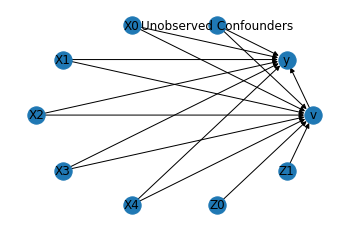

In [ ]:
model.view_model()

The above causal graph shows the assumptions encoded in the causal model. We can now use this graph to first identify the causal effect (go from a causal estimand to a probability expression), and then estimate the causal effect.

DoWhy philosophy: Keep identification and estimation separate

Identification can be achieved without access to the data, acccesing only the graph. This results in an expression to be computed. This expression can then be evaluated using the available data in the estimation step. It is important to understand that these are orthogonal steps.

    Identification




In [ ]:
#identified_estimand = model.identify_effect()
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['X1', 'X3', 'Unobserved Confounders', 'X0', 'X2', 'X4']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['Z0', 'Z1']


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
d                                
──(Expectation(y|X1,X3,X0,X2,X4))
dv                               
Estimand assumption 1, Unconfoundedness: If U→v and U→y then P(y|v,X1,X3,X0,X2,X4,U) = P(y|v,X1,X3,X0,X2,X4)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, Z0)/Derivative(v, Z0))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z0,Z1)
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→v, then ¬(Z0,Z1→y)



    Estimation

#### Regression

In [ ]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: y~v+X1+X3+X0+X2+X4


*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
d                                
──(Expectation(y|X1,X3,X0,X2,X4))
dv                               
Estimand assumption 1, Unconfoundedness: If U→v and U→y then P(y|v,X1,X3,X0,X2,X4,U) = P(y|v,X1,X3,X0,X2,X4)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, Z0)/Derivative(v, Z0))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z0,Z1)
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→v, then ¬(Z0,Z1→y)

## Realized estimand
b: y~v+X1+X3+X0+X2+X4
## Estimate
Value: 10.00000000000001

## Statistical Significance
p-value: <0.001

Causal Estimate is 10.00000000000001


#### Stratification

We will be using propensity scores to stratify units in the data.

In [ ]:
causal_estimate_strat = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate_strat)
print("Causal Estimate is " + str(causal_estimate_strat.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v+X1+X3+X0+X2+X4


*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
d                                
──(Expectation(y|X1,X3,X0,X2,X4))
dv                               
Estimand assumption 1, Unconfoundedness: If U→v and U→y then P(y|v,X1,X3,X0,X2,X4,U) = P(y|v,X1,X3,X0,X2,X4)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, Z0)/Derivative(v, Z0))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z0,Z1)
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→v, then ¬(Z0,Z1→y)

## Realized estimand
b: y~v+X1+X3+X0+X2+X4
## Estimate
Value: 9.946431839515096

Causal Estimate is 9.946431839515096


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Matching

In [ ]:
causal_estimate_match = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")
print(causal_estimate_match)
print("Causal Estimate is " + str(causal_estimate_match.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: y~v+X1+X3+X0+X2+X4
/usr/local/lib/python3.6/dist-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:51: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()


*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
d                                
──(Expectation(y|X1,X3,X0,X2,X4))
dv                               
Estimand assumption 1, Unconfoundedness: If U→v and U→y then P(y|v,X1,X3,X0,X2,X4,U) = P(y|v,X1,X3,X0,X2,X4)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, Z0)/Derivative(v, Z0))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z0,Z1)
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→v, then ¬(Z0,Z1→y)

## Realized estimand
b: y~v+X1+X3+X0+X2+X4
## Estimate
Value: 11.813653143950052

Causal Estimate is 11.813653143950052


#### Weighting

We will be using (inverse) propensity scores to assign weights to units in the data. DoWhy supports a few different weighting schemes:

    Vanilla Inverse Propensity Score weighting (IPS)
    Self-normalized IPS weighting (also known as the Hajek estimator)
    Stabilized IPS weighting


In [ ]:
causal_estimate_ipw = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_weighting", method_params={"weighting_scheme":"ips_weight"})
print(causal_estimate_ipw)
print("Causal Estimate is " + str(causal_estimate_ipw.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Weighting Estimator
INFO:dowhy.causal_estimator:b: y~v+X1+X3+X0+X2+X4


*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
d                                
──(Expectation(y|X1,X3,X0,X2,X4))
dv                               
Estimand assumption 1, Unconfoundedness: If U→v and U→y then P(y|v,X1,X3,X0,X2,X4,U) = P(y|v,X1,X3,X0,X2,X4)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, Z0)/Derivative(v, Z0))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z0,Z1)
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→v, then ¬(Z0,Z1→y)

## Realized estimand
b: y~v+X1+X3+X0+X2+X4
## Estimate
Value: 14.327456158855973

Causal Estimate is 14.327456158855973


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Instrumental Variable

We will be using the Wald estimator for the provided instrumental variable.

In [ ]:
causal_estimate_iv = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable", method_params={'iv_instrument_name':'Z0'})
print(causal_estimate_iv)
print("Causal Estimate is " + str(causal_estimate_iv.value))

INFO:dowhy.causal_estimator:INFO: Using Instrumental Variable Estimator
INFO:dowhy.causal_estimator:Realized estimand: Wald Estimator
Realized estimand type: ate
Estimand expression:
                                                             -1
Expectation(Derivative(y, Z0))⋅Expectation(Derivative(v, Z0))  
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z0,Z1)
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→v, then ¬(Z0,Z1→y)
Estimand assumption 3, treatment_effect_homogeneity: Each unit's treatment v isaffected in the same way by common causes of v and y
Estimand assumption 4, outcome_effect_homogeneity: Each unit's outcome y isaffected in the same way by common causes of v and y



*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
d                                
──(Expectation(y|X1,X3,X0,X2,X4))
dv                               
Estimand assumption 1, Unconfoundedness: If U→v and U→y then P(y|v,X1,X3,X0,X2,X4,U) = P(y|v,X1,X3,X0,X2,X4)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, Z0)/Derivative(v, Z0))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z0,Z1)
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→v, then ¬(Z0,Z1→y)

## Realized estimand
Realized estimand: Wald Estimator
Realized estimand type: ate
Estimand expression:
                                                             -1
Expectation(Derivative(y, Z0))⋅Expectation(Derivative(v, Z0))  
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z0,Z1)
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→v, then ¬(Z0,Z1→y)
Estimand assumption 3, treatment_effect_homogeneity:

#### Regression Discontinuity

We will be internally converting this to an equivalent instrumental variables problem.

In [ ]:
causal_estimate_regdist = model.estimate_effect(identified_estimand,
        method_name="iv.regression_discontinuity", 
        method_params={'rd_variable_name':'Z1',
                       'rd_threshold_value':0.5,
                       'rd_bandwidth': 0.1})
print(causal_estimate_regdist)
print("Causal Estimate is " + str(causal_estimate_regdist.value))

INFO:dowhy.causal_estimator:Using Regression Discontinuity Estimator
INFO:dowhy.causal_estimator:
INFO:dowhy.causal_estimator:INFO: Using Instrumental Variable Estimator
INFO:dowhy.causal_estimator:Realized estimand: Wald Estimator
Realized estimand type: ate
Estimand expression:
                                                             -1
Expectation(Derivative(y, Z0))⋅Expectation(Derivative(v, Z0))  
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z0,Z1)
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→v, then ¬(Z0,Z1→y)
Estimand assumption 3, treatment_effect_homogeneity: Each unit's treatment local_treatment isaffected in the same way by common causes of local_treatment and local_outcome
Estimand assumption 4, outcome_effect_homogeneity: Each unit's outcome local_outcome isaffected in the same way by common causes of local_treatment and local_outcome



*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
d                                
──(Expectation(y|X1,X3,X0,X2,X4))
dv                               
Estimand assumption 1, Unconfoundedness: If U→v and U→y then P(y|v,X1,X3,X0,X2,X4,U) = P(y|v,X1,X3,X0,X2,X4)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, Z0)/Derivative(v, Z0))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z0,Z1)
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→v, then ¬(Z0,Z1→y)

## Realized estimand
Realized estimand: Wald Estimator
Realized estimand type: ate
Estimand expression:
                                                             -1
Expectation(Derivative(y, Z0))⋅Expectation(Derivative(v, Z0))  
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→Z0,Z1)
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→v, then ¬(Z0,Z1→y)
Estimand assumption 3, treatment_effect_homogeneity:

INFO:dowhy.do_why:Model to find the causal effect of treatment ['v'] on outcome ['y']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


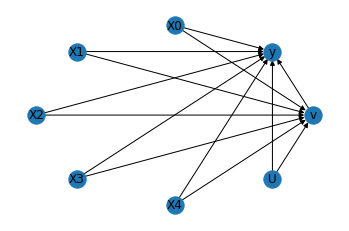

In [ ]:
### Now without the graph, and instead common causes
### The point here is to ignore the entire graph, except for commone causes (ie. no instrument)
### Confounds are always assumed regardless 

# Without graph                                       
model= CausalModel(                             
        data=df,                                      
        treatment=data["treatment_name"],             
        outcome=data["outcome_name"],                 
        common_causes=data["common_causes_names"])  

model.view_model()

In [ ]:
## We get the same causal graph. Now identification and estimation is done as before.
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification")         
print(estimate)
print("Causal Estimate is " + str(estimate.value))


INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['X1', 'X3', 'X0', 'X2', 'X4', 'U']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v+X1+X3+X0+X2+X4
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
d                                
──(Expectation(y|X1,X3,X0,X2,X4))
dv                               
Estimand assumption 1, Unconfoundedness: If U→v and U→y then P(y|v,X1,X3,X0,X2,X4,U) = P(y|v,X1,X3,X0,X2,X4)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: y~v+X1+X3+X0+X2+X4
## Estimate
Value: 9.946431839515096

Causal Estimate is 9.946431839515096


### Now Refuting

Let us now look at ways of refuting the estimate obtained.

Adding a random common cause variable


In [ ]:
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v+X1+X3+X0+X2+X4+w_random
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Refute: Add a Random Common Cause
Estimated effect:(9.946431839515096,)
New effect:(9.960595760592396,)



Adding an unobserved common cause variable

In [ ]:
res_unobserved=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
print(res_unobserved)

Replacing treatment with a random (placebo) variable

In [ ]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)
## We want the effect close to zero

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+X1+X3+X0+X2+X4


Refute: Use a Placebo Treatment
Estimated effect:(9.946431839515096,)
New effect:(0.019121484649084346,)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Removing a random subset of the data

In [ ]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)


INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v+X1+X3+X0+X2+X4


Refute: Use a subset of data
Estimated effect:(9.946431839515096,)
New effect:(9.886889613668945,)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As you can see, the propensity score stratification estimator is reasonably robust to refutations. For reproducibility, you can add a parameter "random_seed" to any refutation method, as shown below.

In [ ]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9, random_seed = 1)
print(res_subset)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v+X1+X3+X0+X2+X4


Refute: Use a subset of data
Estimated effect:(9.946431839515096,)
New effect:(10.059557168227766,)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Instrumental Variable Application

In [ ]:
import numpy as np
import pandas as pd
import patsy as ps # describing statistical models 

from statsmodels.sandbox.regression.gmm import IV2SLS
import os, sys
sys.path.append(os.path.abspath("../../../"))

In [ ]:
n_points = 1000
education_abilty = 1
education_voucher = 0.5
income_abilty = 2
income_education = 4


# confounder
ability = np.random.normal(0, 3, size=n_points)

# instrument
voucher = np.random.normal(2, 1, size=n_points) 

# treatment
education = np.random.normal(5, 1, size=n_points) + education_abilty * ability +\
            education_voucher * voucher

# outcome
income = np.random.normal(10, 3, size=n_points) +\
         income_abilty * ability + income_education * education

# build dataset
data = np.stack([ability, education, income, voucher]).T
df = pd.DataFrame(data, columns = ['ability', 'education', 'income', 'voucher'])

In [ ]:
df.head()

,ability,education,income,voucher
0,2.530185,9.425180,54.891295,1.188695
1,-1.677691,2.355344,11.912406,1.339673
2,-2.680661,0.731042,5.140462,0.447118
3,3.510673,8.788867,51.939000,2.403189
4,2.269907,6.725102,40.847582,0.838029


In [ ]:
income_vec, endog = ps.dmatrices("income ~ education", data=df)
exog = ps.dmatrix("voucher", data=df) # creates intercept

print("income")
print(income_vec[:5])
print("endog")
print(endog[:5])
print("exog")
print(exog[:5])


income
[[54.89129549]
 [11.91240627]
 [ 5.14046152]
 [51.93900016]
 [40.84758241]]
endog
[[1.         9.42518024]
 [1.         2.3553439 ]
 [1.         0.73104227]
 [1.         8.78886679]
 [1.         6.72510169]]
exog
[[1.         1.1886947 ]
 [1.         1.3396729 ]
 [1.         0.44711844]
 [1.         2.40318908]
 [1.         0.8380294 ]]


In [ ]:
# outcome, treatment, instrument
m = IV2SLS(income_vec, endog, exog).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:                 income   R-squared:                       0.896
Model:                         IV2SLS   Adj. R-squared:                  0.896
Method:                     Two Stage   F-statistic:                     207.2
                        Least Squares   Prob (F-statistic):           8.07e-43
Date:                Tue, 03 Dec 2019                                         
Time:                        04:01:35                                         
No. Observations:                1000                                         
Df Residuals:                     998                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0329      1.814      4.429      0.000       4.474      11.592
education      4.3111      0.300     14.393      0.000       3.723       4.899
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.021
Skew:                          -0.011   Prob(JB):                        0.989
Kurtosis:                       2.995   Cond. No.                         15.1
==============================================================================
"""

Now using dowhy

In [ ]:
model=CausalModel(
        data = df,
        treatment='education',
        outcome='income',
        common_causes=['ability'],
        instruments=['voucher']
        )

identified_estimand = model.identify_effect()

estimate = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable", test_significance=True
)
print(estimate)

INFO:dowhy.do_why:Model to find the causal effect of treatment ['education'] on outcome ['income']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['ability', 'U']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['voucher']
INFO:dowhy.causal_estimator:INFO: Using Instrumental Variable Estimator
INFO:dowhy.causal_estimator:Realized estimand: Wald Estimator
Realized estimand type: ate
Estimand expression:
                                                                              
Expectation(Derivative(income, voucher))⋅Expectation(Derivative(education, vou

      -1
cher))  
Estimand assumption 1, As-if-random: If U→→income then ¬(U →→voucher)
Estimand assumption 2, Exclusion: If we remove {voucher}→education, then ¬(voucher→income)
Estimand assumption 3, treatment_effect_homogeneity: Each unit's treatment education isaffected in the same way by common causes of education and income
Estimand assumption 4, outcome_effect_homogeneity: Each unit's outcome income isaffected in the same way by common causes of education and income



*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                  
──────────(Expectation(income|ability))
deducation                             
Estimand assumption 1, Unconfoundedness: If U→education and U→income then P(income|education,ability,U) = P(income|education,ability)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(income, voucher)/Derivative(education, voucher))
Estimand assumption 1, As-if-random: If U→→income then ¬(U →→voucher)
Estimand assumption 2, Exclusion: If we remove {voucher}→education, then ¬(voucher→income)

## Realized estimand
Realized estimand: Wald Estimator
Realized estimand type: ate
Estimand expression:
                                                                              
Expectation(Derivative(income, voucher))⋅Expectation(Derivative(education, vou

      -1
cher))  
Estimand assumption 1, As-if-random: If U→→income 

#### Different way to create graphs


In [ ]:
import random
z=[i for i in range(10)]
random.shuffle(z)
df = pd.DataFrame(data = {'K': z, 'X': range(0,10), 'Y': range(0,100,10)})
df

,K,X,Y
0,6,0,0
1,8,1,10
2,3,2,20
3,1,3,30
4,0,4,40
5,9,5,50
6,5,6,60
7,2,7,70
8,7,8,80
9,4,9,90


INFO:dowhy.do_why:Model to find the causal effect of treatment ['X'] on outcome ['Y']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


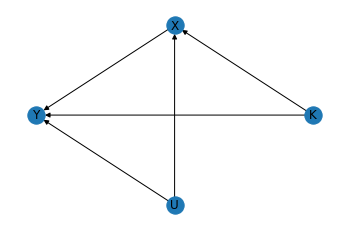

In [ ]:
# GML format 

# With GML string
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="""graph[directed 1 node[id "K" label "K"]  
                    node[id "X" label "X"]
                    node[id "Y" label "Y"]      
                    edge[source "K" target "X"]    
                    edge[source "K" target "Y"]     
                    edge[source "X" target "Y"]]"""
                    
        )
model.view_model()



In [ ]:
# # With GML file
# model=CausalModel(
#         data = df,
#         treatment='X',
#         outcome='Y',
#         graph="example_graphs/simple_graph_example.gml"
#         )
# model.view_model()

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
INFO:dowhy.do_why:Model to find the causal effect of treatment ['X'] on outcome ['Y']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


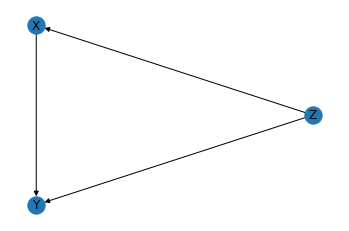

In [ ]:
# With DOT string
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="digraph {Z -> X;Z -> Y;X -> Y;}"
        )
model.view_model()


In [ ]:
# # With DOT file
# model=CausalModel(
#         data = df,
#         treatment='X',
#         outcome='Y',
#         graph="example_graphs/simple_graph_example.dot"
#         )
# model.view_model()

### Using Pandas API (do sampler)

The user should note that this is still an area of active research, so you should be careful about being too confident in bootstrapped error bars from do-samplers. Pearlian inference focuses on more fundamental quantities like the joint distribution of a set of outcomes Y, 𝑃(𝑌), which can be used to derive other statistics of interest. Inverse Probability Weighing of do-adjustment.

https://medium.com/@akelleh/introducing-the-do-sampler-for-causal-inference-a3296ea9e78d

In [ ]:
# the data already loaded in the previous cell. we include the import
# here you so you don't have to keep re-downloading it.

import pandas as pd
import dowhy.api

lalonde=pd.read_csv("https://raw.githubusercontent.com/sanadhis/ITT-ADA-2017/master/04%20-%20Applied%20ML/lalonde.csv")

The key feature here is the do method, which produces a new dataframe replacing the treatment variable with values specified, and the outcome with a sample from the interventional distribution of the outcome. If you don't specify a value for the treatment, it leaves the treatment untouched:

In [ ]:
do_df = lalonde.causal.do(x='treat',
                          outcome='re78',
                          common_causes=['nodegr', 'black', 'hisp', 'age', 'educ', 'married'],
                          variable_types={'age': 'c', 'educ':'c', 'black': 'd', 'hisp': 'd', 
                                          'married': 'd', 'nodegr': 'd','re78': 'c', 'treat': 'b'})

INFO:dowhy.do_why:Model to find the causal effect of treatment ['treat'] on outcome ['re78']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['age', 'educ', 'hisp', 'nodegr', 'black', 'married']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


Notice you get the usual output and prompts about identifiability. This is all dowhy under the hood!

We now have an interventional sample in do_df. It looks very similar to the original dataframe. Compare them:


In [ ]:
print(lalonde.shape)
lalonde.head()

(614, 11)


,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [ ]:
print(do_df.shape)
do_df.sort_values("id").head()

(614, 13)


,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity_score,weight
128,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.046,0.472864,2.114773
288,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.046,0.472864,2.114773
92,NSW10,1,33,12,0,0,1,0,0.0,0.0,12418.070,0.056610,17.664643
275,NSW10,1,33,12,0,0,1,0,0.0,0.0,12418.070,0.056610,17.664643
162,NSW10,1,33,12,0,0,1,0,0.0,0.0,12418.070,0.056610,17.664643


#### Treatment Effect Estimation
We could get a naive estimate before for a treatment effect by doing

In [ ]:
print((lalonde[lalonde['treat'] == 1].mean() - lalonde[lalonde['treat'] == 0].mean())['re78'])

-635.0262120374273


We can do the same with our new sample from the interventional distribution to get a causal effect estimate

In [ ]:
print((do_df[do_df['treat'] == 1].mean() - do_df[do_df['treat'] == 0].mean())['re78'])

781.568394350249


We could get some rough error bars on the outcome using the normal approximation for a 95% confidence interval, like

In [ ]:
import numpy as np
print(1.96*np.sqrt((do_df[do_df['treat'] == 1].var()/len(do_df[do_df['treat'] == 1])) + 
             (do_df[do_df['treat'] == 0].var()/len(do_df[do_df['treat'] == 0])))['re78'])

1205.2460397301224


but note that these DO NOT contain propensity score estimation error. For that, a bootstrapping procedure might be more appropriate.

This is just one statistic we can compute from the interventional distribution of 're78'. We can get all of the interventional moments as well, including functions of 're78'. We can leverage the full power of pandas, like


In [ ]:
do_df['re78'].describe()

count      614.000000
mean      7100.633234
std       7594.109038
min          0.000000
25%        672.877300
50%       5130.757500
75%      11142.870000
max      60307.930000
Name: re78, dtype: float64

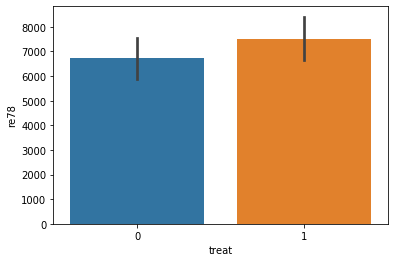

In [ ]:
%matplotlib inline
import seaborn as sns

sns.barplot(data=do_df, x='treat', y='re78')

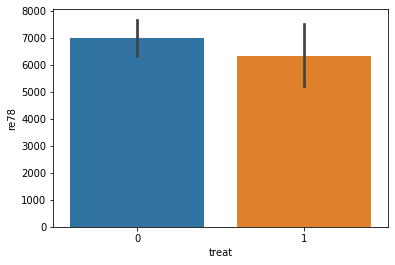

In [ ]:
sns.barplot(data=lalonde, x='treat', y='re78')

#### Further Elaboration on Pearlian Intervention


The "do-sampler" is a new feature in do-why. While most potential-outcomes oriented estimators focus on estimating the specific contrast $E[Y_0 - Y_1]$, Pearlian inference focuses on more fundamental quantities like the joint distribution of a set of outcomes Y, $P(Y)$, which can be used to derive other statistics of interest.

Generally, it's hard to represent a probability distribution non-parametrically. Even if you could, you wouldn't want to gloss over finite-sample problems with you data you used to generate it. With these issues in mind, we decided to represent interventional distributions by sampling from them with an object called to "do-sampler". With these samples, we can hope to compute finite-sample statistics of our interventional data. If we bootstrap many such samples, we can even hope for good sampling distributions for these statistics. (Something that can still be tested)

The user should note that this is still an area of active research, so you should be careful about being too confident in bootstrapped error bars from do-samplers.

Note that do samplers sample from the outcome distribution, and so will vary significantly from sample to sample. To use them to compute outcomes, it's recommended to generate several such samples to get an idea of the posterior variance of your statistic of interest.

## Pearlian Interventions

Following the notion of an intervention in a Pearlian causal model, our do-samplers implement a sequence of steps:

1. Disrupt causes
2. Make Effective
3. Propagate and sample

In the first stage, we imagine cutting the in-edges to all of the variables we're intervening on. In the second stage, we set the value of those variables to their interventional quantities. In the third stage, we propagate that value forward through our model to compute interventional outcomes with a sampling procedure.

In practice, there are many ways we can implement these steps. They're most explicit when we build the model as a linear bayesian network in PyMC3, which is what underlies the MCMC do sampler. In that case, we fit one bayesian network to the data, then construct a new network representing the interventional network. The structural equations are set with the parameters fit in the initial network, and we sample from that new network to get our do sample.

In the weighting do sampler, we abstractly think of "disrupting the causes" by accounting for selection into the causal state through propensity score estimation. These scores contain the information used to block back-door paths, and so have the same statistics effect as cutting edges into the causal state. We make the treatment effective by selecting the subset of our data set with the correct value of the causal state. Finally, we generated a weighted random sample using inverse propensity weighting to get our do sample.

There are other ways you could implement these three steps, but the formula is the same. We've abstracted them out as abstract class methods which you should override if you'd like to create your own do sampler!

## Statefulness

The do sampler when accessed through the high-level pandas API is stateless by default.This makes it intuitive to work with, and you can generate different samples with repeated calls to the `pandas.DataFrame.causal.do`. It can be made stateful, which is sometimes useful. 

The 3-stage process we mentioned before is implemented by passing an internal `pandas.DataFrame` through each of the three stages, but regarding it as temporary. The internal dataframe is reset by default before returning the result.

It can be much more efficient to maintain state in the do sampler between generating samples. This is especially true when step 1 requires fitting an expensive model, as is the case with the MCMC do sampler, the kernel density sampler, and the weighting sampler. 

Instead of re-fitting the model for each sample, you'd like to fit it once, and then generate many samples from the do sampler. You can do this by setting the kwarg `stateful=True` when you call the `pandas.DataFrame.causal.do` method. To reset the state of the dataframe (deleting the model as well as the internal dataframe), you can call the `pandas.DataFrame.causal.reset` method.

Through the lower-level API, the sampler is stateful by default. The assumption is that a "power user" who is using the low-level API will want more control over the sampling process. In this case, state is carried by internal dataframe `self._df`, which is a copy of the dataframe passed on instantiation. The original dataframe is kept in `self._data`, and is used when the user resets state. 

## Integration

The do-sampler is built on top of the identification abstraction used throughout do-why. It uses a `dowhy.CausalModel` to perform identification, and builds any models it needs automatically using this identification.

## Specifying Interventions

There is a kwarg on the `dowhy.do_sampler.DoSampler` object called `keep_original_treatment`. While an intervention might be to set all units treatment values to some specific value, it's often natural to keep them set as they were, and instead remove confounding bias during effect estimation. If you'd prefer not to specify an intervention, you can set the kwarg like `keep_original_treatment=True`, and the second stage of the 3-stage process will be skipped. In that case, any intervention specified on sampling will be ignored.

If the `keep_original_treatment` flag is set to false (it is by default), then you must specify an intervention when you sample from the do sampler. For details, see the demo below!


## Demo

First, let's generate some data and a causal model. Here, Z confounds our causal state, D, with the outcome, Y.

In [ ]:
N = 5000

z = np.random.uniform(size=N)
d = np.random.binomial(1., p=1./(1. + np.exp(-5. * z)))
y = 2. * z + d + 0.1 * np.random.normal(size=N)

df = pd.DataFrame({'Z': z, 'D': d, 'Y': y})

print((df[df.D == 1].mean() - df[df.D == 0].mean())['Y'])


causes = ['D']
outcomes = ['Y']
common_causes = ['Z']

model = CausalModel(df, 
                    causes,
                    outcomes,
                    common_causes=common_causes)


## Idnetification

identification = model.identify_effect()


INFO:dowhy.do_why:Model to find the causal effect of treatment ['D'] on outcome ['Y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['Z', 'U']


1.621574181853743
WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Identification works! We didn't actually need to do this yet, since it will happen internally with the do sampler, but it can't hurt to check that identification works before proceeding. Now, let's build the sampler.

In [ ]:
from dowhy.do_samplers.weighting_sampler import WeightingSampler

sampler = WeightingSampler(df,
                           causal_model=model,
                           keep_original_treatment=True,
                           variable_types={'D': 'b', 'Z': 'c', 'Y': 'c'})



INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['Z', 'U']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


Now, we can just sample from the interventional distribution! Since we set the keep_original_treatment flag to False, any treatment we pass here will be ignored. Here, we'll just pass None to acknowledge that we know we don't want to pass anything.

If you'd prefer to specify an intervention, you can just put the interventional value here instead as a list or numpy array.


In [ ]:
interventional_df = sampler.do_sample(None)
print((interventional_df[interventional_df.D == 1].mean() - interventional_df[interventional_df.D == 0].mean())['Y'])


0.9980454437666204


Now we're much closer to the true effect, which is around 1.0!

## Uplift (CATE, ATE, ITE)

We consider a functional parameter called the conditional average treatment effect (CATE), designed to capture the heterogeneity of a treatment effect across subpopulations when the unconfoundedness assumption applies. In contrast to quantile regressions, the subpopulations of interest are defined in terms of the possible values of a set of continuous covariates rather than the quantiles of the potential outcome distributions.

In [ ]:
similar project by microsoft

https://github.com/microsoft/EconML


The most famous use case of Uplift Modeling would be the 44th US president Barack Obama's 2nd presidential campaign in 2012. Obama's team used Uplift Modeling to find which voters could be persuaded to vote for him. Here are some articles.

    What is ‘Persuasion Modeling’, and how did it help Obama to win the elections?
    How Obama’s Team Used Big Data to Rally Voters
    How uplift modeling helped Obama's campaign -- and can aid marketers


Uplift Modeling estimates uplift scores (a.k.a. CATE: Conditional Average Treatment Effect or ITE: Individual Treatment Effect). Uplift score is how much the estimated conversion rate will increase by the campaign.

Suppose you are in charge of a marketing campaign to sell a product, and the estimated conversion rate (probability to buy a product) of a customer is 50 % if targeted and the estimated conversion rate is 40 % if not targeted, then the uplift score of the customer is (50–40) = +10 % points. Likewise, suppose the estimated conversion rate if targeted is 20 % and the estimated conversion rate if not targeted is 80%, the uplift score is (20–80) = -60 % points (negative value).

The range of uplift scores is between -100 and +100 % points (-1 and +1). It is recommended to target customers with high uplift scores and avoid customers with negative uplift scores to optimize the marketing campaign.


    CausalLift works with both A/B testing results and observational datasets.
    CausalLift can output intuitive metrics for evaluation.


In a word, to use for real-world business.

Existing packages for Uplift Modeling assumes the dataset is from A/B Testing (a.k.a. Randomized Controlled Trial). In real-world business, however, observational datasets in which treatment (campaign) targets were not chosen randomly are more common especially in the early stage of evidence-based decision making. CausalLift supports observational datasets using a basic methodology in Causal Inference called "Inverse Probability Weighting" based on the assumption that propensity to be treated can be inferred from the available features.

 There are 2 challenges of Uplift Modeling; explainability of the model and evaluation. CausalLift utilizes a basic methodology of Uplift Modeling called Two Models approach (training 2 models independently for treated and untreated samples to compute the CATE (Conditional Average Treatment Effects) or uplift scores) to address these challenges.

Explainability of the model - Since it is relatively simple, it is less challenging to explain how it works to stakeholders in the business.

Explainability of evaluation - To evaluate Uplift Modeling, metrics such as Qini and AUUC (Area Under the Uplift Curve) are used in research, but these metrics are difficult to explain to the stakeholders. For business, a metric that can estimate how much more profit can be earned is more practical. Since CausalLift adopted the Two-Model approach, the 2 models can be reused to simulate the outcome of following the recommendation by the Uplift Model and can estimate how much conversion rate (the proportion of people who took the desired action such as buying a product) will increase using the uplift model.


A meta-algorithm uses either a single base learner while having the treatment indicator as a feature (e.g. S-learner), or multiple base learners separately for each of the treatment and control groups (e.g. T-learner, X-learner and R-learner).

Causal ML is a Python package that provides a suite of uplift modeling and causal inference methods using machine learning algorithms based on recent research. It provides a standard interface that allows user to estimate the Conditional Average Treatment Effect (CATE) or Individual Treatment Effect (ITE) from experimental or observational data. Essentially, it estimates the causal impact of intervention T on outcome Y for users with observed features X, without strong assumptions on the model form. Typical use cases include

* Campaign targeting optimization: An important lever to increase ROI in an advertising campaign is to target the ad to the set of customers who will have a favorable response in a given KPI such as engagement or sales. CATE identifies these customers by estimating the effect of the KPI from ad exposure at the individual level from A/B experiment or historical observational data.

* Personalized engagement: A company has multiple options to interact with its customers such as different product choices in up-sell or messaging channels for communications. One can use CATE to estimate the heterogeneous treatment effect for each customer and treatment option combination for an optimal personalized recommendation system.



The package currently supports the following methods

    Tree-based algorithms
        Uplift tree/random forests on KL divergence, Euclidean Distance, and Chi-Square
        Uplift tree/random forests on Contextual Treatment Selection
    Meta-learner algorithms
        S-learner
        T-learner
        X-learner
        R-learner


Table data including the following columns:

    Features
        a.k.a independent variables, explanatory variables, covariates
        e.g. customer gender, age range, etc.
        Note: Categorical variables need to be one-hot coded so propensity can be estimated using logistic regression. pandas.get_dummies can be used.
    Outcome: binary (0 or 1)
        a.k.a dependent variable, target variable, label
        e.g. whether the customer bought a product, clicked a link, etc.
    Treatment: binary (0 or 1)
        a variable you can control and want to optimize for each individual (customer)
        a.k.a intervention
        e.g. whether an advertising campaign was executed, whether a discount was offered, etc.
        Note: if you cannot find a treatment column, you may need to ask stakeholders to get the data, which might take hours to years.
    [Optional] Propensity: continuous between 0 and 1
        propensity (or probability) to be treated for observational datasets (not needed for A/B Testing results)
        If not provided, CausalLift can estimate from the features using logistic regression.


In [ ]:
!pip install causalml

     |████████████████████████████████| 3.9MB 5.2MB/s 
     |████████████████████████████████| 112kB 45.3MB/s 
     |████████████████████████████████| 266kB 47.8MB/s 
     |████████████████████████████████| 1.8MB 34.5MB/s 
  Created wheel for causalml: filename=causalml-0.5.0-cp36-cp36m-linux_x86_64.whl size=419825 sha256=a35818bc4f4647036a8656f9650be252b1b59d60b112436ba6eea049611e9808
  Stored in directory: /root/.cache/pip/wheels/f5/a3/be/76fbcf6d0dbbbbad24113748894117411b7d124dc74c45ad70
  Created wheel for shap: filename=shap-0.32.1-cp36-cp36m-linux_x86_64.whl size=376829 sha256=0672a862c8a8113798e69f38e1d01403843e7a38851d34653f10a7701385f7bd
  Stored in directory: /root/.cache/pip/wheels/8e/b2/50/8fadb5a59789cb5bdeb01b800223be540651ae92915172050b
Successfully built causalml shap


### Average Treatment Effect Estimation with S, T, X, and R Learners

In [ ]:
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor
from causalml.inference.meta import BaseRRegressor
from xgboost import XGBRegressor
from causalml.dataset import synthetic_data

y, X, treatment, _, _, e = synthetic_data(mode=1, n=1000, p=5, sigma=1.0)

lr = LRSRegressor()
te, lb, ub = lr.estimate_ate(X, treatment, y)
print('Average Treatment Effect (Linear Regression): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

xg = XGBTRegressor(random_state=42)
te, lb, ub = xg.estimate_ate(X, treatment, y)
print('Average Treatment Effect (XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

nn = MLPTRegressor(hidden_layer_sizes=(10, 10),
                 learning_rate_init=.1,
                 early_stopping=True,
                 random_state=42)
te, lb, ub = nn.estimate_ate(X, treatment, y)
print('Average Treatment Effect (Neural Network (MLP)): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

## for some reason add this e
xl = BaseXRegressor(learner=XGBRegressor(random_state=42))
te, lb, ub = xl.estimate_ate(X, e, treatment, y)
print('Average Treatment Effect (BaseXRegressor using XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

rl = BaseRRegressor(learner=XGBRegressor(random_state=42))
te, lb, ub =  rl.estimate_ate(X=X, p=e, treatment=treatment, y=y)
print('Average Treatment Effect (BaseRRegressor using XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

Using TensorFlow backend.


Average Treatment Effect (Linear Regression): 0.61 (0.47, 0.76)
[05:01:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.6662
INFO:causalml:    RMSE (Treatment):     0.7097
INFO:causalml:   sMAPE   (Control):     0.6223
INFO:causalml:   sMAPE (Treatment):     0.3938
INFO:causalml:    Gini   (Control):     0.8048
INFO:causalml:    Gini (Treatment):     0.7758


[05:01:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Average Treatment Effect (XGBoost): 0.56 (0.46, 0.65)


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9830
INFO:causalml:    RMSE (Treatment):     1.0484
INFO:causalml:   sMAPE   (Control):     0.7681
INFO:causalml:   sMAPE (Treatment):     0.4899
INFO:causalml:    Gini   (Control):     0.3172
INFO:causalml:    Gini (Treatment):     0.3908
INFO:causalml:Error metrics for group 1


Average Treatment Effect (Neural Network (MLP)): 0.74 (0.62, 0.87)
[05:01:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:01:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:    RMSE   (Control):     0.6662
INFO:causalml:    RMSE (Treatment):     0.7097
INFO:causalml:   sMAPE   (Control):     0.6223
INFO:causalml:   sMAPE (Treatment):     0.3938
INFO:causalml:    Gini   (Control):     0.8048
INFO:causalml:    Gini (Treatment):     0.7758
INFO:causalml:generating out-of-fold CV outcome estimates


Average Treatment Effect (BaseXRegressor using XGBoost): 0.55 (0.46, 0.63)


INFO:causalml:training the treatment effect model for 1 with R-loss


[05:01:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Average Treatment Effect (BaseRRegressor using XGBoost): 0.55 (0.55, 0.56)


### Calculate Individual Treatment Effect (ITE/CATE)

In [ ]:
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset import *
from causalml.metrics import *

**S-learner** estimates the treatment effect using a single machine learning model as follows:

**Stage 1**

Estimate the average outcomes 𝜇(𝑥)
with covariates 𝑋 and an indicator variable for treatment effect 𝑊:

$$
\mu(x)=E[Y | X=x, W=w]
$$

using a machine learning model.


**Stage 2**

Define the CATE estimate as:

$$
\hat{\tau}(x)=\hat{\mu}(x, W=1)-\hat{\mu}(x, W=0)
$$

Including the propensity score in the model can reduce bias from regularization induced confounding [hahn2017bayesian].

When the control and treatment groups are very different in covariates, a single linear model is not sufficient to encode the different relevant dimensions and smoothness of features for the control and treatment groups [alaa2018limits].



In [ ]:
# S Learner
# S-learner estimates the treatment effect using a single machine learning model
# It does nothave ITEs
learner_s = LRSRegressor()
cate_s = learner_s.fit_predict(X=X, treatment=treatment, y=y)


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9806
INFO:causalml:    RMSE (Treatment):     1.0203
INFO:causalml:   sMAPE   (Control):     0.7745
INFO:causalml:   sMAPE (Treatment):     0.4910
INFO:causalml:    Gini   (Control):     0.3145
INFO:causalml:    Gini (Treatment):     0.3964


**T-learner** [kunzel2019metalearners] consists of two stages as follows:

**Stage 1**

Estimate the average outcomes 𝜇0(𝑥) and 𝜇1(𝑥):


$$
\begin{array}{l}{\mu_{0}(x)=E[Y(0) | X=x] \text { and }} \\ {\mu_{1}(x)=E[Y(1) | X=x]}\end{array}
$$

using machine learning models.


**Stage 2**
Define the CATE estimate as:

$$
\hat{\tau}(x)=\hat{\mu}_{1}(x)-\hat{\mu}_{0}(x)
$$


In [ ]:

# T Learner
# T-learner [kunzel2019metalearners] consists of two stages as follows:
learner_t = BaseTRegressor(learner=XGBRegressor())
cate_t = learner_t.fit_predict(X=X, treatment=treatment, y=y)

**X-learner** [kunzel2019metalearners] is an extension of T-learner, and consists of three stages as follows:

**Stage 1**

Estimate the average outcomes 𝜇0(𝑥) and 𝜇1(𝑥):


$$
\begin{array}{l}{\mu_{0}(x)=E[Y(0) | X=x] \text { and }} \\ {\mu_{1}(x)=E[Y(1) | X=x]}\end{array}
$$

using machine learning models.

**Stage 2**

Impute the user level treatment effects, 𝐷1𝑖
and 𝐷0𝑗 for user 𝑖 in the treatment group based on 𝜇0(𝑥), and user 𝑗 in the control groups based on 𝜇1(𝑥):


$$
\begin{aligned} D_{i}^{1} &=Y_{i}^{1}-\hat{\mu}_{0}\left(X_{i}^{1}\right), \text { and } \\ D_{i}^{0} &=\hat{\mu}_{1}\left(X_{i}^{0}\right)-Y^{\wedge} 0i \end{aligned}
$$

Then estimate $ \tau_{0}(x)=E\left[D^{0} | X=x\right]$ and $\tau_{0}(x)=E\left[D^{0} | X=x\right]$ using machine learning models


**Stage 3**
Define the CATE estimate by a weighted average of 𝜏1(𝑥)
and 𝜏0(𝑥):

$$
\tau(x)=g(x) \tau_{0}(x)+(1-g(x)) \tau_{1}(x)
$$

where 𝑔∈[0,1]. We can use propensity scores for 𝑔(𝑥).



In [ ]:
# X Learner
# Extension of T learner with ability to take on additional treatments
learner_x = BaseXRegressor(learner=XGBRegressor())
cate_x = learner_x.fit_predict(X=X, p=e, treatment=treatment, y=y)


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.6662
INFO:causalml:    RMSE (Treatment):     0.7097
INFO:causalml:   sMAPE   (Control):     0.6223
INFO:causalml:   sMAPE (Treatment):     0.3938
INFO:causalml:    Gini   (Control):     0.8048
INFO:causalml:    Gini (Treatment):     0.7758


[05:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



**R-learner** [nie2017quasi] uses the cross-validation out-of-fold estimates of outcomes 𝑚̂^(−𝑖) times (𝑥𝑖)
and propensity scores 𝑒̂^(−𝑖) times (𝑥𝑖). It consists of two stages as follows:

**Stage 1**
Fit 𝑚̂ (𝑥)
and 𝑒̂ (𝑥) with machine learning models using cross-validation.


**Stage 2**
Estimate treatment effects by minimising the R-loss, 𝐿̂ 𝑛(𝜏(𝑥))
:

$$
\hat{L}_{n}(\tau(x))=\frac{1}{n} \sum_{i=1}^{n}\left(\left(Y_{i}-\hat{m}^{(-i)}\left(X_{i}\right)\right)-\left(W_{i}-\hat{e}^{(-i)}\left(X_{i}\right)\right) \tau\left(X_{i}\right)\right)^{2}
$$

where 𝑒^(−𝑖) times (𝑋𝑖), etc. denote the out-of-fold held-out predictions made without using the 𝑖-th training sample.


In [ ]:

# R Learner uses propensity scores 
learner_r = BaseRRegressor(learner=XGBRegressor())
cate_r = learner_r.fit_predict(X=X, p=e, treatment=treatment, y=y)

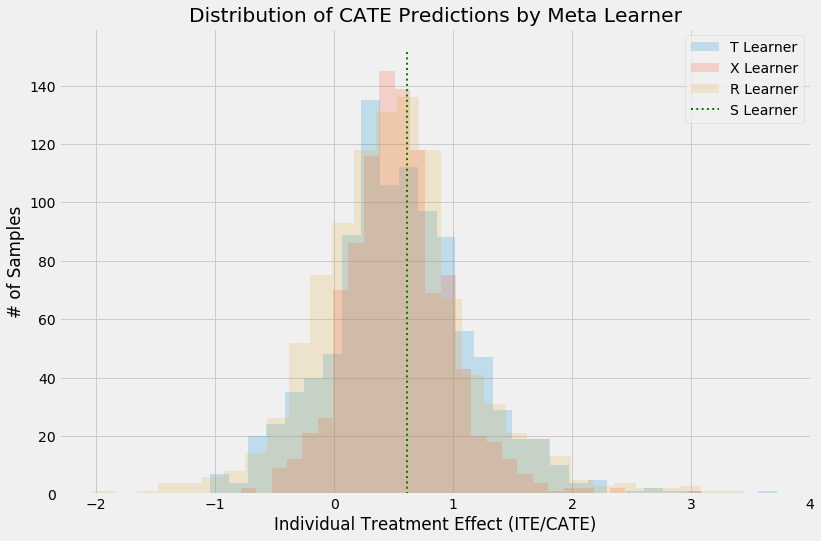

In [ ]:
from matplotlib import pyplot as plt

alpha=0.2
bins=30
plt.figure(figsize=(12,8))
plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner')
plt.hist(cate_x, alpha=alpha, bins=bins, label='X Learner')
plt.hist(cate_r, alpha=alpha, bins=bins, label='R Learner')
plt.vlines(cate_s[0], 0, plt.axes().get_ylim()[1], label='S Learner',
           linestyles='dotted', colors='green', linewidth=2)
plt.title('Distribution of CATE Predictions by Meta Learner')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_=plt.legend()

### Validity of Meta-Learner

We will validate the meta-learners' performance based on the same synthetic data generation method in Part A (simulate_nuisance_and_easy_treatment).

In [ ]:


train_summary, validation_summary = get_synthetic_summary_holdout(simulate_nuisance_and_easy_treatment,
                                                                  n=10000,
                                                                  valid_size=0.2,
                                                                  k=10)


train_summary

INFO:causalml:AUC score: 0.804268
INFO:causalml:AUC score: 0.806955
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0433
INFO:causalml:    RMSE (Treatment):     1.0318
INFO:causalml:   sMAPE   (Control):     0.8394
INFO:causalml:   sMAPE (Treatment):     0.4889
INFO:causalml:    Gini   (Control):     0.2768
INFO:causalml:    Gini (Treatment):     0.3797
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0248
INFO:causalml:    RMSE (Treatment):     1.0349
INFO:causalml:   sMAPE   (Control):     0.8052
INFO:causalml:   sMAPE (Treatment):     0.4905
INFO:causalml:    Gini   (Control):     0.3268
INFO:causalml:    Gini (Treatment):     0.3840


[05:09:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9689
INFO:causalml:    RMSE (Treatment):     0.9784
INFO:causalml:   sMAPE   (Control):     0.8124
INFO:causalml:   sMAPE (Treatment):     0.4754
INFO:causalml:    Gini   (Control):     0.4409
INFO:causalml:    Gini (Treatment):     0.4817
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0024
INFO:causalml:    RMSE (Treatment):     1.0094
INFO:causalml:   sMAPE   (Control):     0.7971
INFO:causalml:   sMAPE (Treatment):     0.4850
INFO:causalml:    Gini   (Control):     0.3809
INFO:causalml:    Gini (Treatment):     0.4369
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0364
INFO:causalml:    RMSE (Treatment):     1.0234
INFO:causalml:   sMAPE   (Control):     0.8299
INFO:causalml:   sMAPE (Treatment):     0.4901
INFO:causalml:    Gini   (Control):     0.2855
INFO:causalml:    Gini (Treatment):     0.3913
INFO:causalml:Error metrics for gr

[05:09:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9423
INFO:causalml:    RMSE (Treatment):     0.9456
INFO:causalml:   sMAPE   (Control):     0.7981
INFO:causalml:   sMAPE (Treatment):     0.4664
INFO:causalml:    Gini   (Control):     0.5050
INFO:causalml:    Gini (Treatment):     0.5244
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0033
INFO:causalml:    RMSE (Treatment):     1.0145
INFO:causalml:   sMAPE   (Control):     0.7930
INFO:causalml:   sMAPE (Treatment):     0.4885
INFO:causalml:    Gini   (Control):     0.3797
INFO:causalml:    Gini (Treatment):     0.4245


[05:09:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss


[05:09:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:AUC score: 0.803987
INFO:causalml:AUC score: 0.801489
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0414
INFO:causalml:    RMSE (Treatment):     1.0476
INFO:causalml:   sMAPE   (Control):     0.8484
INFO:causalml:   sMAPE (Treatment):     0.5069
INFO:causalml:    Gini   (Control):     0.3213
INFO:causalml:    Gini (Treatment):     0.3907
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0238
INFO:causalml:    RMSE (Treatment):     1.0142
INFO:causalml:   sMAPE   (Control):     0.8313
INFO:causalml:   sMAPE (Treatment):     0.4819
INFO:causalml:    Gini   (Control):     0.2661
INFO:causalml:    Gini (Treatment):     0.3764


[05:09:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9780
INFO:causalml:    RMSE (Treatment):     0.9889
INFO:causalml:   sMAPE   (Control):     0.8226
INFO:causalml:   sMAPE (Treatment):     0.4888
INFO:causalml:    Gini   (Control):     0.4546
INFO:causalml:    Gini (Treatment):     0.4962
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9890
INFO:causalml:    RMSE (Treatment):     1.0007
INFO:causalml:   sMAPE   (Control):     0.8251
INFO:causalml:   sMAPE (Treatment):     0.4830
INFO:causalml:    Gini   (Control):     0.3465
INFO:causalml:    Gini (Treatment):     0.3997
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0361
INFO:causalml:    RMSE (Treatment):     1.0419
INFO:causalml:   sMAPE   (Control):     0.8378
INFO:causalml:   sMAPE (Treatment):     0.5062
INFO:causalml:    Gini   (Control):     0.3294
INFO:causalml:    Gini (Treatment):     0.3993
INFO:causalml:Error metrics for gr

[05:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9556
INFO:causalml:    RMSE (Treatment):     0.9537
INFO:causalml:   sMAPE   (Control):     0.8129
INFO:causalml:   sMAPE (Treatment):     0.4783
INFO:causalml:    Gini   (Control):     0.5015
INFO:causalml:    Gini (Treatment):     0.5447
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9933
INFO:causalml:    RMSE (Treatment):     1.0035
INFO:causalml:   sMAPE   (Control):     0.8268
INFO:causalml:   sMAPE (Treatment):     0.4855
INFO:causalml:    Gini   (Control):     0.3398
INFO:causalml:    Gini (Treatment):     0.3958


[05:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss


[05:09:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:AUC score: 0.809579
INFO:causalml:AUC score: 0.801193
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0327
INFO:causalml:    RMSE (Treatment):     1.0187
INFO:causalml:   sMAPE   (Control):     0.8359
INFO:causalml:   sMAPE (Treatment):     0.4866
INFO:causalml:    Gini   (Control):     0.3124
INFO:causalml:    Gini (Treatment):     0.3883
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0468
INFO:causalml:    RMSE (Treatment):     1.0635
INFO:causalml:   sMAPE   (Control):     0.8546
INFO:causalml:   sMAPE (Treatment):     0.5144
INFO:causalml:    Gini   (Control):     0.3522
INFO:causalml:    Gini (Treatment):     0.3939


[05:09:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9667
INFO:causalml:    RMSE (Treatment):     0.9615
INFO:causalml:   sMAPE   (Control):     0.8058
INFO:causalml:   sMAPE (Treatment):     0.4706
INFO:causalml:    Gini   (Control):     0.4520
INFO:causalml:    Gini (Treatment):     0.4941
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0277
INFO:causalml:    RMSE (Treatment):     1.0527
INFO:causalml:   sMAPE   (Control):     0.8569
INFO:causalml:   sMAPE (Treatment):     0.5140
INFO:causalml:    Gini   (Control):     0.3987
INFO:causalml:    Gini (Treatment):     0.4190
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0267
INFO:causalml:    RMSE (Treatment):     1.0119
INFO:causalml:   sMAPE   (Control):     0.8258
INFO:causalml:   sMAPE (Treatment):     0.4864
INFO:causalml:    Gini   (Control):     0.3201
INFO:causalml:    Gini (Treatment):     0.4008
INFO:causalml:Error metrics for gr

[05:09:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9417
INFO:causalml:    RMSE (Treatment):     0.9314
INFO:causalml:   sMAPE   (Control):     0.7892
INFO:causalml:   sMAPE (Treatment):     0.4600
INFO:causalml:    Gini   (Control):     0.5038
INFO:causalml:    Gini (Treatment):     0.5340
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0304
INFO:causalml:    RMSE (Treatment):     1.0491
INFO:causalml:   sMAPE   (Control):     0.8540
INFO:causalml:   sMAPE (Treatment):     0.5151
INFO:causalml:    Gini   (Control):     0.3905
INFO:causalml:    Gini (Treatment):     0.4184


[05:09:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:09:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss


[05:10:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:AUC score: 0.808206
INFO:causalml:AUC score: 0.784190
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0358
INFO:causalml:    RMSE (Treatment):     1.0394
INFO:causalml:   sMAPE   (Control):     0.8367
INFO:causalml:   sMAPE (Treatment):     0.4950
INFO:causalml:    Gini   (Control):     0.2901
INFO:causalml:    Gini (Treatment):     0.3464
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0165
INFO:causalml:    RMSE (Treatment):     1.0409
INFO:causalml:   sMAPE   (Control):     0.8124
INFO:causalml:   sMAPE (Treatment):     0.5134
INFO:causalml:    Gini   (Control):     0.3018
INFO:causalml:    Gini (Treatment):     0.3141


[05:10:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9617
INFO:causalml:    RMSE (Treatment):     0.9774
INFO:causalml:   sMAPE   (Control):     0.8102
INFO:causalml:   sMAPE (Treatment):     0.4765
INFO:causalml:    Gini   (Control):     0.4527
INFO:causalml:    Gini (Treatment):     0.4775
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0011
INFO:causalml:    RMSE (Treatment):     1.0141
INFO:causalml:   sMAPE   (Control):     0.8231
INFO:causalml:   sMAPE (Treatment):     0.5069
INFO:causalml:    Gini   (Control):     0.3478
INFO:causalml:    Gini (Treatment):     0.3815
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0306
INFO:causalml:    RMSE (Treatment):     1.0338
INFO:causalml:   sMAPE   (Control):     0.8313
INFO:causalml:   sMAPE (Treatment):     0.4937
INFO:causalml:    Gini   (Control):     0.2995
INFO:causalml:    Gini (Treatment):     0.3612
INFO:causalml:Error metrics for gr

[05:10:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9358
INFO:causalml:    RMSE (Treatment):     0.9528
INFO:causalml:   sMAPE   (Control):     0.7926
INFO:causalml:   sMAPE (Treatment):     0.4704
INFO:causalml:    Gini   (Control):     0.5078
INFO:causalml:    Gini (Treatment):     0.5152
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0078
INFO:causalml:    RMSE (Treatment):     1.0176
INFO:causalml:   sMAPE   (Control):     0.8272
INFO:causalml:   sMAPE (Treatment):     0.5090
INFO:causalml:    Gini   (Control):     0.3318
INFO:causalml:    Gini (Treatment):     0.3732


[05:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss


[05:10:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:AUC score: 0.797272
INFO:causalml:AUC score: 0.800964
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0242
INFO:causalml:    RMSE (Treatment):     1.0312
INFO:causalml:   sMAPE   (Control):     0.8414
INFO:causalml:   sMAPE (Treatment):     0.4831
INFO:causalml:    Gini   (Control):     0.3164
INFO:causalml:    Gini (Treatment):     0.3885
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0519
INFO:causalml:    RMSE (Treatment):     1.0257
INFO:causalml:   sMAPE   (Control):     0.8645
INFO:causalml:   sMAPE (Treatment):     0.4725
INFO:causalml:    Gini   (Control):     0.2908
INFO:causalml:    Gini (Treatment):     0.3392


[05:10:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9518
INFO:causalml:    RMSE (Treatment):     0.9706
INFO:causalml:   sMAPE   (Control):     0.8105
INFO:causalml:   sMAPE (Treatment):     0.4652
INFO:causalml:    Gini   (Control):     0.4679
INFO:causalml:    Gini (Treatment):     0.5007
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0351
INFO:causalml:    RMSE (Treatment):     1.0081
INFO:causalml:   sMAPE   (Control):     0.8605
INFO:causalml:   sMAPE (Treatment):     0.4713
INFO:causalml:    Gini   (Control):     0.3362
INFO:causalml:    Gini (Treatment):     0.3761
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0194
INFO:causalml:    RMSE (Treatment):     1.0254
INFO:causalml:   sMAPE   (Control):     0.8312
INFO:causalml:   sMAPE (Treatment):     0.4834
INFO:causalml:    Gini   (Control):     0.3205
INFO:causalml:    Gini (Treatment):     0.3976
INFO:causalml:Error metrics for gr

[05:10:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9300
INFO:causalml:    RMSE (Treatment):     0.9435
INFO:causalml:   sMAPE   (Control):     0.7964
INFO:causalml:   sMAPE (Treatment):     0.4573
INFO:causalml:    Gini   (Control):     0.5063
INFO:causalml:    Gini (Treatment):     0.5396
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0370
INFO:causalml:    RMSE (Treatment):     1.0191
INFO:causalml:   sMAPE   (Control):     0.8630
INFO:causalml:   sMAPE (Treatment):     0.4777
INFO:causalml:    Gini   (Control):     0.3443
INFO:causalml:    Gini (Treatment):     0.3671


[05:10:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss


[05:10:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:AUC score: 0.806111
INFO:causalml:AUC score: 0.825484
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0400
INFO:causalml:    RMSE (Treatment):     1.0219
INFO:causalml:   sMAPE   (Control):     0.8344
INFO:causalml:   sMAPE (Treatment):     0.4847
INFO:causalml:    Gini   (Control):     0.2921
INFO:causalml:    Gini (Treatment):     0.3678
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9898
INFO:causalml:    RMSE (Treatment):     1.0499
INFO:causalml:   sMAPE   (Control):     0.7729
INFO:causalml:   sMAPE (Treatment):     0.4896
INFO:causalml:    Gini   (Control):     0.3385
INFO:causalml:    Gini (Treatment):     0.3474


[05:10:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9635
INFO:causalml:    RMSE (Treatment):     0.9571
INFO:causalml:   sMAPE   (Control):     0.8096
INFO:causalml:   sMAPE (Treatment):     0.4664
INFO:causalml:    Gini   (Control):     0.4580
INFO:causalml:    Gini (Treatment):     0.4930
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9831
INFO:causalml:    RMSE (Treatment):     1.0320
INFO:causalml:   sMAPE   (Control):     0.7824
INFO:causalml:   sMAPE (Treatment):     0.4918
INFO:causalml:    Gini   (Control):     0.3469
INFO:causalml:    Gini (Treatment):     0.3912
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0336
INFO:causalml:    RMSE (Treatment):     1.0138
INFO:causalml:   sMAPE   (Control):     0.8262
INFO:causalml:   sMAPE (Treatment):     0.4845
INFO:causalml:    Gini   (Control):     0.3025
INFO:causalml:    Gini (Treatment):     0.3843
INFO:causalml:Error metrics for gr

[05:10:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9384
INFO:causalml:    RMSE (Treatment):     0.9254
INFO:causalml:   sMAPE   (Control):     0.7961
INFO:causalml:   sMAPE (Treatment):     0.4584
INFO:causalml:    Gini   (Control):     0.5090
INFO:causalml:    Gini (Treatment):     0.5368
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9934
INFO:causalml:    RMSE (Treatment):     1.0383
INFO:causalml:   sMAPE   (Control):     0.7823
INFO:causalml:   sMAPE (Treatment):     0.4944
INFO:causalml:    Gini   (Control):     0.3266
INFO:causalml:    Gini (Treatment):     0.3723


[05:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss


[05:10:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:AUC score: 0.806224
INFO:causalml:AUC score: 0.795743
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0438
INFO:causalml:    RMSE (Treatment):     1.0245
INFO:causalml:   sMAPE   (Control):     0.8584
INFO:causalml:   sMAPE (Treatment):     0.4852
INFO:causalml:    Gini   (Control):     0.2975
INFO:causalml:    Gini (Treatment):     0.3759
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0473
INFO:causalml:    RMSE (Treatment):     1.0858
INFO:causalml:   sMAPE   (Control):     0.8487
INFO:causalml:   sMAPE (Treatment):     0.5355
INFO:causalml:    Gini   (Control):     0.3300
INFO:causalml:    Gini (Treatment):     0.3635


[05:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9746
INFO:causalml:    RMSE (Treatment):     0.9639
INFO:causalml:   sMAPE   (Control):     0.8281
INFO:causalml:   sMAPE (Treatment):     0.4686
INFO:causalml:    Gini   (Control):     0.4542
INFO:causalml:    Gini (Treatment):     0.4891
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0378
INFO:causalml:    RMSE (Treatment):     1.0584
INFO:causalml:   sMAPE   (Control):     0.8457
INFO:causalml:   sMAPE (Treatment):     0.5285
INFO:causalml:    Gini   (Control):     0.3443
INFO:causalml:    Gini (Treatment):     0.4084
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0373
INFO:causalml:    RMSE (Treatment):     1.0170
INFO:causalml:   sMAPE   (Control):     0.8495
INFO:causalml:   sMAPE (Treatment):     0.4856
INFO:causalml:    Gini   (Control):     0.3088
INFO:causalml:    Gini (Treatment):     0.3891
INFO:causalml:Error metrics for gr

[05:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9490
INFO:causalml:    RMSE (Treatment):     0.9368
INFO:causalml:   sMAPE   (Control):     0.8147
INFO:causalml:   sMAPE (Treatment):     0.4603
INFO:causalml:    Gini   (Control):     0.5000
INFO:causalml:    Gini (Treatment):     0.5303
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0376
INFO:causalml:    RMSE (Treatment):     1.0609
INFO:causalml:   sMAPE   (Control):     0.8517
INFO:causalml:   sMAPE (Treatment):     0.5342
INFO:causalml:    Gini   (Control):     0.3486
INFO:causalml:    Gini (Treatment):     0.4099


[05:10:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss


[05:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:AUC score: 0.798686
INFO:causalml:AUC score: 0.808161
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0570
INFO:causalml:    RMSE (Treatment):     1.0464
INFO:causalml:   sMAPE   (Control):     0.8568
INFO:causalml:   sMAPE (Treatment):     0.5016
INFO:causalml:    Gini   (Control):     0.3144
INFO:causalml:    Gini (Treatment):     0.3762
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0638
INFO:causalml:    RMSE (Treatment):     1.0526
INFO:causalml:   sMAPE   (Control):     0.8719
INFO:causalml:   sMAPE (Treatment):     0.5160
INFO:causalml:    Gini   (Control):     0.3118
INFO:causalml:    Gini (Treatment):     0.3791


[05:10:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9843
INFO:causalml:    RMSE (Treatment):     0.9810
INFO:causalml:   sMAPE   (Control):     0.8303
INFO:causalml:   sMAPE (Treatment):     0.4808
INFO:causalml:    Gini   (Control):     0.4649
INFO:causalml:    Gini (Treatment):     0.4983
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0459
INFO:causalml:    RMSE (Treatment):     1.0379
INFO:causalml:   sMAPE   (Control):     0.8702
INFO:causalml:   sMAPE (Treatment):     0.5179
INFO:causalml:    Gini   (Control):     0.3492
INFO:causalml:    Gini (Treatment):     0.4097
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0496
INFO:causalml:    RMSE (Treatment):     1.0370
INFO:causalml:   sMAPE   (Control):     0.8478
INFO:causalml:   sMAPE (Treatment):     0.5002
INFO:causalml:    Gini   (Control):     0.3321
INFO:causalml:    Gini (Treatment):     0.3951
INFO:causalml:Error metrics for gr

[05:10:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9580
INFO:causalml:    RMSE (Treatment):     0.9450
INFO:causalml:   sMAPE   (Control):     0.8171
INFO:causalml:   sMAPE (Treatment):     0.4692
INFO:causalml:    Gini   (Control):     0.5145
INFO:causalml:    Gini (Treatment):     0.5480
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0450
INFO:causalml:    RMSE (Treatment):     1.0364
INFO:causalml:   sMAPE   (Control):     0.8652
INFO:causalml:   sMAPE (Treatment):     0.5212
INFO:causalml:    Gini   (Control):     0.3551
INFO:causalml:    Gini (Treatment):     0.4097


[05:10:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss


[05:10:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:AUC score: 0.809268
INFO:causalml:AUC score: 0.814661
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0362
INFO:causalml:    RMSE (Treatment):     1.0409
INFO:causalml:   sMAPE   (Control):     0.8421
INFO:causalml:   sMAPE (Treatment):     0.4832
INFO:causalml:    Gini   (Control):     0.3226
INFO:causalml:    Gini (Treatment):     0.3644
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0397
INFO:causalml:    RMSE (Treatment):     1.0378
INFO:causalml:   sMAPE   (Control):     0.8601
INFO:causalml:   sMAPE (Treatment):     0.4827
INFO:causalml:    Gini   (Control):     0.3192
INFO:causalml:    Gini (Treatment):     0.3790


[05:10:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9735
INFO:causalml:    RMSE (Treatment):     0.9825
INFO:causalml:   sMAPE   (Control):     0.8197
INFO:causalml:   sMAPE (Treatment):     0.4642
INFO:causalml:    Gini   (Control):     0.4584
INFO:causalml:    Gini (Treatment):     0.4853
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0244
INFO:causalml:    RMSE (Treatment):     1.0121
INFO:causalml:   sMAPE   (Control):     0.8605
INFO:causalml:   sMAPE (Treatment):     0.4767
INFO:causalml:    Gini   (Control):     0.3569
INFO:causalml:    Gini (Treatment):     0.4299
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0325
INFO:causalml:    RMSE (Treatment):     1.0363
INFO:causalml:   sMAPE   (Control):     0.8371
INFO:causalml:   sMAPE (Treatment):     0.4834
INFO:causalml:    Gini   (Control):     0.3292
INFO:causalml:    Gini (Treatment):     0.3743
INFO:causalml:Error metrics for gr

[05:10:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9494
INFO:causalml:    RMSE (Treatment):     0.9536
INFO:causalml:   sMAPE   (Control):     0.8053
INFO:causalml:   sMAPE (Treatment):     0.4553
INFO:causalml:    Gini   (Control):     0.5081
INFO:causalml:    Gini (Treatment):     0.5239
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0272
INFO:causalml:    RMSE (Treatment):     1.0127
INFO:causalml:   sMAPE   (Control):     0.8610
INFO:causalml:   sMAPE (Treatment):     0.4783
INFO:causalml:    Gini   (Control):     0.3528
INFO:causalml:    Gini (Treatment):     0.4289


[05:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss


[05:10:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:AUC score: 0.804757
INFO:causalml:AUC score: 0.801460
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0515
INFO:causalml:    RMSE (Treatment):     1.0508
INFO:causalml:   sMAPE   (Control):     0.8627
INFO:causalml:   sMAPE (Treatment):     0.4957
INFO:causalml:    Gini   (Control):     0.2869
INFO:causalml:    Gini (Treatment):     0.3847
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0477
INFO:causalml:    RMSE (Treatment):     1.0065
INFO:causalml:   sMAPE   (Control):     0.8121
INFO:causalml:   sMAPE (Treatment):     0.4701
INFO:causalml:    Gini   (Control):     0.2826
INFO:causalml:    Gini (Treatment):     0.3393


[05:10:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9771
INFO:causalml:    RMSE (Treatment):     0.9858
INFO:causalml:   sMAPE   (Control):     0.8338
INFO:causalml:   sMAPE (Treatment):     0.4797
INFO:causalml:    Gini   (Control):     0.4505
INFO:causalml:    Gini (Treatment):     0.5034
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0235
INFO:causalml:    RMSE (Treatment):     1.0000
INFO:causalml:   sMAPE   (Control):     0.8152
INFO:causalml:   sMAPE (Treatment):     0.4753
INFO:causalml:    Gini   (Control):     0.3442
INFO:causalml:    Gini (Treatment):     0.3631
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0445
INFO:causalml:    RMSE (Treatment):     1.0425
INFO:causalml:   sMAPE   (Control):     0.8505
INFO:causalml:   sMAPE (Treatment):     0.4963
INFO:causalml:    Gini   (Control):     0.2940
INFO:causalml:    Gini (Treatment):     0.3976
INFO:causalml:Error metrics for gr

[05:10:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9506
INFO:causalml:    RMSE (Treatment):     0.9559
INFO:causalml:   sMAPE   (Control):     0.8163
INFO:causalml:   sMAPE (Treatment):     0.4716
INFO:causalml:    Gini   (Control):     0.5076
INFO:causalml:    Gini (Treatment):     0.5412
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0285
INFO:causalml:    RMSE (Treatment):     1.0049
INFO:causalml:   sMAPE   (Control):     0.8151
INFO:causalml:   sMAPE (Treatment):     0.4795
INFO:causalml:    Gini   (Control):     0.3342
INFO:causalml:    Gini (Treatment):     0.3577


[05:10:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss


[05:10:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Abs % Error of ATE,MSE,KL Divergence
Actuals,0.000000,0.000000,0.000000
S Learner (LR),0.388954,0.080117,3.818102
S Learner (XGB),0.170903,0.026048,0.169165
T Learner (LR),0.367001,0.041178,0.345389
T Learner (XGB),0.167180,0.077904,0.329255
X Learner (LR),0.367001,0.041178,0.345389
X Learner (XGB),0.080251,0.035612,0.113922
R Learner (LR),0.314180,0.039644,0.328597
R Learner (XGB),0.064824,0.058672,0.081420


In [ ]:
train_summary

,Abs % Error of ATE,MSE,KL Divergence
Actuals,0.000000,0.000000,0.000000
S Learner (LR),0.388954,0.080117,3.818102
S Learner (XGB),0.170903,0.026048,0.169165
T Learner (LR),0.367001,0.041178,0.345389
T Learner (XGB),0.167180,0.077904,0.329255
X Learner (LR),0.367001,0.041178,0.345389
X Learner (XGB),0.080251,0.035612,0.113922
R Learner (LR),0.314180,0.039644,0.328597
R Learner (XGB),0.064824,0.058672,0.081420


In [ ]:
validation_summary

,Abs % Error of ATE,MSE,KL Divergence
Actuals,0.000000,0.000000,0.000000
S Learner (LR),0.391030,0.080125,3.852796
S Learner (XGB),0.171938,0.026233,0.211149
T Learner (LR),0.367846,0.041114,0.367778
T Learner (XGB),0.165467,0.071834,0.337448
X Learner (LR),0.367846,0.041114,0.367778
X Learner (XGB),0.079152,0.033613,0.135387
R Learner (LR),0.315344,0.039538,0.352431
R Learner (XGB),0.067368,0.055667,0.099292


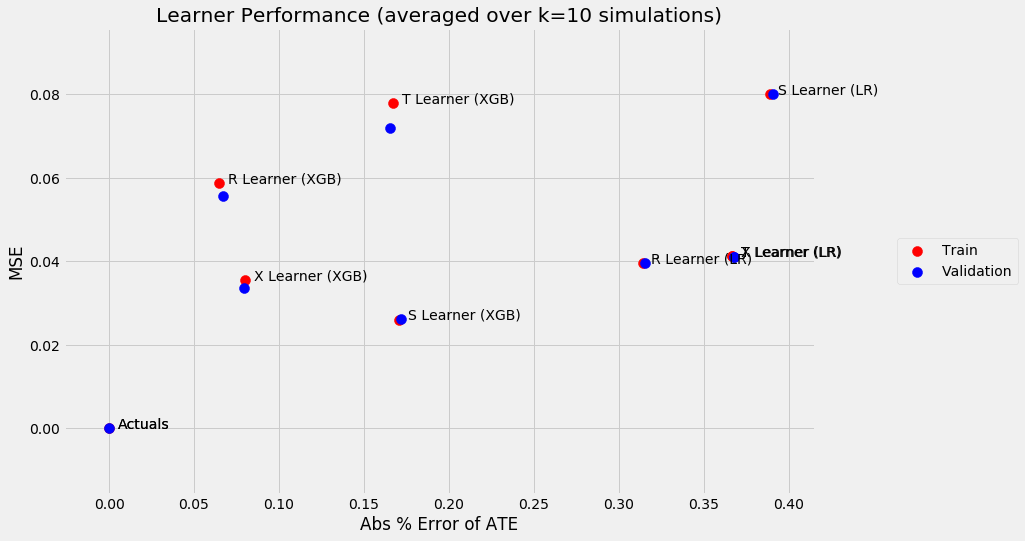

In [ ]:
scatter_plot_summary_holdout(train_summary,
                             validation_summary,
                             k=10,
                             label=['Train', 'Validation'],
                             drop_learners=[],
                             drop_cols=[])

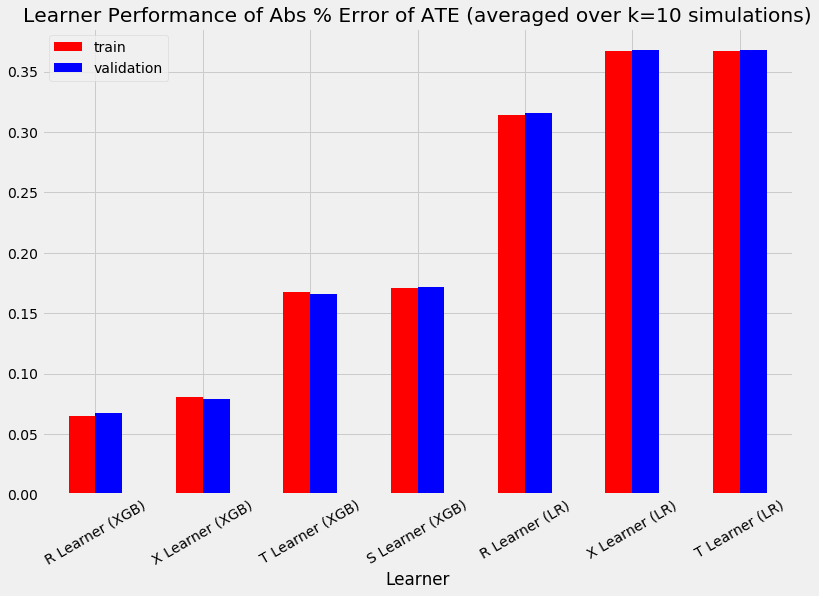

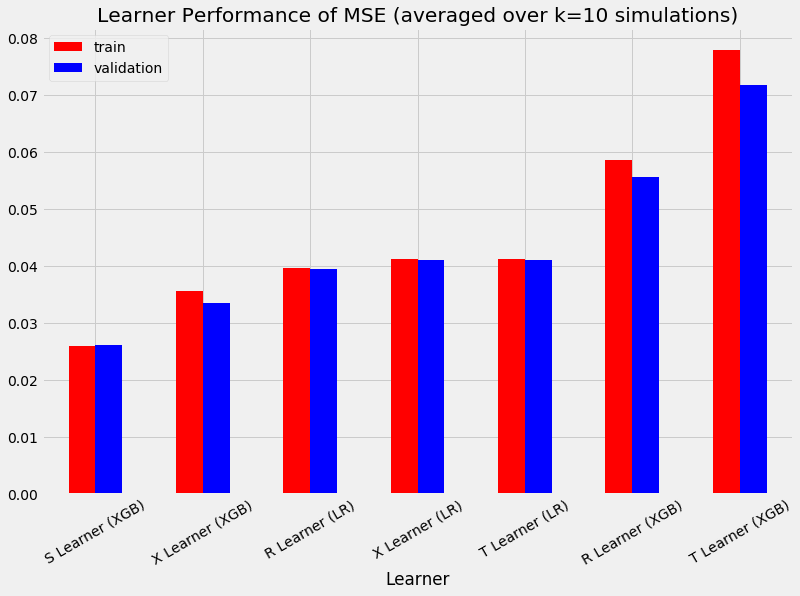

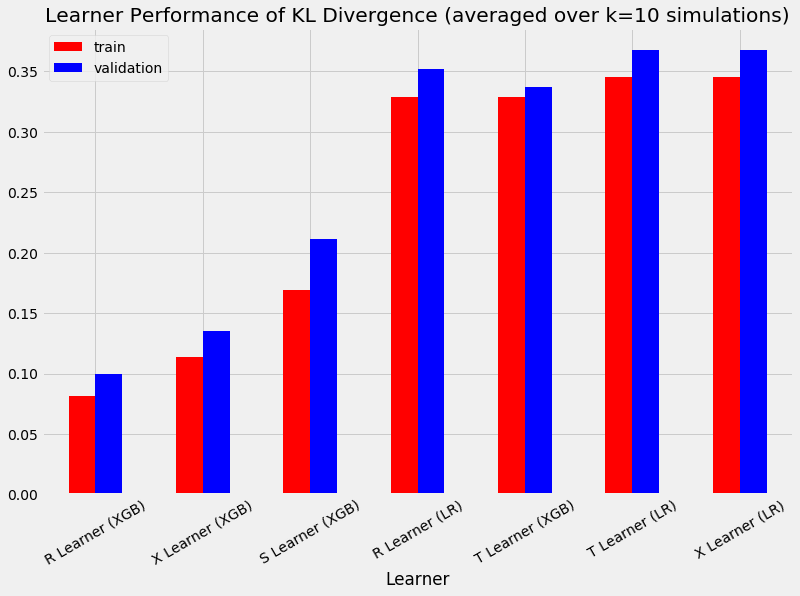

In [ ]:
bar_plot_summary_holdout(train_summary,
                         validation_summary,
                         k=10,
                         drop_learners=['S Learner (LR)'],
                         drop_cols=[])

In [ ]:


# Single simulation
train_preds, valid_preds = get_synthetic_preds_holdout(simulate_nuisance_and_easy_treatment,
                                                       n=50000,
                                                       valid_size=0.2)



INFO:causalml:AUC score: 0.808340
INFO:causalml:AUC score: 0.803637
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0322
INFO:causalml:    RMSE (Treatment):     1.0299
INFO:causalml:   sMAPE   (Control):     0.8363
INFO:causalml:   sMAPE (Treatment):     0.4875
INFO:causalml:    Gini   (Control):     0.3099
INFO:causalml:    Gini (Treatment):     0.3835
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0477
INFO:causalml:    RMSE (Treatment):     1.0259
INFO:causalml:   sMAPE   (Control):     0.8509
INFO:causalml:   sMAPE (Treatment):     0.4873
INFO:causalml:    Gini   (Control):     0.3224
INFO:causalml:    Gini (Treatment):     0.3676


[05:12:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9920
INFO:causalml:    RMSE (Treatment):     0.9923
INFO:causalml:   sMAPE   (Control):     0.8229
INFO:causalml:   sMAPE (Treatment):     0.4772
INFO:causalml:    Gini   (Control):     0.4011
INFO:causalml:    Gini (Treatment):     0.4544
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0167
INFO:causalml:    RMSE (Treatment):     1.0025
INFO:causalml:   sMAPE   (Control):     0.8411
INFO:causalml:   sMAPE (Treatment):     0.4803
INFO:causalml:    Gini   (Control):     0.3882
INFO:causalml:    Gini (Treatment):     0.4157
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0275
INFO:causalml:    RMSE (Treatment):     1.0244
INFO:causalml:   sMAPE   (Control):     0.8272
INFO:causalml:   sMAPE (Treatment):     0.4873
INFO:causalml:    Gini   (Control):     0.3173
INFO:causalml:    Gini (Treatment):     0.3931
INFO:causalml:Error metrics for gr

[05:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     0.9837
INFO:causalml:    RMSE (Treatment):     0.9819
INFO:causalml:   sMAPE   (Control):     0.8170
INFO:causalml:   sMAPE (Treatment):     0.4746
INFO:causalml:    Gini   (Control):     0.4184
INFO:causalml:    Gini (Treatment):     0.4679
INFO:causalml:Error metrics for group 1
INFO:causalml:    RMSE   (Control):     1.0158
INFO:causalml:    RMSE (Treatment):     1.0022
INFO:causalml:   sMAPE   (Control):     0.8379
INFO:causalml:   sMAPE (Treatment):     0.4814
INFO:causalml:    Gini   (Control):     0.3895
INFO:causalml:    Gini (Treatment):     0.4150


[05:12:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for 1 with R-loss


[05:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


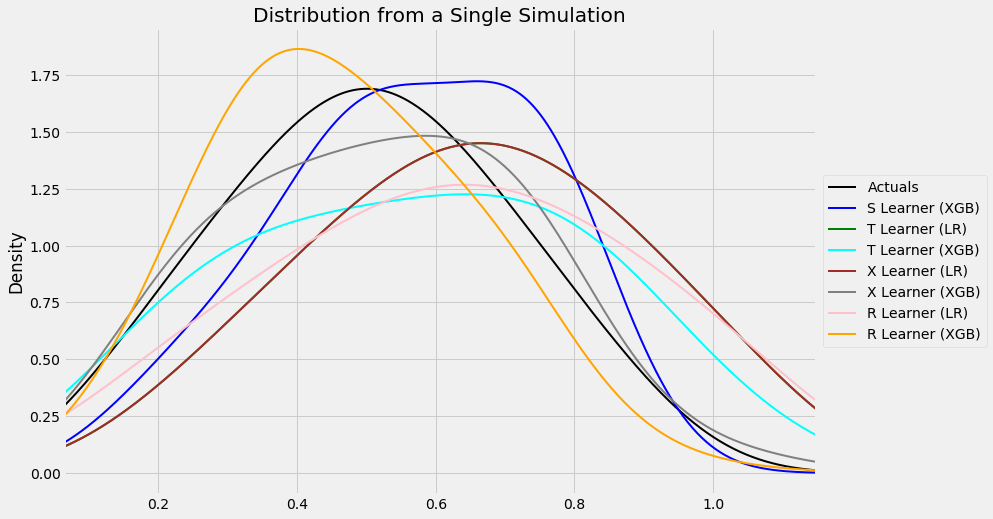

In [ ]:
#distribution plot for signle simulation of Training
distr_plot_single_sim(train_preds, kind='kde', linewidth=2, bw_method=0.5,
                      drop_learners=['S Learner (LR)',' S Learner (XGB)'])

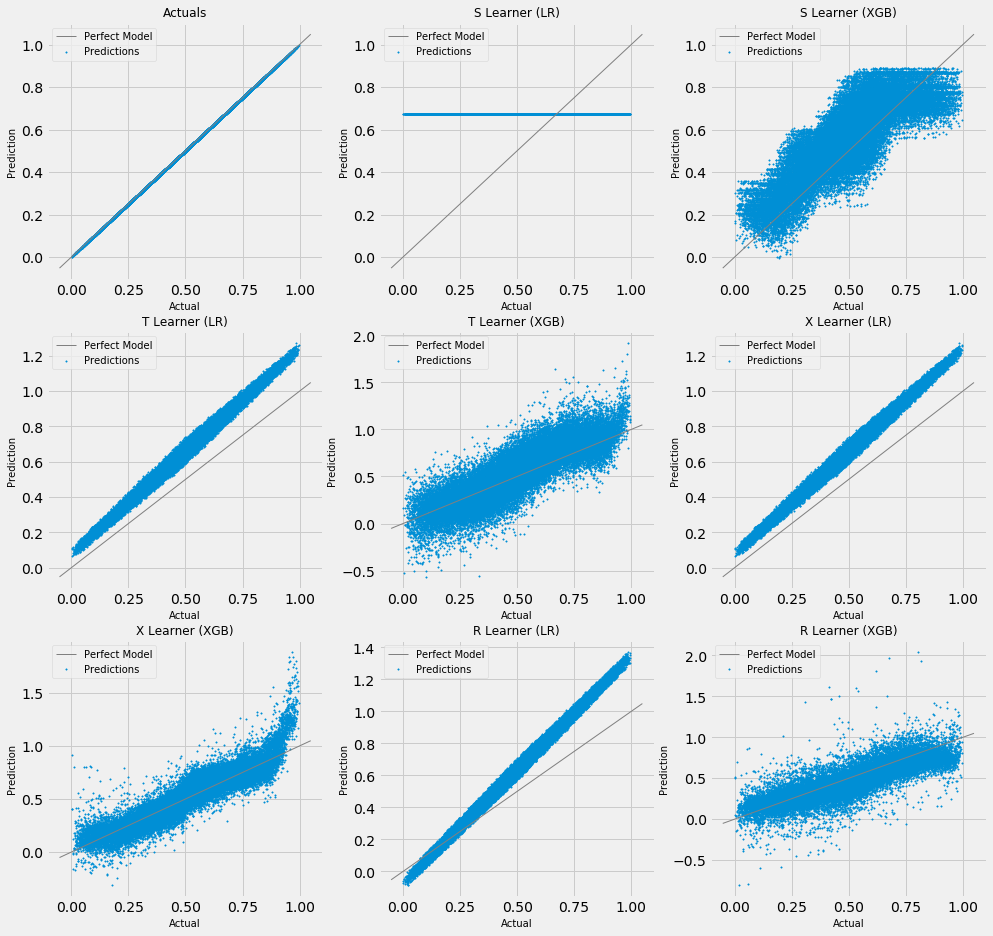

In [ ]:
# Scatter Plots for a Single Simulation of Training Data
scatter_plot_single_sim(train_preds)

### Propensity Matching and Estimation

In [ ]:
# Estimation
from causalml.propensity import ElasticNetPropensityModel

pm = ElasticNetPropensityModel(n_fold=5, random_state=42)
ps = pm.fit_predict(X, y)


In [ ]:
# Matching

from causalml.match import NearestNeigoborMatch, create_table_one

psm = NearestNeighborMatch(replace=False,
                           ratio=1,
                           random_state=42)
matched = psm.match_by_group(data=df,
                             treatment_col=treatment_col,
                             score_col=score_col,
                             groupby_col=groupby_col)

create_table_one(data=matched,
                 treatment_col=treatment_col,
                 features=covariates)


#### Confidence Intervals

In [ ]:
# Generate synthetic data using mode 1
y, X, treatment, tau, b, e = synthetic_data(mode=1, n=10000, p=8, sigma=1.0)

treatment = np.array(['treatment_a' if val==1 else 'control' for val in treatment])

# Normal
alpha = 0.05
learner_s = BaseSRegressor(XGBRegressor(), ate_alpha=alpha, control_name='control')
ate_s, ate_s_lb, ate_s_ub = learner_s.estimate_ate(X=X, treatment=treatment, y=y, return_ci=True)
                                                   
print(np.vstack((ate_s_lb, ate_s, ate_s_ub)))

ate_s_b, ate_s_lb_b, ate_s_ub_b = learner_s.estimate_ate(X=X, treatment=treatment, y=y, return_ci=True,
                                                         bootstrap_ci=True, n_bootstraps=100, bootstrap_size=5000)

print(np.vstack((ate_s_lb_b, ate_s_b, ate_s_ub_b)))

[06:30:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group treatment_a
INFO:causalml:    RMSE   (Control):     0.9792
INFO:causalml:    RMSE (Treatment):     0.9679
INFO:causalml:   sMAPE   (Control):     0.8232
INFO:causalml:   sMAPE (Treatment):     0.4678
INFO:causalml:    Gini   (Control):     0.4547
INFO:causalml:    Gini (Treatment):     0.4886


[[0.57165861]
 [0.60995507]
 [0.64825154]]


In [ ]:
## CATE CIs

alpha = 0.05
learner_s = BaseSRegressor(XGBRegressor(), ate_alpha=alpha, control_name='control')
cate_s, cate_s_lb, cate_s_ub = learner_s.fit_predict(X=X, treatment=treatment, y=y, return_ci=True,
                               n_bootstraps=100, bootstrap_size=5000)

cate_s


[06:30:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


INFO:causalml:Error metrics for group treatment_a
INFO:causalml:    RMSE   (Control):     0.9792
INFO:causalml:    RMSE (Treatment):     0.9679
INFO:causalml:   sMAPE   (Control):     0.8232
INFO:causalml:   sMAPE (Treatment):     0.4678
INFO:causalml:    Gini   (Control):     0.4547
INFO:causalml:    Gini (Treatment):     0.4886
INFO:causalml:Bootstrap Confidence Intervals
  0%|          | 0/100 [00:00<?, ?it/s]

[06:30:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:30:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  1%|          | 1/100 [00:00<00:43,  2.29it/s]

[06:30:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  2%|▏         | 2/100 [00:00<00:42,  2.30it/s]

[06:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  3%|▎         | 3/100 [00:01<00:42,  2.30it/s]

[06:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  4%|▍         | 4/100 [00:01<00:42,  2.27it/s]

[06:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  5%|▌         | 5/100 [00:02<00:41,  2.28it/s]

[06:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  6%|▌         | 6/100 [00:02<00:41,  2.28it/s]

[06:30:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  7%|▋         | 7/100 [00:03<00:40,  2.30it/s]

[06:30:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  8%|▊         | 8/100 [00:03<00:40,  2.29it/s]

[06:30:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


  9%|▉         | 9/100 [00:03<00:39,  2.29it/s]

[06:30:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 10%|█         | 10/100 [00:04<00:39,  2.30it/s]

[06:30:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 11%|█         | 11/100 [00:04<00:38,  2.30it/s]

[06:30:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 12%|█▏        | 12/100 [00:05<00:38,  2.31it/s]

[06:30:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 13%|█▎        | 13/100 [00:05<00:37,  2.32it/s]

[06:30:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 14%|█▍        | 14/100 [00:06<00:37,  2.31it/s]

[06:30:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 15%|█▌        | 15/100 [00:06<00:36,  2.30it/s]

[06:30:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 16%|█▌        | 16/100 [00:06<00:36,  2.30it/s]

[06:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 17%|█▋        | 17/100 [00:07<00:36,  2.29it/s]

[06:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 18%|█▊        | 18/100 [00:07<00:35,  2.29it/s]

[06:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 19%|█▉        | 19/100 [00:08<00:35,  2.29it/s]

[06:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 20%|██        | 20/100 [00:08<00:34,  2.29it/s]

[06:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 21%|██        | 21/100 [00:09<00:34,  2.30it/s]

[06:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 22%|██▏       | 22/100 [00:09<00:34,  2.29it/s]

[06:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 23%|██▎       | 23/100 [00:10<00:33,  2.27it/s]

[06:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 24%|██▍       | 24/100 [00:10<00:33,  2.29it/s]

[06:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 25%|██▌       | 25/100 [00:10<00:32,  2.28it/s]

[06:30:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 26%|██▌       | 26/100 [00:11<00:32,  2.29it/s]

[06:30:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 27%|██▋       | 27/100 [00:11<00:32,  2.28it/s]

[06:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 28%|██▊       | 28/100 [00:12<00:31,  2.29it/s]

[06:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 29%|██▉       | 29/100 [00:12<00:31,  2.24it/s]

[06:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 30%|███       | 30/100 [00:13<00:30,  2.26it/s]

[06:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 31%|███       | 31/100 [00:13<00:30,  2.27it/s]

[06:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 32%|███▏      | 32/100 [00:13<00:29,  2.28it/s]

[06:30:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 33%|███▎      | 33/100 [00:14<00:29,  2.28it/s]

[06:30:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 34%|███▍      | 34/100 [00:14<00:28,  2.29it/s]

[06:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 35%|███▌      | 35/100 [00:15<00:28,  2.29it/s]

[06:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 36%|███▌      | 36/100 [00:15<00:28,  2.29it/s]

[06:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 37%|███▋      | 37/100 [00:16<00:27,  2.28it/s]

[06:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 38%|███▊      | 38/100 [00:16<00:27,  2.28it/s]

[06:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 39%|███▉      | 39/100 [00:17<00:26,  2.29it/s]

[06:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 40%|████      | 40/100 [00:17<00:26,  2.28it/s]

[06:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 41%|████      | 41/100 [00:17<00:25,  2.29it/s]

[06:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 42%|████▏     | 42/100 [00:18<00:25,  2.30it/s]

[06:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 43%|████▎     | 43/100 [00:18<00:24,  2.29it/s]

[06:31:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 44%|████▍     | 44/100 [00:19<00:24,  2.29it/s]

[06:31:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 45%|████▌     | 45/100 [00:19<00:23,  2.30it/s]

[06:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 46%|████▌     | 46/100 [00:20<00:23,  2.30it/s]

[06:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 47%|████▋     | 47/100 [00:20<00:22,  2.31it/s]

[06:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 48%|████▊     | 48/100 [00:20<00:22,  2.30it/s]

[06:31:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 49%|████▉     | 49/100 [00:21<00:22,  2.28it/s]

[06:31:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 50%|█████     | 50/100 [00:21<00:21,  2.29it/s]

[06:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 51%|█████     | 51/100 [00:22<00:21,  2.29it/s]

[06:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 52%|█████▏    | 52/100 [00:22<00:21,  2.28it/s]

[06:31:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 53%|█████▎    | 53/100 [00:23<00:20,  2.26it/s]

[06:31:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 54%|█████▍    | 54/100 [00:23<00:20,  2.27it/s]

[06:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 55%|█████▌    | 55/100 [00:24<00:19,  2.29it/s]

[06:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 56%|█████▌    | 56/100 [00:24<00:19,  2.29it/s]

[06:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 57%|█████▋    | 57/100 [00:24<00:18,  2.28it/s]

[06:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 58%|█████▊    | 58/100 [00:25<00:18,  2.28it/s]

[06:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 59%|█████▉    | 59/100 [00:25<00:17,  2.28it/s]

[06:31:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 60%|██████    | 60/100 [00:26<00:17,  2.28it/s]

[06:31:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 61%|██████    | 61/100 [00:26<00:17,  2.29it/s]

[06:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 62%|██████▏   | 62/100 [00:27<00:16,  2.29it/s]

[06:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 63%|██████▎   | 63/100 [00:27<00:16,  2.28it/s]

[06:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 64%|██████▍   | 64/100 [00:27<00:15,  2.27it/s]

[06:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 65%|██████▌   | 65/100 [00:28<00:15,  2.28it/s]

[06:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 66%|██████▌   | 66/100 [00:28<00:14,  2.28it/s]

[06:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 67%|██████▋   | 67/100 [00:29<00:14,  2.28it/s]

[06:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 68%|██████▊   | 68/100 [00:29<00:14,  2.28it/s]

[06:31:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 69%|██████▉   | 69/100 [00:30<00:13,  2.28it/s]

[06:31:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 70%|███████   | 70/100 [00:30<00:13,  2.29it/s]

[06:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 71%|███████   | 71/100 [00:31<00:12,  2.30it/s]

[06:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 72%|███████▏  | 72/100 [00:31<00:12,  2.30it/s]

[06:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 73%|███████▎  | 73/100 [00:31<00:11,  2.30it/s]

[06:31:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 74%|███████▍  | 74/100 [00:32<00:11,  2.30it/s]

[06:31:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 75%|███████▌  | 75/100 [00:32<00:10,  2.30it/s]

[06:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 76%|███████▌  | 76/100 [00:33<00:10,  2.28it/s]

[06:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 77%|███████▋  | 77/100 [00:33<00:10,  2.29it/s]

[06:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 78%|███████▊  | 78/100 [00:34<00:09,  2.30it/s]

[06:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 79%|███████▉  | 79/100 [00:34<00:09,  2.31it/s]

[06:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 80%|████████  | 80/100 [00:34<00:08,  2.31it/s]

[06:31:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 81%|████████  | 81/100 [00:35<00:08,  2.30it/s]

[06:31:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 82%|████████▏ | 82/100 [00:35<00:07,  2.29it/s]

[06:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 83%|████████▎ | 83/100 [00:36<00:07,  2.29it/s]

[06:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 84%|████████▍ | 84/100 [00:36<00:06,  2.30it/s]

[06:31:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 85%|████████▌ | 85/100 [00:37<00:06,  2.30it/s]

[06:31:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 86%|████████▌ | 86/100 [00:37<00:06,  2.31it/s]

[06:31:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 87%|████████▋ | 87/100 [00:38<00:05,  2.29it/s]

[06:31:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 88%|████████▊ | 88/100 [00:38<00:05,  2.28it/s]

[06:31:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 89%|████████▉ | 89/100 [00:38<00:04,  2.29it/s]

[06:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 90%|█████████ | 90/100 [00:39<00:04,  2.29it/s]

[06:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 91%|█████████ | 91/100 [00:39<00:03,  2.29it/s]

[06:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 92%|█████████▏| 92/100 [00:40<00:03,  2.29it/s]

[06:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 93%|█████████▎| 93/100 [00:40<00:03,  2.29it/s]

[06:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 94%|█████████▍| 94/100 [00:41<00:02,  2.27it/s]

[06:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 95%|█████████▌| 95/100 [00:41<00:02,  2.28it/s]

[06:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 96%|█████████▌| 96/100 [00:41<00:01,  2.29it/s]

[06:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 97%|█████████▋| 97/100 [00:42<00:01,  2.29it/s]

[06:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 98%|█████████▊| 98/100 [00:42<00:00,  2.27it/s]

[06:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 99%|█████████▉| 99/100 [00:43<00:00,  2.29it/s]

[06:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 100/100 [00:43<00:00,  2.27it/s]

[06:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([[0.63715827],
       [0.73582286],
       [0.56132948],
       ...,
       [0.82233089],
       [0.79830194],
       [0.80349147]])

In [ ]:
#### For work on other CIs and multiple treatments

https://github.com/uber/causalml/blob/master/examples/meta_learners_with_synthetic_data_multiple_treatment.ipynb



## A/B Testing

Can be divided into frequentist and bayesian A/B testing. Functionally quite similar except for bayesian techniques providing us with more information around point estimates. If we stick with linear models, we could frame the problem in a bayesian way, but it feels like this approach is very similar to covariate adjustment. 

For both, we would want to define the power we want and hence the required sample size. https://www.firmai.org/documents/Power%20analysis%20for%20AB%20tests/#ab-testing

### Calculate The Necessary Sample Size

Before running an A/B test to compare a new website design (labeled the B design) to the existing design (labeled A), it is a good idea to determine how many users will be needed to evaluate if the new design performs better than the old one. The t-test is an effective statistical tool to evaulate significance once the experiment is over, and there are many online tutorials explaining how to use it. I didn’t find a comparable resource explaining the calculation of sample sizes, so I put together this notebook to demonstrate the (simple) steps.

Calculating necessary sample sizes given

* null hypothesis
* expected effect size
* false positive rate
* false negative rate. 


Now, I’ll enter some numbers to make the discussion more concrete. Imagine we have a click through rate of 5% with the original design. Call this p_a for probability(A). Suppose in addition that we decide that the click through rate must increase to at least 7% to make changing the design worthwhile. Call this p_b. Finally, we’ll calculate the average click through rate, p, assuming that our sample sizes will be equal.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import scipy.stats


p_a = .05 # assume we have a base click rate of 5% for our original design (A group)
p_b = .07 # we want to detect an increase in click rate to 7%, otherwise not worth changing the design

p = (p_a + p_b)/2.



n addition to these two values, we’ll need to decide on false positive and false negative rates. We can use these to look up values from the Normal distribution (results are labeled Z below). Here we chose 5% false positive rate (also called Type I error rate) and 80% power, equivalent to a 20% false negative rate (or Type II error rate). These rates are fairly standard, but completely arbitrary. These choices mean that we expect to falsely say that B is an improvement 5% of the time when actually it is no better than A, and we expect to falsely say B is not and improvement 20% of the time when actually it is better than A.

In [ ]:
Z8 = scipy.stats.norm.ppf(.8) # we will need this to ensure 80% power (20% false negative rate)
Z95 = scipy.stats.norm.ppf(1 - .05) # we will need this for 5% false positive rate (95% confidence level), one-tailed
Z975 = scipy.stats.norm.ppf(1 - .025) # 5% false positive rate for two-tailed case

ES = abs(p_b - p_a)/np.sqrt(p*(1-p))

num_tails = 1 # presumably we are testing design b because we think it will improve the click rate...

if num_tails == 2:
    n = 2*((Z975 + Z8)/ES)**2  # two-tailed
else:
    n = 2*((Z95 + Z8)/ES)**2 # one-tailed

print('You need', round(n), ' samples in each group to get a 5% false positive and 20% false negative rate given effect size')


You need 1743.0  samples in each group to get a 5% false positive and 20% false negative rate given effect size


That’s it! We have the sample sizes necessary given our requirements. In this case, we need about 1743 people to experience the A design and 1743 people to experience the B design.

Let’s convince ourselves that we actually meet our specs by simulating two experimental results. In one experiment the B design results in a minimal improvement (to 7% click rate). In the other (labeled null) there is no change in the click rate.

In [ ]:
n_a = int(round(n))
n_b = int(round(n))

num_experiments = 10000

conversions_a = np.random.random((n_a, num_experiments)) < p_a
conversions_b_null = np.random.random((n_b, num_experiments)) < p_a
conversions_b = np.random.random((n_b, num_experiments)) < p_b

mean_a = np.mean(conversions_a, axis=0)
mean_b_null = np.mean(conversions_b_null, axis=0)
mean_b = np.mean(conversions_b, axis=0)

#s_a = np.std(conversions_a, ddof=1)
#s_b_null = np.std(conversions_b_null, ddof=1)
#s_b = np.std(conversions_b, ddof=1)
# equivalent:
s_a = np.sqrt(np.sum((conversions_a - mean_a[np.newaxis, :])**2, axis=0)/(n_a - 1))
s_b_null = np.sqrt(np.sum((conversions_b_null - mean_b_null[np.newaxis, :])**2, axis=0)/(n_b - 1))
s_b = np.sqrt(np.sum((conversions_b - mean_b[np.newaxis, :])**2, axis=0)/(n_b - 1))

sp = np.sqrt(s_a**2/n_a + s_b**2/n_b)
sp_null = np.sqrt(s_a**2/n_a + s_b_null**2/n_b)

if num_tails == 2:
    t = abs(mean_b - mean_a) / sp # two-tailed
    t_null = abs(mean_b_null - mean_a) / sp_null # two-tailed
    results = t > Z975  # two-tailed
    results_null = t_null > Z975  # two-tailed
else:
    t = (mean_b - mean_a) / sp # one-tailed
    t_null = (mean_b_null - mean_a) / sp_null # one-tailed
    results = t > Z95 # one-tailed
    results_null = t_null > Z95 # one-tailed

false_negative_rate = 1 - np.sum(results).astype('float')/len(results)
false_positive_rate = np.sum(results_null).astype('float')/len(results_null)

print(false_negative_rate, "false negative rate, we expect it to be close to 20%")
print(false_positive_rate, "false positive rate, we expect it to be close to 5%")


0.20409999999999995 false negative rate, we expect it to be close to 20%
0.0509 false positive rate, we expect it to be close to 5%


Text(0.016, 100, '5.0% false positives')

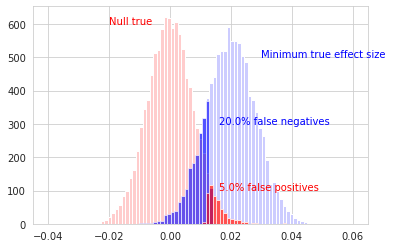

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

n, bins, p = ax.hist(mean_b - mean_a, np.linspace(-.04, .06, 88), color=[.8, .8, 1])
n, bins, p = ax.hist(mean_b_null - mean_a, bins, color=[1, .8, .8])

n, bins, p = ax.hist(mean_b[results==False] - mean_a[results==False], bins, color='b', alpha=.6)
n, bins, p = ax.hist(mean_b_null[results_null] - mean_a[results_null], bins, color='r', alpha=.6)

ax.text(-.02, 600, 'Null true', color='r')
ax.text(.03, 500, 'Minimum true effect size', color='b')

ax.text(.016, 300, str(round(false_negative_rate*100))+"% false negatives", color='b')
ax.text(.016, 100, str(round(false_positive_rate*100))+"% false positives", color='r')


We can see that we achieve exactly the false positive and false negative rates we set out for in the two different simuluated experiments.

### Frequentist

This project looks at an A/B test run by an e-commerce website. The goal is to see if the company should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import *

%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
np.random.seed(42)

# import data
df = pd.read_csv('https://raw.githubusercontent.com/firmai/random-assets/master/ab_data.csv')

# show top rows
df.head()



,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


Mismatch Remove

In [ ]:

# Looking for rows where treatment/control doesn't line up with old/new pages respectively
df_t_not_n = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
df_not_t_n = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

# Add lengths
mismatch= len(df_t_not_n) + len(df_not_t_n)

# Create one dataframe from it
mismatch_df = pd.concat([df_t_not_n, df_not_t_n])

# Remove incriminating rows
mismatch_index = mismatch_df.index
df = df.drop(mismatch_index)



Remove non-unique users 

In [ ]:
# Calculate number of rows in dataset and display
df_length = len(df)         
print(df_length)

# Find unique users
print("Unique users:", len(df.user_id.unique()))

# Check for not unique users
print("Non-unique users:", len(df)-len(df.user_id.unique()))

# Drop duplicated user
df = df.drop_duplicates(keep='first', subset=["user_id"])



290585
Unique users: 290584
Non-unique users: 1


Probabilities

In [ ]:
# What is the probability of an individual converting regardless of the page they receive
# Probability of user converting
print("Probability of user converting:", df.converted.mean())

#Given that an individual was in the control group, what is the probability they converted?
# Probability of control group converting
print("Probability of control group converting:", 
      df[df['group']=='control']['converted'].mean())

# Given that an individual was in the treatment group, what is the probability they converted?

# Probability of treatment group converting
print("Probability of treatment group converting:", 
      df[df['group']=='treatment']['converted'].mean())



Probability of user converting: 0.11959708724499628
Probability of control group converting: 0.1203863045004612
Probability of treatment group converting: 0.11880806551510564


For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

* Null-hypothesis

$H_0:  p_{new} - p_{old} \leq 0$ 

*i.e.* The null hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be equal to zero (the same) or lower than zero (the old page has a higher population conversion rate).

* Alternative-hypothesis

$H_1: p_{new} - p_{old} > 0$

*i.e.* The alternative hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be greater than zero to zero (the new page has a higher population conversion rate).

Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the converted success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of the page.

Use a sample size for each page equal to the ones in ab_data.csv.

Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null.

![alt text](https://)`a.` What is the **convert rate** for $p_{new}$ under the null? 

Given the assumption in the question, $p_{new} = p_{old}$. Hence, we should calculate the average of the real $p_{new}$ and $p_{old}$ (probability of conversion given new page and old page respectively) to calculate $p_{mean}$.


In [ ]:
## Same as before


# Calculate probability of conversion for new page
p_new = df[df['landing_page']=='new_page']['converted'].mean()

print("Probability of conversion for new page (p_new):", p_new)

# Calculate probability of conversion for old page
p_old = df[df['landing_page']=='old_page']['converted'].mean()

print("Probability of conversion for old page (p_old):", p_old)

# Calc. differences in probability of conversion for new and old page (not under H_0)
p_diff = p_new-p_old

print("Difference in probability of conversion for new and old page (not under H_0):", p_diff)

Probability of conversion for new page (p_new): 0.11880806551510564
Probability of conversion for old page (p_old): 0.1203863045004612
Difference in probability of conversion for new and old page (not under H_0): -0.0015782389853555567


Hence:

$p_{new}: 0.1188$

$p_{old}: 0.1204$

The **convert rate** for $p_{new}$ under the null 

$p_{mean}=p_{old_0}=p_{new_0}: 0.1196$

The **convert rate** for $p_{old}$ under the null? 

As above $p_{new_0} - p_{old_0}= 0$


In [ ]:
# Calculate n_new and n_old
n_new, n_old = df['landing_page'].value_counts()

print("new:", n_new, "\nold:", n_old)

new: 145310 
old: 145274


Hence:

Number of tests with the new page

$n_{new}: 145310$

Number of tests with the old page

$n_{old}: 145274$

Now we will simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null. Store these $n_{new}$ 1's and 0's in new_page_converted.

In [ ]:
p_mean = df["converted"].mean()

[p_mean, (1-p_mean)]

[0.11959708724499628, 0.8804029127550037]

In [ ]:
# Simulate conversion rates under null hypothesis
# [0.11959718500778342, 0.8804028149922166] % choose [1, 0]
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean, (1-p_mean)])

new_page_converted.mean()

0.1196132406579038

Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [ ]:
# Simulate conversion rates under null hypothesis
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_mean, (1-p_mean)])

old_page_converted.mean()

0.1177843247931495

Find $p_{new}$ - $p_{old}$ for your simulated values

In [ ]:
# Calculate difference in p under the null hypothesis
new_page_converted.mean()-old_page_converted.mean()

0.0018289158647542963

Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process 

In [ ]:
## Good, I like these simulations. 
p_diffs = []

# Re-run simulation 10,000 times
# trange creates an estimate for how long this program will take to run
for i in trange(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean, (1-p_mean)])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_mean, (1-p_mean)])
    p_diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)

100%|██████████| 10000/10000 [01:14<00:00, 133.80it/s]


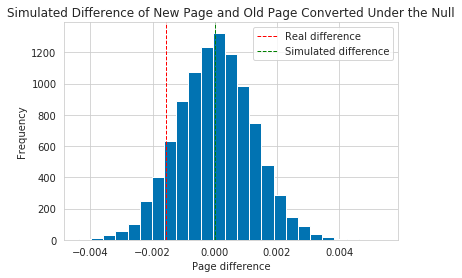

In [ ]:
# Plot histogram
plt.hist(p_diffs, bins=25)
plt.title('Simulated Difference of New Page and Old Page Converted Under the Null')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=(p_new-p_old), color='r', linestyle='dashed', linewidth=1, label="Real difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='g', linestyle='dashed', linewidth=1, label="Simulated difference")
plt.legend()
plt.show()


The simulated data creates a normal distribution (no skew) as expected due to how the data was generated. The mean of this normal distribution is 0, which which is what the data should look like under the null hypothesis.

The proportion of the p_diffs are greater than the actual difference observed

In [ ]:
p_diff = p_new - p_old

# Find proportion of p_diffs greater than the actual difference
greater_than_diff = [i for i in p_diffs if i > p_diff]


# Calculate values
print("Actual difference:" , p_diff)

p_greater_than_diff = len(greater_than_diff)/len(p_diffs)

print('Proportion greater than actual difference:', p_greater_than_diff)

print('As a percentage: {}%'.format(p_greater_than_diff*100))


Actual difference: -0.0015782389853555567
Proportion greater than actual difference: 0.9065
As a percentage: 90.64999999999999%


If our sample conformed to the null hypothesis then we’d expect the proportion greater than the actual difference to be 0.5. However, we calculate that almost 90% of the population in our simulated sample lies above the real difference which does not only suggest that the new page does not do significantly better than the old page, it might even be worse!


We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance.

In [ ]:
# Import statsmodels
import statsmodels.api as sm

# Calculate number of conversions
# Some of these values were defined ealier in this notebook: n_old and n_new

convert_old = len(df[(df['landing_page']=='old_page')&(df['converted']==1)])
convert_new = len(df[(df['landing_page']=='new_page')&(df['converted']==1)])

print("convert_old:", convert_old, 
      "\nconvert_new:", convert_new,
      "\nn_old:", n_old,
      "\nn_new:", n_new)


# Find z-score and p-value
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], 
                                              nobs=[n_new, n_old], alternative = 'larger')

print("z-score:", z_score,
     "\np-value:", p_value)


convert_old: 17489 
convert_new: 17264 
n_old: 145274 
n_new: 145310
z-score: -1.3109241984234394 
p-value: 0.9050583127590245


In [ ]:
## Similar to above, but what is happening behind the scenes. 

# null hypothesis: the samples have identical averages
# if p < 0.05, reject null hypothesis that the two samples are identical
import scipy.stats as stats

# ztest
def ztest(x1, n1, x2, n2, one_tailed=False):
    """
    One- or Two-Tailed Z-test for two samples
    
    Args:
        x1 = # of successes in Sample 1
        n1 = # of observations in Sample 1
        x2 = # of successes in Sample 2
        n2 = # of observations in Sample 2
        one_tailed = Boolean, whether or not the test should be One-Tailed
        
    Return:
        z = Z-stat
    """
    p1 = float(x1) / n1
    p2 = float(x2) / n2    
 
    p = float(x1 + x2) / (n1 + n2)
    se = p * (1. - p) * ((1. / n1) + (1. / n2))
    sse = np.sqrt(se)
    
    z = float(p1 - p2) / sse
    p = 1 - stats.norm.cdf(abs(z))
    
    if not one_tailed:
        p *= 2.
    print(z, p)
    return z, p

# Do a test with fake data:

control_observations = n_old #n1
control_successes = convert_old # x1
test_observations = n_new #n2
test_successes = convert_new #x2


## left is z-stat and right is p-value
z_stat, p_value = ztest(control_successes, control_observations, test_successes, test_observations, one_tailed=True)

def compute_standard_error_prop_two_samples(x1, n1, x2, n2, alpha=0.05):
    p1 = x1/n1
    p2 = x2/n2    
    se = p1*(1-p1)/n1 + p2*(1-p2)/n2
    return np.sqrt(se)
    
def zconf_interval_two_samples(x1, n1, x2, n2, alpha=0.05):
    p1 = x1/n1
    p2 = x2/n2    
    se = compute_standard_error_prop_two_samples(x1, n1, x2, n2)
    z_critical = stats.norm.ppf(1-0.5*alpha)
    return p2-p1-z_critical*se, p2-p1+z_critical*se

ci_low,ci_upp = zconf_interval_two_samples(control_successes, control_observations, test_successes, test_observations)
print(' 95% Confidence Interval = ( {0:.2f}% , {1:.2f}% )'
      .format(100*ci_low, 100*ci_upp))

1.3109241984234394 0.09494168724097551
 95% Confidence Interval = ( -0.39% , 0.08% )


Simply put, a z-score is the number of standard deviations from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is. Given the above definition, it would seem that the differences between the lines shown in the histogram above is -1.31 standard deviations. The p-value is roughly 10.0% which is the probability that this result is due to random chance, this is not enough evidence to reject the null hypothesis and thus we fail to do so. The p-value that we got from ab_page is 0.190 that is significant difference with p-value in A/B Testing, which is around 0.9. The reason is because there are two totally different Null Hypothesis. One inequality direction, is naturally more certain. 

### Regression Approach

The regression approach allows us to also add an intercept which can account for bias. It is also somewhat easier. We will use a logistic regression.

The goal is to use statsmodels to fit the regression model to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received. Add an intercept column, as well as an ab_page column, which is 1 when an individual receives the treatment and 0 if control.

In [ ]:
df3 = df # Clone dataframe in case of a mistake

df3['intercept'] = pd.Series(np.zeros(len(df3)), index=df3.index)
df3['ab_page'] = pd.Series(np.zeros(len(df3)), index=df3.index)

# Find indexes that need to be changed for treatment group
index_to_change = df3[df3['group']=='treatment'].index

# Change values
df3.set_value(index=index_to_change, col='ab_page', value=1)
df3.set_value(index=df3.index, col='intercept', value=1)

# Change datatype
df3[['intercept', 'ab_page']] = df3[['intercept', 'ab_page']].astype(int)

# Move "converted" to RHS
df3 = df3[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]

# Set up logistic regression
logit = sm.Logit(df3['converted'], df3[['ab_page', 'intercept']])

# Calculate results
result=logit.fit()

result.summary2() # result.summary() wasn't working for some reason, but this one does

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2019-12-04 00:45 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
==================================================================

"""

Apparently the p-value associated with ab_page is 0.1899, which is slightly lower than the p-value I calculated using the z-test above. The reason why the value is lower is because I added an intercept which is meant to account for bias. This means that this value is more accurate. (As in, it’s probably closer to the true p-value)

Although it would seem from the outset that there is a difference between the conversion rates of new and old pages, there is just not enough evidence to reject the null hypothesis. From the histogram shown in this report, it seems that the new page does worse than the old page.

** There is a benefit to adding additional data and that is the ability to estimate the different effects for people with different associated characteristics. **

We now have an estimate of the effect size, and our uncertainty of it. Often however, we need to make a decision with this information. How exactly we make this choice should depend on the cost/benefits of the decision, but it is sometimes enough just to ask whether or not our estimated value of Δ is “significantly” different from zero. This is usually done by using the language of hypothesis testing.

### Increasing the Power

You can increase the power using correlated covariates. You can use this methodology in the next section.

https://www.firmai.org/documents/variance-reduction/#generate-dataset

## Bayesian

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The t-test, z-tests and confidence intervals are classic Frequentist test for a significant difference in means between groups. 



One common application of Bayesian analysis in industry is the analysis of split tests. We can use pymc3 to perform split test analysis or do the process manually by sampling from posterior distributions for the arm conversion rates.

The dataset below contains information on user “conversions” on a fitness app on different “arms” of a split test.

A “conversion” is jargon for whether or not a user performed a desired action or not, typically a purchase.

“Arms” are the jargon for the different versions of a product in a currently running split test. Split tests are also commonly referred to as A/B tests, where A and B denote arms in the test.

The data has 6 columns:

* arm: the version of the app this user was randomly assigned to
* gender: male/female
* age: age bins, one of 20-30, 30-40, 40-50
* day: the day (total of 21 days)
* fitness: the user's self reported fitness level from -5 to 5
* converted: 1 if the user purchased the product, 0 if not


In [ ]:
### Each row is a unique user

data = pd.read_csv('https://raw.githubusercontent.com/firmai/random-assets/master/split_test_data.csv')
data['male'] = data.gender.map(lambda x: 1 if x == 'male' else 0)


When a new arm is introduced into a split test, it is generally tested at a low percentage of users initially before assignment becomes balanced between the arms. This ensures that if something is terribly wrong with one of the arms it does not ruin the experience for too many potential customers. So the question is does the new arm lead the user to purchase the product.

In [ ]:
data.groupby('arm')['converted'].agg(np.mean)


arm
A    0.185393
B    0.116667
C    0.255814
Name: converted, dtype: float64

In [ ]:
## You can look at overall conversion rate differences along age, gender, and fitness.

data.groupby('age')['converted'].agg(np.mean)


age
20-30    0.253112
30-40    0.155738
40-50    0.116667
Name: converted, dtype: float64

In [ ]:
## Interesting relationship, the fitter you are,the more liklely you were
## to convert.
data.groupby('fitness')['converted'].agg(np.mean)


fitness
-5.0    0.055556
-4.0    0.026316
-3.0    0.073171
-2.0    0.148649
-1.0    0.086957
 0.0    0.179487
 1.0    0.161290
 2.0    0.171053
 3.0    0.276923
 4.0    0.391892
 5.0    0.484848
Name: converted, dtype: float64

In [ ]:
data.arm.value_counts()


A    356
B    240
C    129
Name: arm, dtype: int64

Subset the data to the first 5 days. We will start by just modeling the conversion rate distributions for arms A and B through day 5. At day 5, arm C has still not been introduced yet and so there are just 2 arms.

In [ ]:
# import pymc3 as pm

# current = data[data.day < 5]
# print(current.shape, current.arm.unique())
# print(current.groupby('arm')['converted'].agg(np.sum))



Set up a pymc3 model and uniform priors for the probabilities of conversion for arms A and B. Recall that pymc3 uses the with ... syntax for defining models. The first step in setting up a new model is to define the model as the “context”. We are going to model the probability distributions for conversion rates for arms A and B. As always with Bayesian statistics, we need to define prior distributions for our belief about these probabilities/rates of conversion per arm.

Let’s say we have no belief whatsoever about rates, and so we will set an uninformative, flat priors over probabilities from 0 to 1 for both arms. This is equivalent to saying that we believe all conversion rates to be equally likely for both arms.

In [ ]:
with pm.Model() as day5_model:
    
    arm_A_prior = pm.Uniform('A_prior', lower=0, upper=1)
    A_p = pm.Uniform('A_prob', lower=0, upper=1)
    B_p = pm.Uniform('B_prob', lower=0, upper=1)



Set up pm.Bernoulli distributions to model conversions for arms A and B. We are now going to set up the “likelihood” portion of the model. This is going to model the $P(data\; 	\;\theta)$ part of Bayes theorem. Our conversions are represented by a vector of 1s and 0s denoting whether or not the user converted or not. This is known as a “Bernoulli” process and pymc3 has an approprite function to handle it:

p = is set to the prior for the arm that you defined in the last section.

observed = should be set to the converted values for that arm specifically in the data.

By giving it an observed parameter, we are telling pymc3 that we want this to evaluate the likelihood of our data (the conversions) against models represented by the p= probability argument. We assign p= to be our prior belief about conversion rates for that arm because we want to update this belief (convert to posterior) based on the conversion data we have observed for that arm.

In [ ]:
df3 = data[data["arm"].isin(["B","A"])].reset_index(drop=True)


with day5_model:
    
    A = pm.Bernoulli('A', p=A_p, observed=df3[df3.arm == "A"].converted.values)
    B = pm.Bernoulli('B', p=B_p, observed=df3[df3.arm == "B"].converted.values) 
    
    AvB = pm.Deterministic('AvB', A_p - B_p)  ## this is the uplift

#### Fit the model

Now that we’ve set up the prior distributions and likelihoods, we can actually fit the model.

Below is code that will run the sampling procedure to find the posteriors:

In [ ]:
with day5_model:

    # construct the "trace" variable that holds samples for all of our distributions:
    trace = pm.sample(50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [B_prob, A_prob, A_prior]
100%|██████████| 50500/50500 [00:37<00:00, 1339.34it/s]


Again you use the context with day5_model: to run code for your model.

start = pm.find_MAP() will try to find a good starting point for the sampling process. This means that your model will converge on the “likely” area much faster (though it makes the fitting slower initially).

trace = pm.sample(50000, start=start) uses the sampling method in pymc3 to perform 50,000 sampling iterations. This will automatically assign the NUTS sampler for you. The dataset is small so the speed shouldn’t be too bad.

When this completes, the trace variable now contains the posterior samples for the distributions we specified while constructing the model.

In [ ]:
# We defined our arm A prior distribution to be uniform and named it 'arm_A_prior'. 
# The pm.sample() procedure converted this into our posterior belief for the rate
# of conversions in arm A. You can access these posterior samples using the name
# you gave the variable when you created it:
#
# this will be a vector of values that are different potential rates of conversion
# for arm A. A histogram of these rates defines, roughly, the posterior probability
# distribution for the arm A rates after we consider the data we have collected.

In [ ]:
!pip install arviz

/usr/local/lib/python3.6/dist-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f864d49f048>,
      dtype=object)

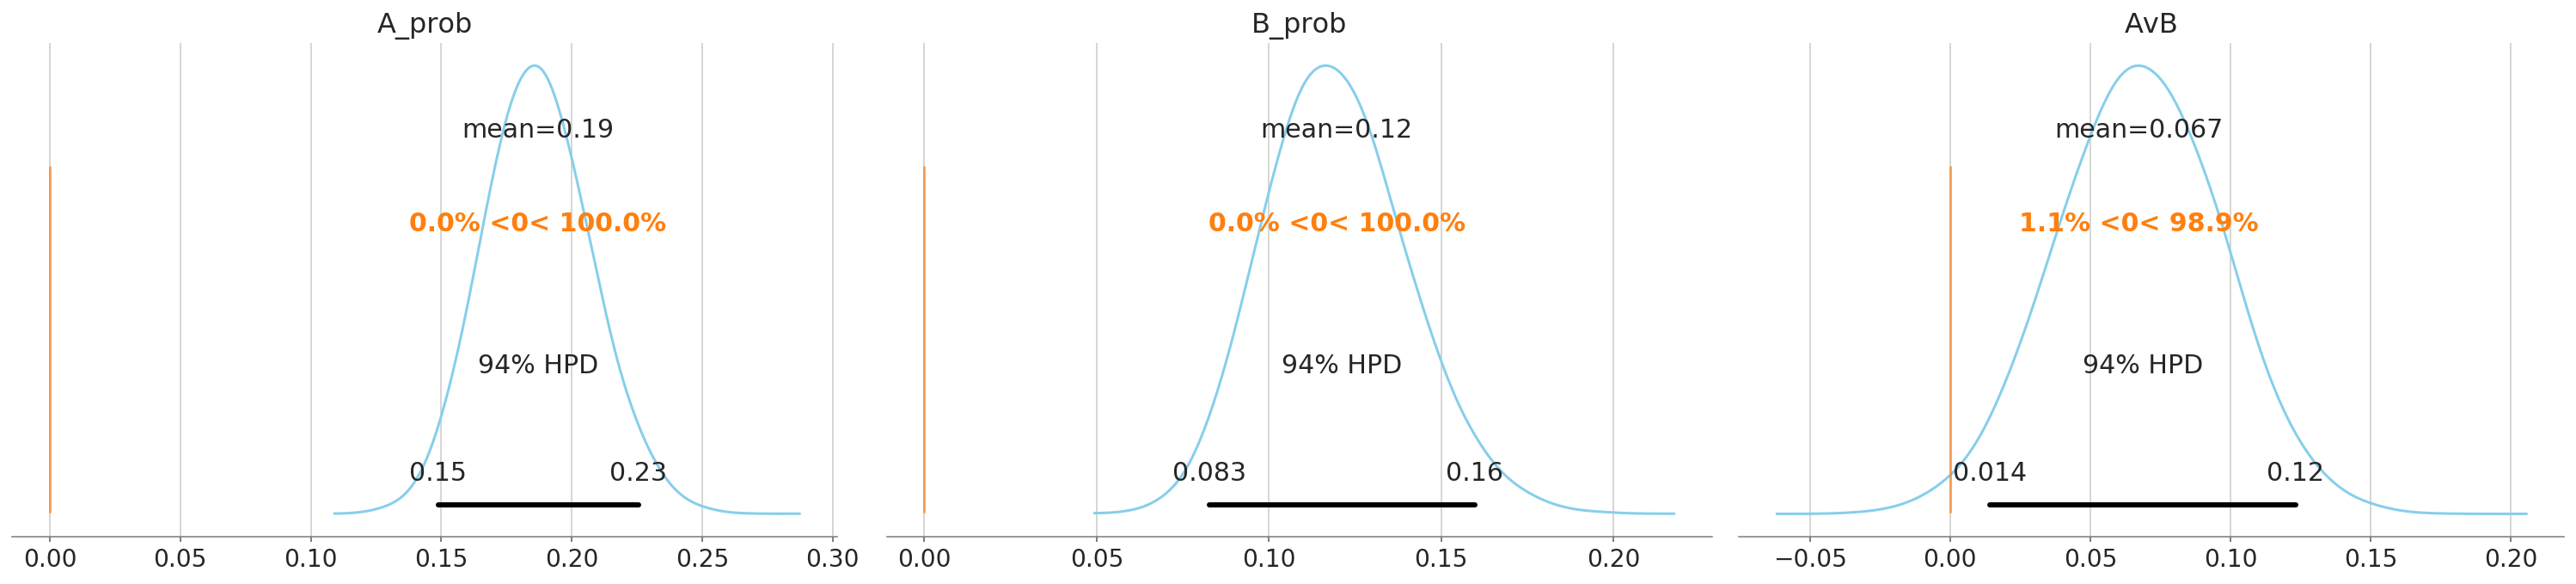

In [ ]:
pm.plot_posterior(trace[5000::3], varnames=['A_prob','B_prob','AvB'],
                  ref_val=0, color='#87ceeb')


In [ ]:
# Import statsmodels
import statsmodels.api as sm

# Calculate number of conversions
# Some of these values were defined ealier in this notebook: n_old and n_new

df2 = data[data["arm"].isin(["B","A"])].reset_index(drop=True)

n_A = len(df2[(df2['arm']=='A')])
n_B = len(df2[(df2['arm']=='B')])

convert_A = len(df2[(df2['arm']=='A')&(df2['converted']==1)])
convert_B = len(df2[(df2['arm']=='B')&(df2['converted']==1)])

print("convert_A:", convert_A, 
      "\nconvert_B:", convert_B,
      "\nn_A:",n_A ,
      "\nn_B:",n_B  )

## According to this analysis new clearly performs worse.
## There is some other testing techniques we will test.

# Find z-score and p-value
z_score, p_value = sm.stats.proportions_ztest(count=[convert_B, convert_A], 
                                              nobs=[n_B, n_A])
print("z-score:", z_score,
     "\np-value:", p_value)



convert_A: 66 
convert_B: 28 
n_A: 356 
n_B: 240
z-score: -2.25768200572263 
p-value: 0.023965491876189363


In [ ]:
!pip install brewer2mpl

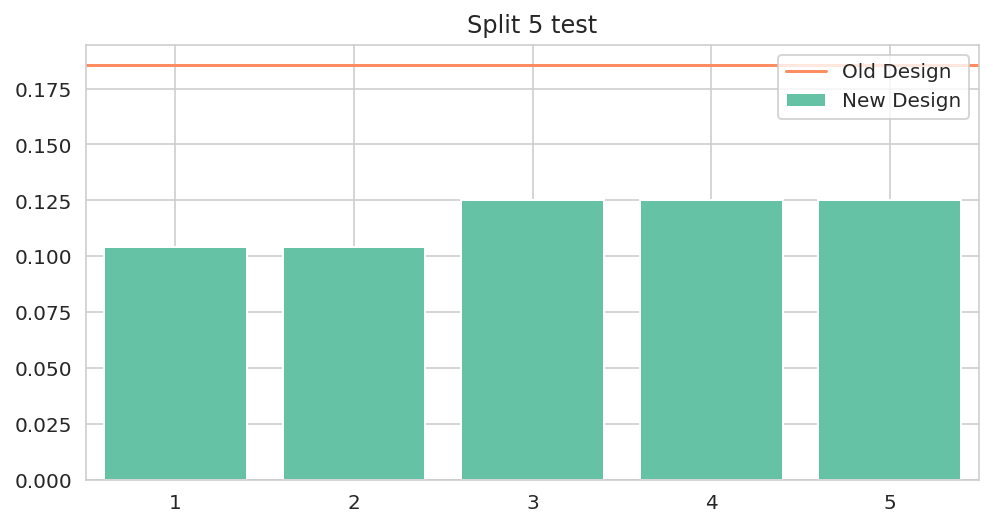

In [ ]:
import brewer2mpl
brewer_set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors

A = df2[df2["arm"]=="A"]["converted"]
B = df2[df2["arm"]=="B"]["converted"]

np.random.seed(1)
Bs = np.array(B)

np.random.shuffle(Bs )
fig, ax = plt.subplots(figsize=(8,4))

Bs.shape[0]/5


Bs = Bs.reshape((5,48))

plt.bar(range(1,6), [Bs[i].mean() for i in range(5)],
    color=brewer_set2[0], align='center', width=.8, label='New Design' )
plt.plot([-2, 6], [A.mean(), A.mean()], 
     color=brewer_set2[1], label='Old Design')
plt.xlim(0.5, 5.5)
plt.title('Split 5 test')
plt.legend();


In [ ]:
scipy.stats.norm.pdf(x,mean,z_score)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

The Z-score, or standard score, is the number of standard deviations a given data point lies above or below mean.

In [ ]:
# implementation from scratch
def ztest_proportion_two_samples(x1, n1, x2, n2, one_sided=False):
    p1 = x1/n1
    p2 = x2/n2    

    p = (x1+x2)/(n1+n2)
    se = p*(1-p)*(1/n1+1/n2)
    se = np.sqrt(se)
    
    z = (p1-p2)/se
    p = 1-stats.norm.cdf(abs(z))
    p *= 2-one_sided # if not one_sided: p *= 2
    return z, p

z,p = ztest_proportion_two_samples(convert_A, n_A, convert_B, n_B, one_sided=False)
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = 2.25768200572263 
 p-value = 0.02396549187618935


In [ ]:
def compute_standard_error_prop_two_samples(x1, n1, x2, n2, alpha=0.05):
    p1 = x1/n1
    p2 = x2/n2    
    se = p1*(1-p1)/n1 + p2*(1-p2)/n2
    return np.sqrt(se)

compute_standard_error_prop_two_samples(convert_A, n_A, convert_B, n_B)

0.029216757682663377

In [ ]:
mean

-0.06872659176029963

In [ ]:
abs(z_score)

2.25768200572263

In [ ]:
scipy.stats.norm.pdf(x,mean,abs(z_score))

array([0.17669829, 0.17669684, 0.17669523, 0.17669346, 0.17669154,
       0.17668946, 0.17668722, 0.17668483, 0.17668229, 0.17667958,
       0.17667672, 0.17667371, 0.17667054, 0.17666721, 0.17666373,
       0.17666009, 0.1766563 , 0.17665235, 0.17664824, 0.17664398,
       0.17663957, 0.17663499, 0.17663026, 0.17662538, 0.17662034,
       0.17661514, 0.17660979, 0.17660428, 0.17659862, 0.1765928 ,
       0.17658682, 0.17658069, 0.17657441, 0.17656797, 0.17656137,
       0.17655462, 0.17654771, 0.17654064, 0.17653342, 0.17652605,
       0.17651852, 0.17651083, 0.17650299, 0.17649499, 0.17648684,
       0.17647853, 0.17647007, 0.17646145, 0.17645267, 0.17644374,
       0.17643466, 0.17642542, 0.17641602, 0.17640647, 0.17639677,
       0.17638691, 0.17637689, 0.17636672, 0.17635639, 0.17634591,
       0.17633528, 0.17632448, 0.17631354, 0.17630244, 0.17629118,
       0.17627977, 0.1762682 , 0.17625648, 0.17624461, 0.17623258,
       0.17622039, 0.17620805, 0.17619556, 0.17618291, 0.17617

In [ ]:
trace['AvB']

array([0.0373995 , 0.09310736, 0.09015652, ..., 0.07253967, 0.04132596,
       0.08840457])

In [ ]:
std_err = compute_standard_error_prop_two_samples(convert_A, n_A, convert_B, n_B)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


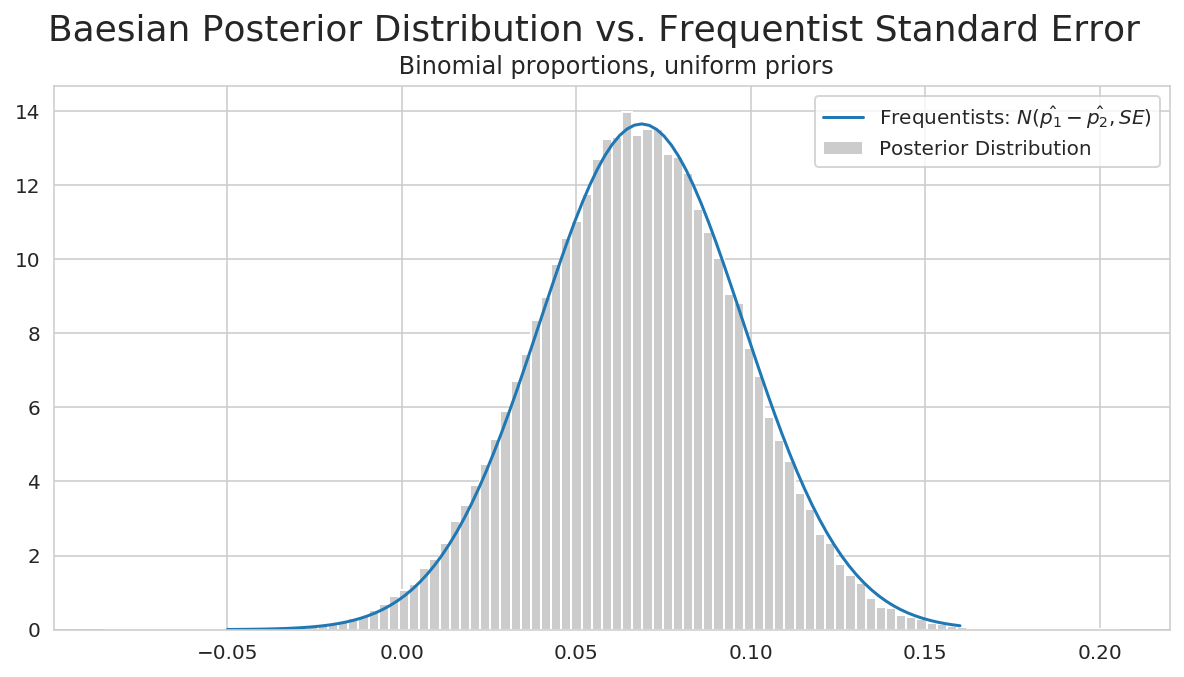

In [ ]:
import scipy

mean =  convert_A/n_A - convert_B/n_B

fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(-0.05,0.16,100)
plt.plot(x,scipy.stats.norm.pdf(x,mean,std_err), label='Frequentists: $ N(\hat{p_1}-\hat{p_2}, SE)$')
plt.hist(trace['AvB'], bins=100, normed=True, color='0.8', label='Posterior Distribution');
plt.legend()
plt.suptitle ('Baesian Posterior Distribution vs. Frequentist Standard Error', fontsize=18)
plt.title(' Binomial proportions, uniform priors' )
pass
# fig.savefig('03.03 Bayesian CrI vs CI.png', dpi=200)
# no prior information, expect similarities

In [ ]:
# What is the probability that we gained less than +5% uplift in conversions?
(trace['AvB']<0.05).sum()/len(trace)


0.5515

Build a model through day 11 for an A/B/C test



Subset the data up through day 11. You will notice now that there are 3 different arms: A, B, and C.

You will need to add in the third arm into the model.

Additionally, calculate 3 “deterministic” variables that look at differences between the three arms:

    A vs. B
    A vs. C
    B vs. C

What action would you take given these results?

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -502.53, ||grad|| = 148.32: 100%|██████████| 10/10 [00:00<00:00, 839.77it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [C_prob, B_prob, A_prob]
100%|██████████| 50500/50500 [00:36<00:00, 1386.24it/s]
/usr/local/lib/python3.6/dist-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f863e5dc240>,
      dtype=object)

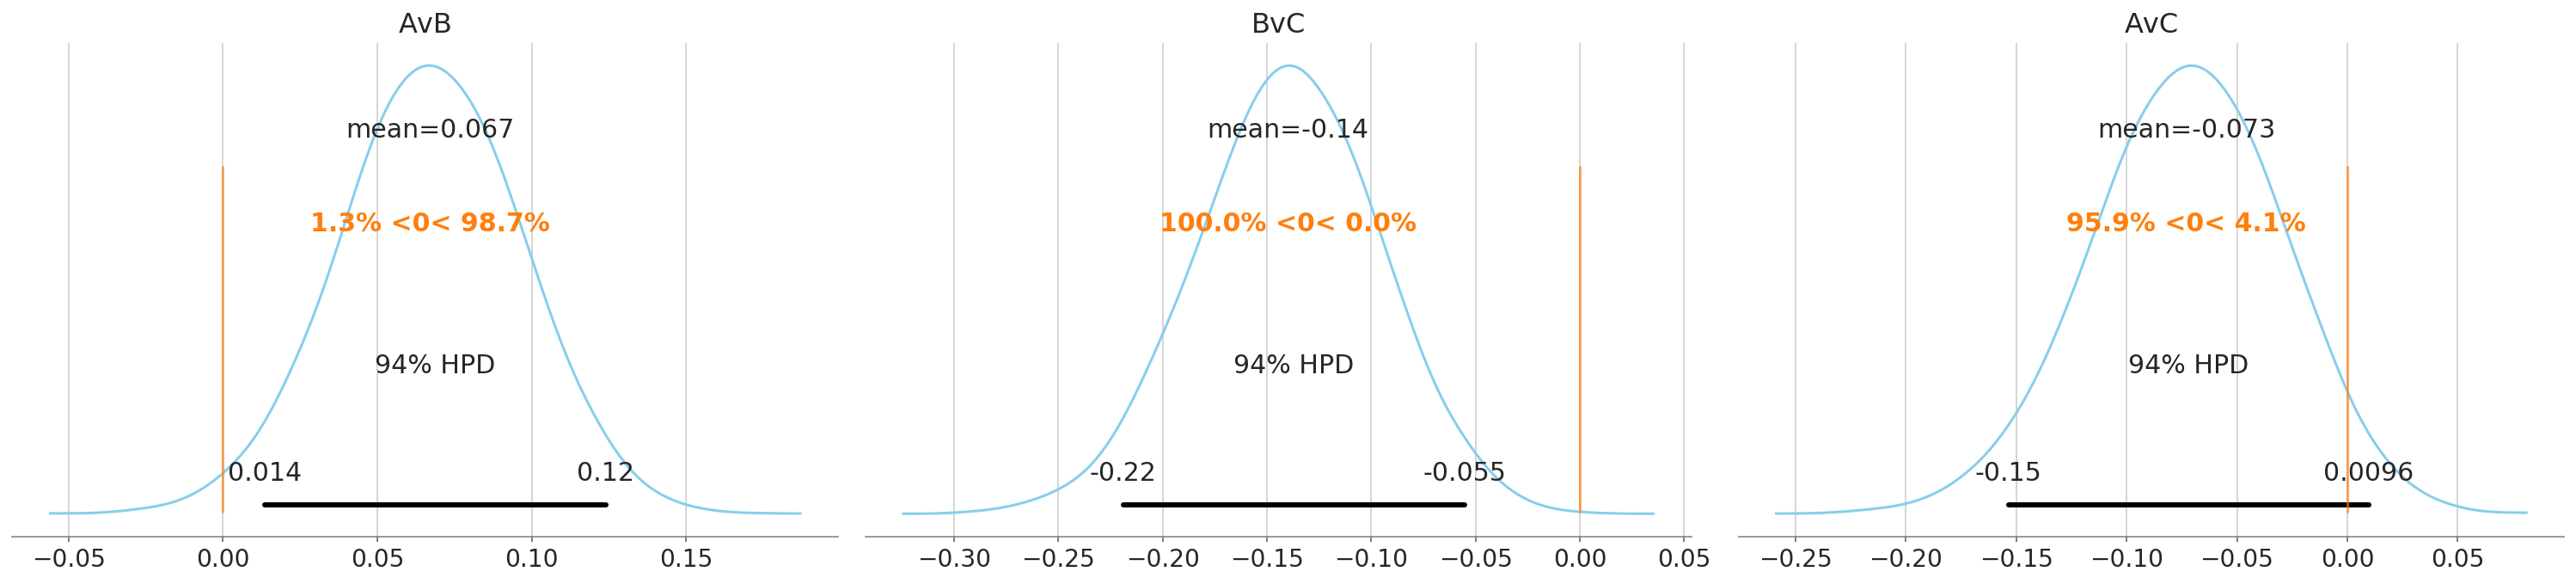

In [ ]:
current = data[data["arm"].isin(["B","A","C"])].reset_index(drop=True)

with pm.Model() as day11_model:
    
    A_p = pm.Uniform('A_prob', lower=0, upper=1)
    B_p = pm.Uniform('B_prob', lower=0, upper=1)
    C_p = pm.Uniform('C_prob', lower=0, upper=1)
    
    A = pm.Bernoulli('A', p=A_p, observed=current[current.arm == 'A'].converted.values)
    B = pm.Bernoulli('B', p=B_p, observed=current[current.arm == 'B'].converted.values)
    C = pm.Bernoulli('C', p=C_p, observed=current[current.arm == 'C'].converted.values)
    
    AvB = pm.Deterministic('AvB', A_p - B_p)
    AvC = pm.Deterministic('AvC', A_p - C_p)
    BvC = pm.Deterministic('BvC', B_p - C_p)
    
    trace = pm.sample(50000)
    #trace = pm.sample(50000, step=pm.Metropolis(), start=pm.find_MAP())
    
pm.plot_posterior(trace[5000::3], varnames=['AvB','BvC','AvC'], color='#87ceeb', ref_val=0.)


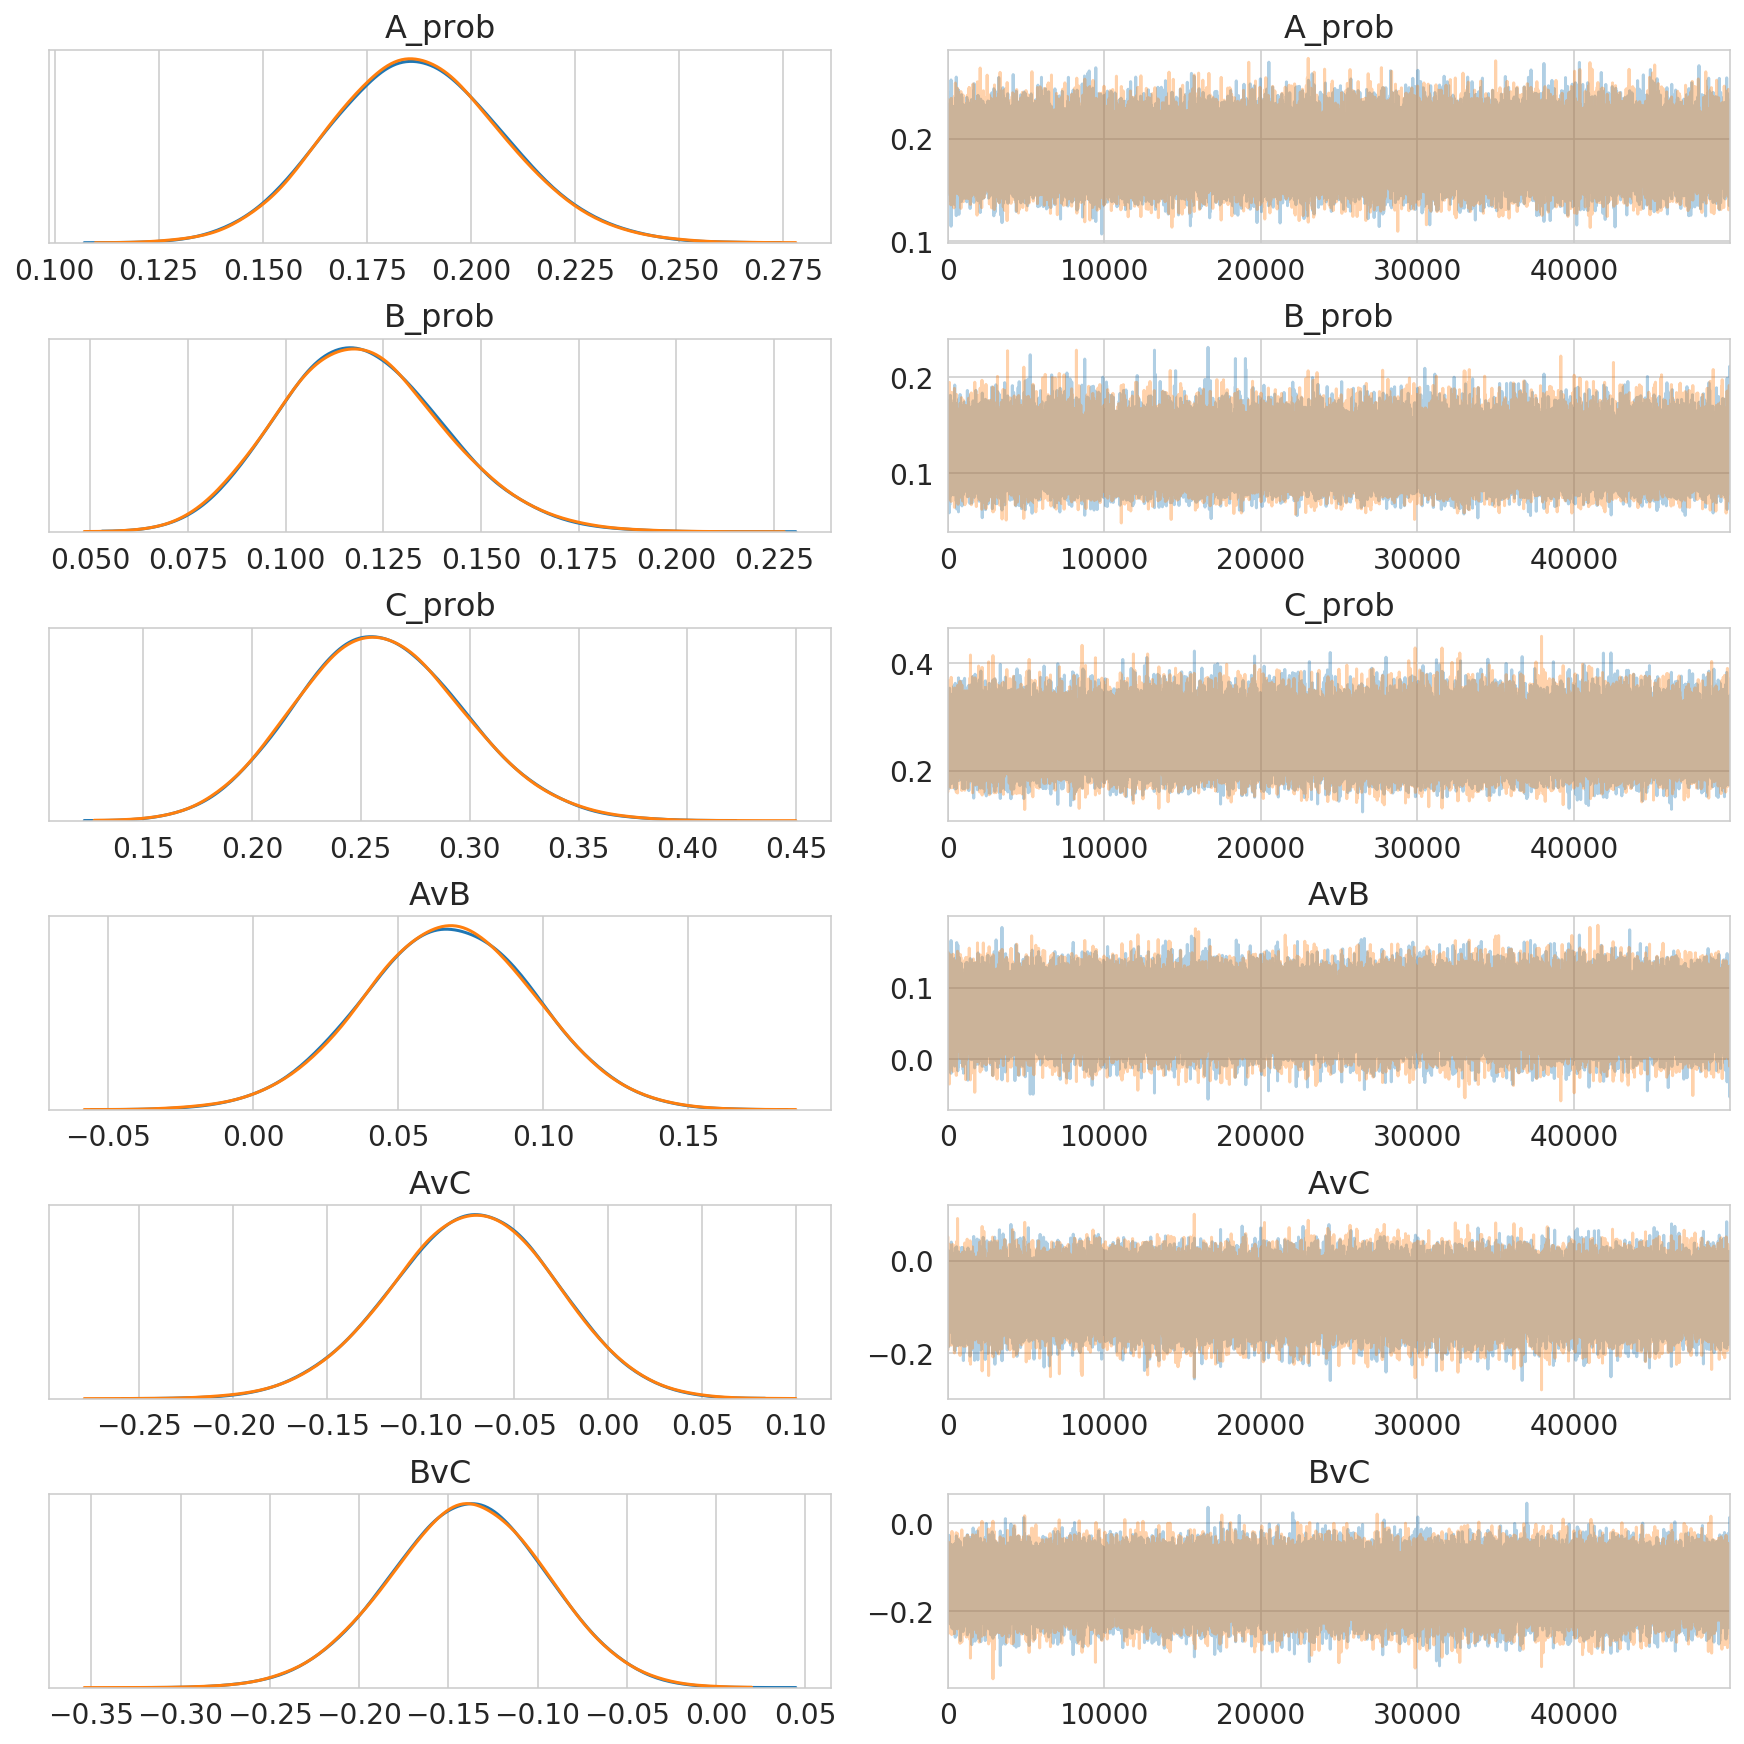

In [ ]:
_ = pm.traceplot(trace) ## and you can change the type plot
# https://github.com/thibalbo/bayesian-abtests-examples/blob/master/rate.ipynb

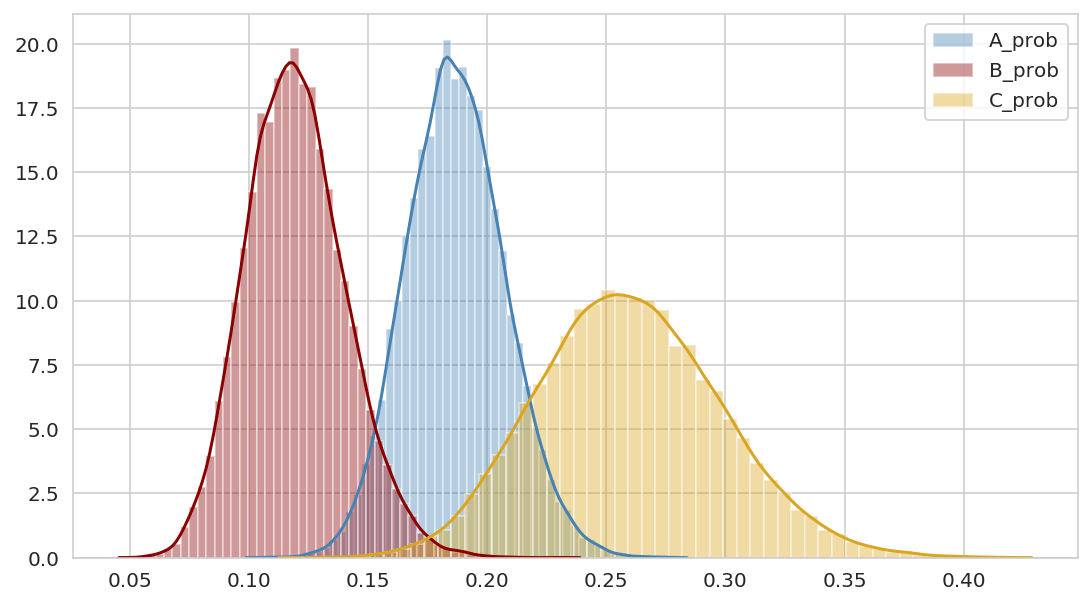

In [ ]:
def plot_betas(beta_traces, beta_names, colors=['steelblue','darkred','goldenrod']):
    fig, ax = plt.subplots(figsize=(9,5))
    for i, bn in enumerate(beta_names):
        ax = sns.distplot(beta_traces[i], kde=True, color=colors[i], label=bn)
    ax.legend(loc='upper right')
    plt.show()

plot_betas([trace[5000::3]['A_prob'], 
            trace[5000::3]['B_prob'],
            trace[5000::3]['C_prob']],
           ['A_prob','B_prob','C_prob'])

# We can be fairly certain that arm A has a higher conversion rate than arm B.
# There is not enough data to make a statement about arm C.

#### Another Approach

Sample from beta distributions to evaluate the split test

Our arms are represented as Bernoulli distributed random variables (binary outcome conversion vs. failure). Our prior distributions model the probability of different rates for the arms.

    Note: a uniform distribution between 0 and 1 is equivalent to a Beta(1,1), or in other words a Beta distribution with 0 successes and 0 failures.

We know that the Beta distribution is a conjugate prior to the binomial likelihood, and therefore the posterior distributions for our arms are also beta distributions.

Create beta distributions representing the conversions vs. failures for each arm for all days.

The beta distributions will be parameterized with alpha and beta, which are equivalent to successes + 1 and failures + 1 respectively.



In [ ]:
data.groupby('arm')['converted'].agg([sum, len])


,sum,len
arm,,
A,66,356
B,28,240
C,33,129


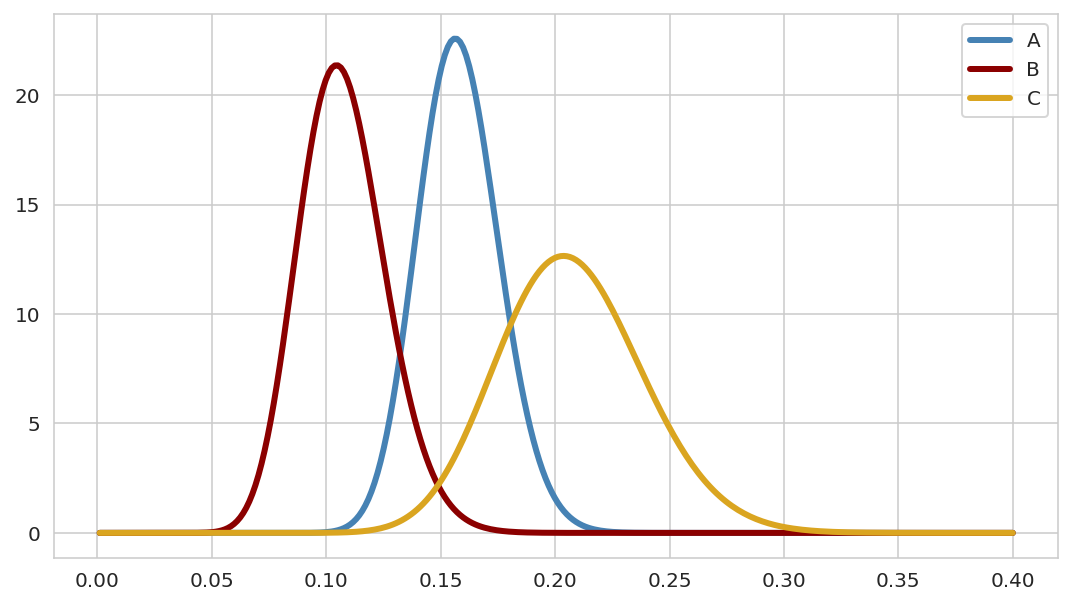

In [ ]:
a_beta = stats.beta(67, 357)
b_beta = stats.beta(29, 241)
c_beta = stats.beta(34, 130)

#Plot the beta distributions across the 0-0.4 range of rates.

fig, ax = plt.subplots(figsize=(9,5))
rates = np.linspace(0.001, 0.40, 300)
ax.plot(rates, a_beta.pdf(rates), color='steelblue', lw=3, label='A')
ax.plot(rates, b_beta.pdf(rates), color='darkred', lw=3, label='B')
ax.plot(rates, c_beta.pdf(rates), color='goldenrod', lw=3, label='C')
ax.legend(loc='upper right')
plt.show()


Calculate AvB, AvC, and BvC using sampling from the beta distribution

The beta distributions for the arm are our posterior distributions for the conversion rate of each arm given the observed data.

We can calculate the distributions of differences in rates between the arms using sampling. The procedure is:

    * Set up a certain number of iterations (1000, for example)
    * For each iteration, take a random draw from each beta distribution
    * Calculate the difference between the sampled rates between the arms
    * Store the differences in lists

Then you can plot these distributions of differences.

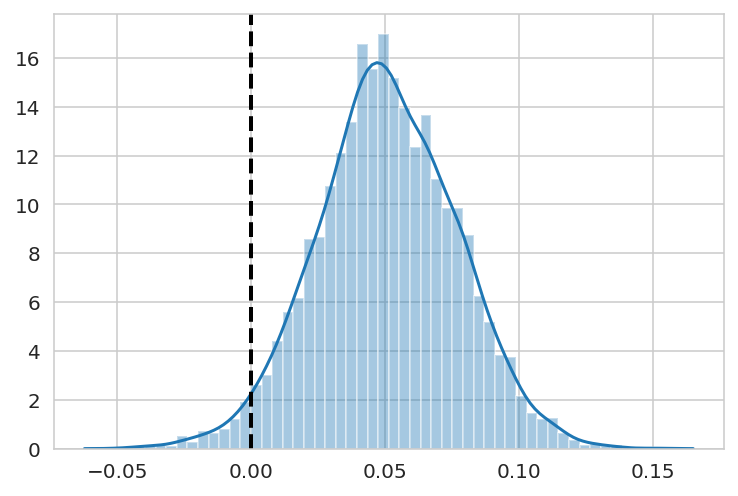

In [ ]:
a_samples = a_beta.rvs(5000)
b_samples = b_beta.rvs(5000)
c_samples = c_beta.rvs(5000)

AvB = a_samples-b_samples
AvC = a_samples-c_samples
BvC = b_samples-c_samples

ax = sns.distplot(AvB)
ax.axvline(0, lw=2, ls='dashed', c='black')


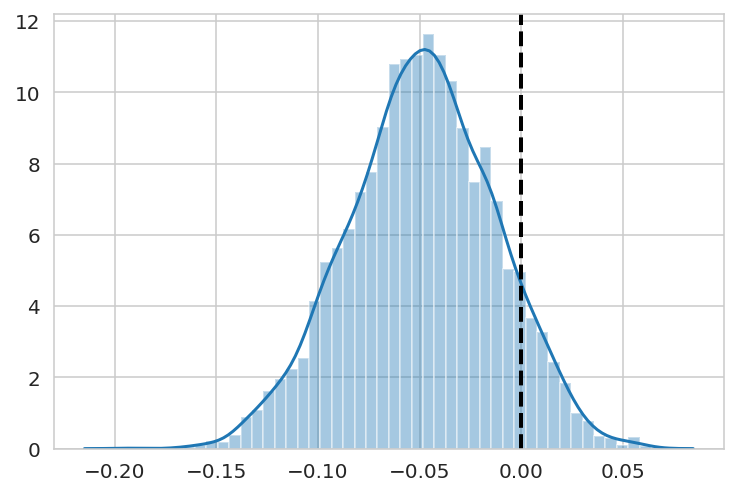

In [ ]:
ax = sns.distplot(AvC)
ax.axvline(0, lw=2, ls='dashed', c='black')


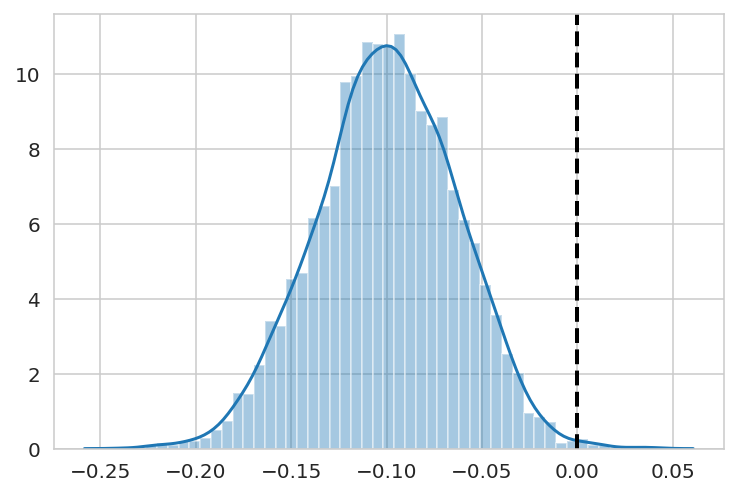

In [ ]:
ax = sns.distplot(BvC)
ax.axvline(0, lw=2, ls='dashed', c='black')


## Causal Discovery

#### Time Series Causal Discovery - TCDF

In [ ]:
## Here is a good dataset in which you can test different data
## I am happy with these, I can apply them tomorrow. 

https://github.com/sayakpaul/A-B-testing-with-Machine-Learning/blob/master/A%20B%20tests%20with%20Machine%20Learning.ipynb


In [ ]:
Causal relationship, traffic volume and weather.

https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

Causal relationship,  capital markets

In [ ]:
!git clone https://github.com/M-Nauta/TCDF.git

Cloning into 'TCDF'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 101 (delta 1), reused 2 (delta 0), pack-reused 95
Receiving objects: 100% (101/101), 4.70 MiB | 21.29 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/firmai/random-assets/master/Metro_Interstate_Traffic_Volume.csv")

In [ ]:
df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
df["date_time"] = pd.to_datetime(df["date_time"])
df = df.set_index("date_time")

In [ ]:
df = df[["traffic_volume", "temp","clouds_all","rain_1h","snow_1h"]]

In [ ]:
df.head()

,traffic_volume,temp,clouds_all,rain_1h,snow_1h
date_time,,,,,
2012-10-02 09:00:00,5545,288.28,40,0.0,0.0
2012-10-02 10:00:00,4516,289.36,75,0.0,0.0
2012-10-02 11:00:00,4767,289.58,90,0.0,0.0
2012-10-02 12:00:00,5026,290.13,90,0.0,0.0
2012-10-02 13:00:00,4918,291.14,75,0.0,0.0


In [ ]:
%cd TCDF

/content/TCDF


In [ ]:
df.to_csv("traffic.csv",index=False)

In [ ]:
%run -i "runTCDF.py" --help

usage: runTCDF.py [-h] [--cuda] [--epochs EPOCHS] [--kernel_size KERNEL_SIZE]
                  [--hidden_layers HIDDEN_LAYERS]
                  [--learning_rate LEARNING_RATE] [--optimizer {Adam,RMSprop}]
                  [--log_interval LOG_INTERVAL] [--seed SEED]
                  [--dilation_coefficient DILATION_COEFFICIENT]
                  [--significance SIGNIFICANCE] [--plot]
                  (--ground_truth GROUND_TRUTH | --data DATA [DATA ...])

TCDF: Temporal Causal Discovery Framework

optional arguments:
  -h, --help            show this help message and exit
  --cuda                Use CUDA (GPU) (default: False)
  --epochs EPOCHS       Number of epochs (default: 1000)
  --kernel_size KERNEL_SIZE
                        Size of kernel, i.e. window size. Maximum delay to be
                        found is kernel size - 1. Recommended to be equal to
                        dilation coeffient (default: 4)
  --hidden_layers HIDDEN_LAYERS
                        Number of

In [ ]:
"""Run TCDF"""
%matplotlib inline
%run -i "runTCDF.py" --data traffic.csv

Arguments: Namespace(cuda=False, data=['traffic.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=False, seed=1111, significance=0.8)

 Dataset:  traffic.csv

 Analysis started for target:  traffic_volume
Epoch:  1 [0%] 	Loss: 14659482.000000
Epoch: 500 [50%] 	Loss: 579337.250000
Epoch: 1000 [100%] 	Loss: 509108.156250
Potential causes:  [0]
Validated causes:  [0]

 Analysis started for target:  temp
Epoch:  1 [0%] 	Loss: 85529.460938
Epoch: 500 [50%] 	Loss: 21.284430
Epoch: 1000 [100%] 	Loss: 18.047306
Potential causes:  [1, 4, 3, 2]
Validated causes:  []

 Analysis started for target:  clouds_all
Epoch:  1 [0%] 	Loss: 5221.722168
Epoch: 500 [50%] 	Loss: 455.046783
Epoch: 1000 [100%] 	Loss: 454.659637
Potential causes:  [2]
Validated causes:  [2]

 Analysis started for target:  rain_1h
Epoch:  1 [0%] 	Loss: 2179.200439
Epoch: 500 [50%] 	Loss: 2005.967285
Epoch: 1000 [100%] 	Loss: 

In [ ]:
### Lets look at FRED
FRED  =pd.read_csv('https://github.com/firmai/random-assets/raw/master/capital_markets.txt')[1:] ### 130 additional series 
FRED  =FRED.set_index('sasdate')
FRED.index = pd.to_datetime(FRED.index)
FRED = FRED.ffill().bfill()

In [ ]:
FRED.to_csv("FRED.csv", index=False)

In [ ]:
FRED.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,HWI,HWIURATIO,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,...,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,TWEXMMTH,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAUCSL,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2437.296,2288.8,17.302,292258.8329,18235.77392,22.6250,23.4581,22.1904,32.4078,21.9882,37.7280,7.9955,21.2146,12.6047,30.5372,21.1492,20.2590,38.3482,80.1973,1357.0,0.333579,67936,63868,6.0,16.3,1574,1169,1396,594,802,291078,52478,18796,713.0,2993,14998,8740,6258,33682,10774,...,0.61,0.88,1.53,1.54,1.64,2.39,108.1883,4.3122,359.8417,2.8065,0.9671,33.1,33.4,30.6,31.6,3.00,32.5,29.01,44.8,29.3,21.1,33.3,38.1,22.9,28.9,30.7,29.6,16.074,56.918,17.791,11.358,2.13,2.45,2.04,95.3,274.9,6476.0,12298.0,84.2043,19.5715
1959-02-01,2446.902,2297.0,17.482,294429.5453,18369.56308,23.0681,23.7747,22.3827,32.6455,22.1036,38.0886,8.1025,21.8864,13.1853,31.0719,21.5379,20.2038,37.8258,81.4428,1421.0,0.358386,67649,63684,5.9,15.5,1554,1164,1277,545,732,282958,52688,18890,704.2,2980,15115,8839,6276,33798,10816,...,0.70,1.11,1.53,1.53,1.71,2.46,108.1883,4.3133,359.8417,2.8093,0.9748,33.2,33.4,30.7,31.4,3.00,32.5,29.00,44.7,29.4,21.2,33.3,38.1,23.0,28.9,30.7,29.6,16.089,56.951,17.798,11.375,2.14,2.46,2.05,95.3,276.0,6476.0,12298.0,83.5280,19.5715
1959-03-01,2462.689,2314.0,17.647,293425.3813,18523.05762,23.4004,23.9186,22.4925,32.6455,22.5365,37.9083,8.1900,22.4549,13.7048,31.5387,21.8749,20.3417,38.7835,82.4769,1524.0,0.400947,68068,64267,5.6,15.3,1459,1093,1210,530,680,260346,53014,19069,704.1,3013,15259,8965,6294,33945,10873,...,0.33,0.81,1.19,1.19,1.33,2.05,108.1883,4.3228,359.8417,2.8127,0.9698,33.2,33.3,30.7,31.5,2.97,32.9,28.97,44.7,29.6,21.3,33.2,38.3,23.0,28.9,30.7,29.6,16.100,57.022,17.785,11.395,2.15,2.45,2.07,95.3,277.4,6508.0,12349.0,81.6405,19.5715
1959-04-01,2478.744,2330.3,17.584,299331.6505,18534.46600,23.8989,24.2641,22.8221,33.1606,22.6807,38.5393,8.4040,23.0751,14.1173,32.5154,22.3414,20.4243,38.6093,83.9922,1589.0,0.444973,68339,64768,5.2,14.9,1494,934,1039,408,631,246413,53321,19269,705.2,3085,15385,9077,6308,34052,10905,...,0.31,0.76,1.16,1.16,1.27,1.90,108.1883,4.3226,359.8417,2.8165,0.9636,33.2,33.4,30.7,31.7,2.97,32.7,28.98,44.8,29.7,21.3,33.2,38.3,23.1,29.0,30.7,29.6,16.132,57.080,17.796,11.436,2.16,2.47,2.08,95.3,278.1,6620.0,12484.0,81.8099,19.5715
1959-05-01,2493.228,2345.8,17.796,301372.9597,18679.66354,24.2589,24.4655,23.0418,33.3190,23.1424,38.5393,8.6764,23.6694,14.6062,32.8075,22.6524,20.7275,37.8694,84.9159,1655.0,0.475711,68178,64699,5.1,14.7,1479,1005,965,390,575,246952,53550,19378,710.0,3087,15487,9160,6327,34172,10949,...,0.43,1.06,1.45,1.41,1.47,2.06,108.1883,4.3228,359.8417,2.8145,0.9630,33.3,33.3,30.9,31.5,2.97,32.9,29.04,44.9,29.7,21.4,33.3,38.4,23.2,29.1,30.7,29.6,16.140,57.175,17.777,11.454,2.17,2.48,2.08,95.3,280.1,6753.0,12646.0,80.7315,19.5715


In [ ]:
"""Run TCDF"""
%matplotlib inline
%run -i "runTCDF.py" --data FRED.csv

Arguments: Namespace(cuda=False, data=['df_capital.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=False, seed=1111, significance=0.8)

 Dataset:  df_capital.csv

 Analysis started for target:  RPI
Epoch:  1 [0%] 	Loss: 85752896.000000
Epoch: 500 [50%] 	Loss: 52249.558594
Epoch: 1000 [100%] 	Loss: 36934.804688
Potential causes:  [43, 3, 35, 4]
Validated causes:  []

 Analysis started for target:  W875RX1
Epoch:  1 [0%] 	Loss: 62293040.000000
Epoch: 500 [50%] 	Loss: 31606.019531
Epoch: 1000 [100%] 	Loss: 21431.658203
Potential causes:  [43, 35]
Validated causes:  []

 Analysis started for target:  DPCERA3M086SBEA
Epoch:  1 [0%] 	Loss: 18572.773438
Epoch: 500 [50%] 	Loss: 1.781070
Epoch: 1000 [100%] 	Loss: 0.482416
Potential causes:  [70, 26]
Validated causes:  []

 Analysis started for target:  CMRMTSPLx
Epoch:  1 [0%] 	Loss: 793100877824.000000
Epoch: 500 [50%] 	Loss: 1343997056.

* AMDMNOx - Real Manufacturers' New Orders: Durable Goods
* ANDENOx - Real Value of Manufacturers' New Orders for Capital Goods:
* TOTRESNS - Total Reserves of Depository Institutions
* AMBSLREALx - Adjusted Monetary Base




In [ ]:
### Now lets have a look at capital markets
### ... only going to look at the last 500 records, features of which have 70% filled records

In [ ]:
capital  =pd.read_csv('https://github.com/firmai/random-assets/raw/master/CMD.csv').iloc[-1000:,1:] ### 130 additional series 

### Lets look at FRED
capital  =capital.set_index('Date')
capital.index = pd.to_datetime(capital.index)
capital = capital.loc[:, capital.isnull().mean() < .3]
capital = capital.ffill().bfill()


In [ ]:
capital.head()

,Date,corpbond_iss,mbs_iss,muni_iss,muni_newcapital_iss,muni_refunding_iss,corpstock_iss,pdtranagencyandmbs,ustotal_iss_sa,usbondandnotes_iss,nfc_seo,nfc_ipo,usbill_iss,usnote_iss,usbond_iss,ust_total_iss,uscorpbonds_out,usbills_out,usbillsandcertif_out,usnotes_out,usbonds_out,usnotesandbonds_out,usttotala_out,usgross_out,usgf_to_gdp,usttotala_to_gdp,usnotesandbonds_to_gdp,st_liabs_to_for,total_net_frn,total_net_bond,total_net_stock,dom_ltsecs_pur,dom_ltsecs_sales,corp_agency_bond_pur,corp_agency_bond_sales,dom_ltsecs_net,frn_ltsecs_net,tbill_for_total,tbill_foi_total,tbill_priv_total,...,repo_tsynom_on,revrepo_tsynom_on,repo_tsynom_term,revrepo_tsynom_term,repoandreversetotal,net_repo_on,net_repo_term,net_repo,fedl15d,fedl15to90d,fedl90to1y,fedl1to5y,fedl5to10y,fedgreater10y,fed_net_tsy_dur,fedhold_bills,fedhold_notes,fedhold_bonds,fedhold_certifandbills,fedhold_notesandbonds,ngdpm,wpi,avgmatprivheld,taungdppercapita,taucorecpi,infexpst,infexplt,oilexportertsyhold,ismprices,ismnoinv,ismempl,ism,coreinffactor,gz_spread,ebp,onset_sad,aaasurvrp,epu,fedhold_total,copper
434,1936-03-01,488.0,NaN,131.0,60.0,71.0,23.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26412.3,1.953,1.953,11.924,15.541,27.465,29.418,30.792326,0.357104,0.341166,0.318517,1177.2,24.530,NaN,NaN,201.840,177.910,NaN,NaN,23.930,0.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,610.0,1555.0,266.0,610.0,1821.0,86.227869,13.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.417632,NaN,1.021237,2430.0,NaN
435,1936-04-01,644.0,NaN,102.0,49.0,53.0,64.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26687.6,1.953,1.953,11.910,15.541,27.451,29.404,30.776462,0.354103,0.338312,0.315841,1231.2,34.732,NaN,NaN,215.938,163.406,NaN,NaN,52.532,-17.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,610.0,1555.0,266.0,610.0,1821.0,86.913934,13.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.207399,NaN,1.001635,2430.0,NaN
436,1936-05-01,223.0,NaN,99.0,68.0,31.0,40.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26947.9,2.153,2.153,11.910,15.541,27.451,29.604,31.003613,0.354012,0.338031,0.313447,1299.8,24.805,NaN,NaN,119.410,121.305,NaN,NaN,-1.895,26.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,619.0,1546.0,266.0,619.0,1812.0,87.577869,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047618,NaN,1.880942,2430.0,NaN
437,1936-06-01,545.0,NaN,109.0,64.0,45.0,78.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26753.4,2.354,2.354,11.381,17.168,28.549,30.903,32.976312,0.373610,0.350120,0.323450,1426.2,80.502,NaN,NaN,150.443,109.741,NaN,NaN,40.702,39.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620.0,1494.0,316.0,620.0,1810.0,88.263934,13.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003456,NaN,1.895939,2430.0,NaN
438,1936-07-01,268.0,NaN,42.0,33.0,9.0,33.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26912.7,2.353,2.353,11.381,17.168,28.549,30.902,32.882444,0.369765,0.347495,0.321035,1358.3,131.658,NaN,NaN,211.544,134.886,NaN,NaN,76.658,55.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609.0,1497.0,325.0,609.0,1822.0,88.927869,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028172,NaN,0.248790,2430.0,NaN


In [ ]:
capital.shape

(1000, 129)

In [ ]:
capital.to_csv("capital_markets.csv", index=False)

In [ ]:
"""Run TCDF"""
%matplotlib inline
%run -i "runTCDF.py" --data capital_markets.csv

Arguments: Namespace(cuda=False, data=['capital_markets.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=False, seed=1111, significance=0.8)

 Dataset:  capital_markets.csv

 Analysis started for target:  corpbond_iss
Epoch:  1 [0%] 	Loss: 4681369600.000000
Epoch: 500 [50%] 	Loss: 201031280.000000
Epoch: 1000 [100%] 	Loss: 102773024.000000
Potential causes:  [30, 23, 25, 33, 0, 26]
Validated causes:  [30, 0]

 Analysis started for target:  muni_iss
Epoch:  1 [0%] 	Loss: 283737984.000000
Epoch: 500 [50%] 	Loss: 351164.500000
Epoch: 1000 [100%] 	Loss: 280665.593750
Potential causes:  [2, 3]
Validated causes:  [2, 3]

 Analysis started for target:  muni_newcapital_iss
Epoch:  1 [0%] 	Loss: 101863512.000000
Epoch: 500 [50%] 	Loss: 2275843.250000
Epoch: 1000 [100%] 	Loss: 145202.546875
Potential causes:  [1, 2, 3]
Validated causes:  [1, 3]

 Analysis started for target:  muni_refunding

#### Time Series Causal Discovery - Trig


In [ ]:
!git clone https://github.com/jakobrunge/tigramite.git
%cd tigramite
!python setup.py install

Cloning into 'tigramite'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 2883 (delta 104), reused 133 (delta 61), pack-reused 2693
Receiving objects: 100% (2883/2883), 10.53 MiB | 15.04 MiB/s, done.
Resolving deltas: 100% (1844/1844), done.
/content/tigramite
Compiling tigramite/tigramite_cython_code.pyx because it changed.
[1/1] Cythonizing tigramite/tigramite_cython_code.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/tigramite/tigramite/tigramite_cython_code.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running install
running bdist_egg
running egg_info
creating tigramite.egg-info
writing tigramite.egg-info/PKG-INFO
writing dependency_links to tigramite.egg-info/dependency_links.txt
writing requirements to tigram

TIGRAMITE is a time series analysis python module. It allows to reconstruct graphical models (conditional independence graphs) from discrete or continuously-valued time series based on the PCMCI method and create high-quality plots of the results. PMCI is used to Detecting and quantifying causal associations in large nonlinear time series datasets. This tutorial explains how to use PCMCI to obtain optimal predictors.

In [ ]:
import numpy
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr
import tigramite.data_processing as pp
numpy.random.seed(42)

data = df.values

# Data must be array of shape (time, variables)
print(data.shape)

dataframe = pp.DataFrame(data)
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)
results = pcmci.run_pcmci(tau_max=5, pc_alpha=None)
pcmci.print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05)

(48204, 5)

## Significant links at alpha = 0.05:

    Variable 0 has 7 link(s):
        (0 -1): pval = 0.00000 | val = 0.796
        (0 -2): pval = 0.00000 | val = -0.249
        (1 0): pval = 0.00000 | val = 0.062
        (1 -1): pval = 0.00000 | val = 0.051
        (0 -3): pval = 0.00000 | val = -0.034
        (2 -1): pval = 0.00030 | val = 0.016
        (2 0): pval = 0.03805 | val = 0.009

    Variable 1 has 5 link(s):
        (1 -1): pval = 0.00000 | val = 0.724
        (0 0): pval = 0.00000 | val = 0.062
        (0 -1): pval = 0.00000 | val = 0.048
        (2 0): pval = 0.00017 | val = 0.017
        (1 -2): pval = 0.00176 | val = -0.014

    Variable 2 has 6 link(s):
        (2 -1): pval = 0.00000 | val = 0.538
        (2 -2): pval = 0.00000 | val = 0.111
        (2 -3): pval = 0.00000 | val = 0.045
        (0 -1): pval = 0.00000 | val = 0.024
        (1 0): pval = 0.00017 | val = 0.017
        (0 0): pval = 0.03805 | val = 0.009

    Variable 3 has 0 link(s):

    Variable 4 has

What causes traffic
* Traffic and hour ago more now
* Traffic two hours ago less now
* Clouds one hour ago more traffic now
* Rain one hour ago more traffic now

What causes temperature
* Traffic one hour ago higher temperature now

What causes rain
* Traffic one hour ago more rain now
* Temperature two hours ago more rain now




In [ ]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from tigramite.models import LinearMediation, Prediction

### Ignoring this for now
np.random.seed(42)
T = 150
links_coeffs = {0: [((0, -1), 0.6)],
                1: [((1, -1), 0.6), ((0, -1), 0.8)],
                2: [((2, -1), 0.5), ((1, -1), 0.7)],  # ((0, -1), c)],
                }
N = len(links_coeffs)
data, true_parents = pp.var_process(links_coeffs, T=T)


dataframe = pp.DataFrame(df.values, var_names = df.columns)
N = df.shape[1]

pred = Prediction(dataframe=dataframe,
        cond_ind_test=ParCorr(),   #CMIknn ParCorr
        prediction_model = sklearn.linear_model.LinearRegression(),
#         prediction_model = sklearn.gaussian_process.GaussianProcessRegressor(),
        # prediction_model = sklearn.neighbors.KNeighborsRegressor(),
    data_transform=sklearn.preprocessing.StandardScaler(),
    train_indices= range(int(0.8*len(df))),
    test_indices= range(int(0.8*len(df)), len(df)),
    verbosity=1
    )




##
## Running Tigramite PC algorithm
##

Parameters:
selected_variables = [0]
independence test = par_corr
tau_min = 2
tau_max = 10
pc_alpha = None
max_conds_dim = None
max_combinations = 1



## Variable 0

## Resulting condition sets:

    Variable 0 has 20 parent(s):
    [pc_alpha = 0.5]
        (0 -2): max_pval = 0.00000, min_val = 0.611
        (0 -3): max_pval = 0.00000, min_val = 0.197
        (0 -10): max_pval = 0.00000, min_val = 0.124
        (0 -7): max_pval = 0.00000, min_val = 0.032
        (0 -9): max_pval = 0.00000, min_val = 0.029
        (1 -9): max_pval = 0.01441, min_val = 0.012
        (0 -5): max_pval = 0.03245, min_val = 0.011
        (1 -6): max_pval = 0.04817, min_val = 0.010
        (1 -5): max_pval = 0.08431, min_val = 0.009
        (2 -10): max_pval = 0.13232, min_val = 0.008
        (1 -7): max_pval = 0.13450, min_val = 0.008
        (1 -3): max_pval = 0.14321, min_val = 0.007
        (2 -3): max_pval = 0.14919, min_val = 0.007
        (2 -6): max_pval = 0.

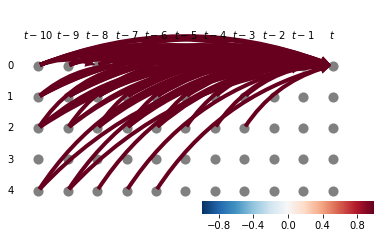

In [ ]:
target = 0 # I want to test what causes more traffic
tau_max = 10
steps_ahead_count = 2 
predictors = pred.get_predictors(
                  selected_targets=[target],
                  steps_ahead=steps_ahead_count,
                  tau_max=tau_max,
                  pc_alpha=None
                  )
link_matrix = np.zeros((N, N, tau_max+1), dtype='bool')
for j in [target]:
    for p in predictors[j]:
        link_matrix[p[0], j, abs(p[1])] = 1

# Plot time series graph
tp.plot_time_series_graph(
    figsize=(6, 3),
    val_matrix=np.ones(link_matrix.shape),
    link_matrix=link_matrix,
    var_names=None,
    link_colorbar_label='',
    )

In [ ]:
pred.fit(target_predictors=predictors, 
                selected_targets=[target],
                    tau_max=tau_max)


##
## Predicting target 0
##


Text(0, 0.5, 'Predicted test data')

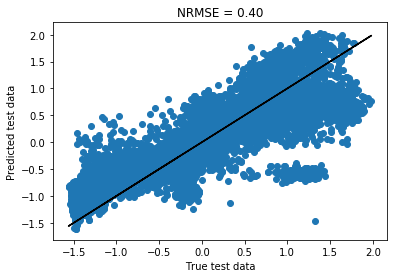

In [ ]:
predicted = pred.predict(target)
true_data = pred.get_test_array()[0]

plt.scatter(true_data, predicted)
plt.title(r"NRMSE = %.2f" % (np.abs(true_data - predicted).mean()/true_data.std()))
plt.plot(true_data, true_data, 'k-')
plt.xlabel('True test data')
plt.ylabel('Predicted test data')

It still underfits, if I use all the predictors it still works better:


##
## Predicting target 0
##


Text(0, 0.5, 'Predicted test data')

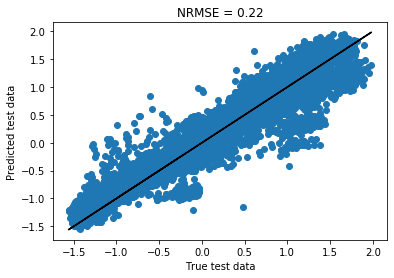

In [ ]:
all_predictors = {target:[(i, -tau) for i in range(N) for tau in range(1, tau_max+1)]}
pred.fit(target_predictors=all_predictors, 
                selected_targets=[target],
                    tau_max=tau_max)

# new_data = pp.DataFrame(pp.var_process(links_coeffs, T=100)[0])
predicted = pred.predict(target)
# predicted = pred.predict(target)
true_data = pred.get_test_array()[0]

plt.scatter(true_data, predicted)
plt.plot(true_data, true_data, 'k-')
plt.title(r"NRMSE = %.2f" % (np.abs(true_data - predicted).mean()/true_data.std()))
plt.xlabel('True test data')
plt.ylabel('Predicted test data')



(<Figure size 432x288 with 5 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b9ba307b8>,
       dtype=object))

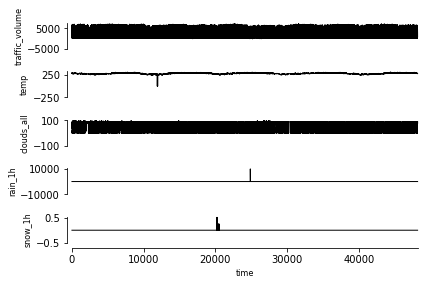

In [ ]:
tp.plot_timeseries(dataframe)

In [ ]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


## Estimating lagged dependencies


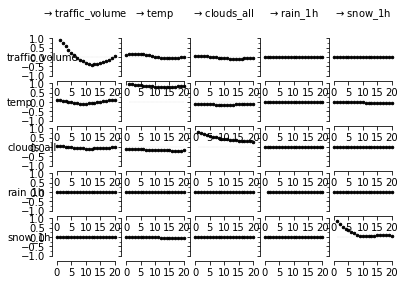

In [ ]:
correlations = pcmci.get_lagged_dependencies(tau_max=20)
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':df.columns, 
                                    'x_base':5, 'y_base':.5})

In [ ]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=10, pc_alpha=None)


##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 10
pc_alpha = None
max_conds_dim = None
max_combinations = 1



## Variable traffic_volume

## Variable temp

## Variable clouds_all

## Variable rain_1h

## Variable snow_1h

## Resulting condition sets:

    Variable traffic_volume has 16 parent(s):
    [pc_alpha = 0.5]
        (traffic_volume -1): max_pval = 0.00000, min_val = 0.799
        (traffic_volume -2): max_pval = 0.00000, min_val = 0.250
        (traffic_volume -10): max_pval = 0.00000, min_val = 0.118
        (traffic_volume -6): max_pval = 0.00000, min_val = 0.045
        (traffic_volume -9): max_pval = 0.00000, min_val = 0.041
        (traffic_volume -5): max_pval = 0.00000, min_val = 0.027
        (clouds_all -6): max_pval = 0.00008, min_val = 0.018
        (snow_1h -8): max_pval = 0.15344, min_val = 0.007
        (traffic_volume -7): max_pval = 0.16798, min_val = 0.006
        (temp -5): max_pval = 0.23241, min_val 

In [ ]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)

link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']


## Significant links at alpha = 0.01:

    Variable traffic_volume has 17 link(s):
        (traffic_volume -1): pval = 0.00000 | qval = 0.00000 | val = 0.789
        (traffic_volume -2): pval = 0.00000 | qval = 0.00000 | val = -0.237
        (temp 0): pval = 0.00000 | qval = 0.00000 | val = 0.050
        (traffic_volume -3): pval = 0.00000 | qval = 0.00000 | val = -0.039
        (traffic_volume -6): pval = 0.00000 | qval = 0.00000 | val = -0.035
        (traffic_volume -10): pval = 0.00000 | qval = 0.00000 | val = -0.032
        (temp -1): pval = 0.00000 | qval = 0.00000 | val = 0.030
        (traffic_volume -9): pval = 0.00000 | qval = 0.00000 | val = 0.028
        (temp -9): pval = 0.00000 | qval = 0.00000 | val = -0.028
        (traffic_volume -5): pval = 0.00000 | qval = 0.00000 | val = 0.025
        (traffic_volume -8): pval = 0.00000 | qval = 0.00000 | val = 0.025
        (temp -8): pval = 0.00000 | qval = 0.00000 | val = -0.024
        (temp -7): pval = 0.00013 | qval = 0.00080

(<Figure size 432x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b97fc2668>)

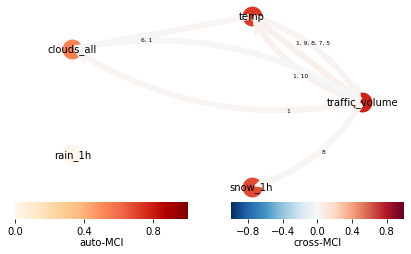

In [ ]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=df.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    )
## left is node colour, right is edge colout

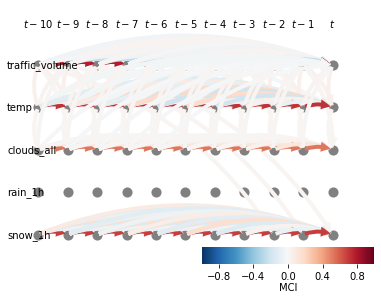

In [ ]:
# Plot time series graph
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=df.columns,
    link_colorbar_label='MCI',
    )


# A wider range of activities can be found here:
# https://github.com/jakobrunge/tigramite/blob/master/tutorials/tigramite_tutorial_basics.ipynb

#### Cross-sectional Causal Discovery

In [ ]:
!pip install cdt

     |████████████████████████████████| 921kB 9.4MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=71391d031da52c0459ea26aac96f8941b6b23884fd285e1977899d28cb82093c
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
  Created wheel for skrebate: filename=skrebate-0.6-cp36-none-any.whl size=29329 sha256=a30226de478af52c60241e33889041d7153e0d65118d0acab404d6b6684b9cca
  Stored in directory: /root/.cache/pip/wheels/f5/99/36/c827bcfa6852c6d068895b2723c57cea84f93642270c6dc05c
Successfully built GPUtil skrebate


In [ ]:
#Import libraries
import cdt
from cdt import SETTINGS
SETTINGS.verbose=False
SETTINGS.NJOBS=16
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



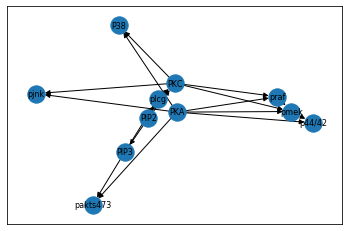

(7466, 11)


,praf,pmek,plcg,PIP2,PIP3,p44/42,pakts473,PKA,PKC,P38,pjnk
0,26.4,13.2,8.82,18.30,58.80,6.61,17.0,414.0,17.00,44.9,40.0
1,35.9,16.5,12.30,16.80,8.13,18.60,32.5,352.0,3.37,16.5,61.5
2,59.4,44.1,14.60,10.20,13.00,14.90,32.5,403.0,11.40,31.9,19.5
3,73.0,82.8,23.10,13.50,1.29,5.83,11.8,528.0,13.70,28.6,23.1
4,33.7,19.8,5.19,9.73,24.80,21.10,46.1,305.0,4.66,25.7,81.3


In [ ]:
# Load data and graph solution
data, solution = cdt.data.load_dataset('sachs')
nx.draw_networkx(solution, font_size=8) # The plot function allows for quick visualization of the graph. 
plt.show()
print(data.shape)
data.head()



In [ ]:
# Finding the structure of the graph
from cdt.independence.graph import FSGNN

# own data

df = pd.read_csv("https://raw.githubusercontent.com/firmai/random-assets/master/Metro_Interstate_Traffic_Volume.csv")
df["date_time"] = pd.to_datetime(df["date_time"])
df = df.set_index("date_time")
df = df[["traffic_volume", "temp","clouds_all","rain_1h","snow_1h"]]

data = df.head(2000)

Fsgnn = FSGNN(train_epochs=1000, test_epochs=500, l1=0.1, batch_size=1000)

start_time = time.time()

--- Execution time : 563. seconds ---


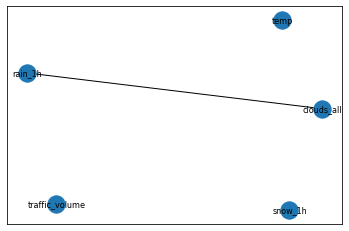

,Cause,Effect,Score
0,clouds_all,rain_1h,3.594876e-07


In [ ]:
ugraph = Fsgnn.predict(data, threshold=1e-7)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

## Causal Inference

One day a team lead notices that some members of their team wear cool hats, and that these members of the team tend to be less productive. Being data drive, the Team Lead starts to record whether or not a team member wears a cool hat ($X=1$ for a cool hat, $X=0$ for no cool hat) and whether or not they are productive ($Y=1$ for productive, $Y=0$ for unproductive).

After making observations for a week, they end up with a dataset like the following:

In [ ]:
!git clone https://github.com/ijmbarr/notes-on-causal-inference.git
# % to switch directory 
%cd notes-on-causal-inference

Cloning into 'notes-on-causal-inference'...
remote: Enumerating objects: 46, done.
remote: Total 46 (delta 0), reused 0 (delta 0), pack-reused 46
Unpacking objects: 100% (46/46), done.


In [ ]:
from __future__ import division
import datagenerators as dg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind")

%matplotlib inline

In [ ]:
observed_data_0 = dg.generate_dataset_0()
observed_data_0.head()

,x,y
0,1,0
1,1,0
2,1,1
3,1,1
4,1,1


The first question the team lead asks is: are people wearing cool hats more likely to be productive that those who don't? This means estimating the quantity

𝑃(𝑌=1|𝑋=1)−(𝑌=1|𝑋=0)

which we can do directly from the data:


In [ ]:
def estimate_uplift(ds):
    """
    Estimate the difference in means between two groups.
    This is closer related to the z and t tests 
    
    Parameters
    ----------
    ds: pandas.DataFrame
        a dataframe of samples.
        
    Returns
    -------
    estimated_uplift: dict[Str: float] containing two items:
        "estimated_effect" - the difference in mean values of $y$ for treated and untreated samples.
        "standard_error" - 90% confidence intervals arround "estimated_effect"
        
        
    """
    base = ds[ds.x == 0]
    variant = ds[ds.x == 1]
    
    delta = variant.y.mean() - base.y.mean()
    delta_err = 1.96 * np.sqrt(
        variant.y.var() / variant.shape[0] + 
        base.y.var() / base.shape[0])
    
    return {"estimated_effect": delta, "standard_error": delta_err}

estimate_uplift(observed_data_0)

{'estimated_effect': -0.10276997189883585,
 'standard_error': 0.08740397960545142}

It looks like people with cool hats are less productive.To be sure, we can run a statistical test:

A chi-square test tests a null hypothesis about the relationship between two variables. For example, you could test the hypothesis that men and women are equally likely to vote "Democratic," "Republican," "Other" or "not at all." A chi-square test requires categorical variables, usually only two, but each may have any number of levels, whereas A t-test requires two variables; one must be categorical and have exactly two levels, and the other must be quantitative and be estimable by a mean.


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = (
    observed_data_0
    .assign(placeholder=1)
    .pivot_table(index="x", columns="y", values="placeholder", aggfunc="sum")
    .values
)

_, p, _, _ = chi2_contingency(contingency_table, lambda_="log-likelihood")

# p-value
p

0.027229350677741307

The p-value is low enough to accept the null hyothesis. The problem is that it has not been randomly assigned as a controlled experiment, and instead uses observational data, we can create a fake experiment to assign a hat randomly and it could be possibly show the opposite effect.

In [ ]:
## Dont take this too seriously, created to show how random allocation showed opposite effect
## .. the idea being that confounders have now been removed.
## This is simply running the experiment, generating the data and
## identifying the results
def run_ab_test(datagenerator, n_samples=10000, filter_=None):
    """
    Generates n_samples from datagenerator with the value of X randomized
    so that 50% of the samples recieve treatment X=1 and 50% receive X=0,
    and feeds the results into `estimate_uplift` to get an unbiased 
    estimate of the average treatment effect.
    
    Returns
    -------
    effect: dict
    """
    n_samples_a = int(n_samples / 2)
    n_samples_b = n_samples - n_samples_a
    set_X = np.concatenate([np.ones(n_samples_a), np.zeros(n_samples_b)]).astype(np.int64)
    ds = datagenerator(n_samples=n_samples, set_X=set_X)
    if filter_ != None:
        ds = ds[filter_(ds)].copy()
    return estimate_uplift(ds)

run_ab_test(dg.generate_dataset_0)

{'estimated_effect': 0.19519999999999998,
 'standard_error': 0.019224808009126987}

So the opposite seems to be true. Note: In the above example, and in all following examples, I'm assuming that our samples are i.i.d., and obey the Stable unit treatment value assumption (SUTVA). Basically this means that when one person chooses, or is forced to wear a really cool hat they have no influence on the choice or effect of another person wearing a really cool hat.

In the previous example, when we make no intervention on the system, we have an observational distribution of $Y$, conditioned on the fact we observe $X$:

$P(Y|X)$

When we force people to wear cool hats, we are making an intervention. The distribution of $Y$ is then given by the _interventional_ distribution 

$P(Y|\hbox{do}(X))$

In general these two are not the same.

The question these notes will try and answer is how we can reason about the interventional distribution, when we only have access to observational data.

This is a useful question because there are lots of situations where running an A/B test to directly measure the effects of an intervention is impractical, unfeasable or unethical. In these situations we still want to be able to say something about what the effect of an intervention is - to do this we need to make some assumptions about the data generating process we are investigating.

### Potential Outcomes 

One way to approach this problem is to introduce two new random variables to our system: $Y_{0}$ and $Y_{1}$, known as the Potential Outcomes. We imagine that these variables exist, and can be treated as any other random variable - the only difference is that they are never directly observed. $Y$ is defined in terms of 

 - $Y = Y_{1}$ when $X=1$
 - $Y = Y_{0}$ when $X=0$
 
This shifts the problem from one about how distributions change under the intervention, to one about data drawn i.i.d. from some underlying distribution with missing values. Under certain assumptions about why values are missing, there is well developed theory about how to estimate the missing values.

### Goals

Often we do not care about the full interventional distribution, $P(Y|\hbox{do}(X))$, and it is enough to have an estimate of the difference in means between the two groups. This is a quantity known as the Average Treatment Effect:

$\Delta = E[Y_{1} - Y_{0}]$

When we run and A/B test and compare the means of each group, this is directly the quantity we are measuring 


Two related quantities are 

 - $ATT = E[Y_{1} - Y_{0}|X=1]$, the "Average Treatment effect of the Treated"
 - $ATC = E[Y_{1} - Y_{0}|X=0]$, the "Average Treatment effect of the Control"

One way to interpret ATC is as a measure of the effect of treating only samples which wouldn't naturally be treated, and vice versa for ATT. Depending on your use case, they may be more natural measures of what you care about. The following techniques will allow us to estimate them all.


$\def\ci{\perp\!\!\!\perp}$
### Making Assumptions

When we A/B test, we randomize the assignment of $X$. This has the effect of allowing us to choose which variable of $Y_{1}$ or $Y_{0}$ is revealed to us. This makes the outcome independent of the value of $X$. We write this as

$Y_{1}, Y_{0} \ci X$

Which means that the distribution of $X, Y_{0}, Y_{1}$ factorizes as

$P(X, Y_{0}, Y_{1}) = P(X)P(Y_{0}, Y_{1})$

If this independence holds then

$E[Y_{1}|X=1] = E[Y_{1}]$

If we want to estimate the ATE using observational data, we need to use other information we have about the samples - specifically we need to **assume** that we have enough additional information to completely explain the choice of treatment each subject.

If we call the additional information the random variable $Z$, we can write this assumption as

$Y_{1}, Y_{0} \ci X \, | \, Z$

or

$P(X, Y_{0}, Y_{1}| Z) = P(X|Z)P(Y_{0}, Y_{1}|Z)$

This means that the observed treatment a sample receives, $X$, is completely explained by $Z$. This is sometimes called the "ignorability" assumption.

In our motivating example about cool hats this would mean that there is some other factor - let's call it "skill" - which impacts both the productivity of the person and whether or not they wear a cool hat. In our example above, skilled people are more likely to be productive and also less likely to were cool hats. These facts together _could_ explain why the effect of cool hats seemed to reverse when ran an A/B test. 

If we split our data on whether or not the person is skilled, we find that for each subgroup there is a positive relationship between wearing cool hats and productivity:


Unfortuntly, because we never observe $Y_{0}$ and $Y_{1}$ for the same sample, we cannot test the assumption that 

$Y_{1}, Y_{0} \ci X \, | \, Z$

It is something we have to use our knownledge of the system we are investigating to evaluate.

The quality of any prediction you make depends on exactly how well this assumption holds. Simpson's Paradox is an extreme example of the fact that if $Z$ does not give contain all confounding variables, then any inference we make could be wrong. [Facebook have a good paper comparing different causal inference approaches with direct A/B test that show how effects can be overestimated when conditional independence doesn't hold](https://www.kellogg.northwestern.edu/faculty/gordon_b/files/kellogg_fb_whitepaper.pdf).

Once we have made this assumption there are a number of techniques for approaching this. I will outline a few of simpler approaches in the rest of the post, but keep in mind that this is a area of ongoing research. In human speak you can investigate the counterfactual with an additional variable, but you should trust this apprach less than interventionist studies.

### Modeling the Counterfactual

From the above, it should be clear that if know $Y_{0}$ and $Y_{1}$, we can estimate the ATE. So why not just try and model them directly? Specifically we can build estimators: 
 
 - $\hat{Y}_{0}(Z) = E[Y|Z, X=0]$
 - $\hat{Y}_{1}(Z) = E[Y|Z, X=1]$. 
 
If we can model these two quantities, we can estimate the ATE as:

$\Delta = \frac{1}{N}\sum_{i}(\hat{Y}_{1}(z_{i}) - \hat{Y}_{0}(z_{i}))$

The success of this approach depends on how well we can model the potential outcomes. To see it in action, let's use the following data generating process:

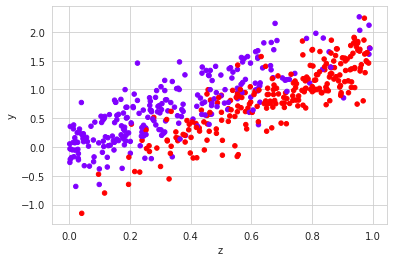

In [ ]:
observed_data_1 = dg.generate_dataset_1()

observed_data_1.plot.scatter(x="z", y="y", c="x", cmap="rainbow", colorbar=False);

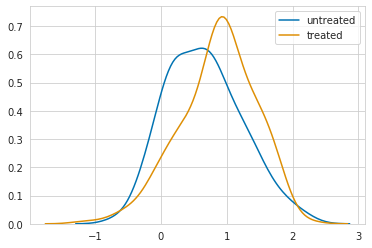

In [ ]:
sns.kdeplot(observed_data_1.loc[lambda df: df.x == 0].y, label="untreated")
sns.kdeplot(observed_data_1.loc[lambda df: df.x == 1].y, label="treated")

In [ ]:
# We can confirm this by looking at the difference in means between the two groups
print("Observed ATE: {estimated_effect:.3f} ({standard_error:.3f})".format(**estimate_uplift(observed_data_1)))

Observed ATE: 0.207 (0.101)


However, if we look at the distribution of the covariance, 𝑍, it is clear that there is a difference between the groups. 

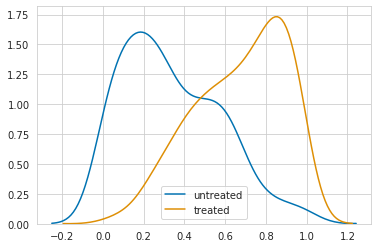

In [ ]:
sns.kdeplot(observed_data_1.loc[lambda df: df.x == 0].z, label="untreated")
sns.kdeplot(observed_data_1.loc[lambda df: df.x == 1].z, label="treated")

If we believe that $Z$ has some influence on the metric $Y$, this should concern us. We need some way to disentangle the effect of $X$ on $Y$ and the effect of $Z$ on $Y$.

We can check the actually ATE using our simulated A/B test and confirm that it is difference of the observed value:

In [ ]:
print("Real ATE:  {estimated_effect:.3f} ({standard_error:.3f})".format(**run_ab_test(dg.generate_dataset_1)))

Real ATE:  -0.497 (0.026)


In [ ]:
## Interesting - https://colab.research.google.com/drive/1juY2A4SVR1-nZzLX__zwOjHy_SvLBcaD#scrollTo=vR-1V8w5rN3m
## Expansion with similar framewokr - http://www.degeneratestate.org/posts/2018/Jul/10/causal-inference-with-python-part-2-causal-graphical-models/
## https://github.com/microsoft/EconML
## You can follow through with this if you do the naming convention


